## <b> 📅 Table of Contents</b> ##

1. Data Exploration/Cleaning
    - Basic Data Exploration & Data sanity check
    - Raw Data EDA
        - Univariate
        - Multivariate analysis
    - Basic Data Cleaning
        - Base model training
    - Data Cleaning (Overfitting, VIF-multicolinearity)
    - Feature Engineering + OHE
    - Clean EDA
        - Univariate
        - Multivariate analysis

2. Training Models
    - Models:
        - GBT, RT, Logistic Regression, Naive Bayes, KNeighbours classifier - (train 10 models use the top 3 models to do feature importance and selection)
    - Hyper Parameter Tuning (Compete against top 3-5 models)
        - Use Random Tree
    - Metrics
        - Confusion Matrix, Classification Report, AUC-ROC
    - Hyperparameter Tuning
    - Perform metric evaluation again

##### <b>Dictionary Code</b> ######

In [2]:
import pandas as pd

data = {
    "Feature": [
        "object_ID",
        "alpha",
        "delta",
        "UV_filter",
        "green_filter",
        "red_filter",
        "near_IR_filter",
        "IR_filter",
        "run_ID",
        "rereun_ID",
        "cam_col",
        "field_ID",
        "spec_obj_ID",
        "red_shift",
        "plate_ID",
        "MJD",
        "fiber_ID",
        "class"
    ],
    "Description": [
        "Object Identifier is the unique value that identifies the object in the image catalog used by SDSS.",
        "Right Ascension angle (at J2000 epoch).",
        "Declination angle (at J2000 epoch).",
        "Ultraviolet filter in the photometric system.",
        "Green filter in the photometric system.",
        "Red filter in the photometric system.",
        "Near Infrared filter in the photometric system.",
        "Infrared filter in the photometric system.",
        "Run Number used to identify the specific scan. Each run typically covers a specific area of the sky.",
        "Rerun Number to specify how the image was processed.",
        "Camera column to identify the scanline within the run.",
        "Field number to identify each field.",
        "Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class).",
        "Redshift value based on the increase in wavelength.",
        "Plate ID, identifies each plate in SDSS.",
        "Modified Julian Date, used to indicate when a given piece of SDSS data was taken.",
        "Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation.",
        "Object class (galaxy, star, or quasar object)."
    ]
}

##### <b>Data Dictionary</b> ######

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)  
dictionary = pd.DataFrame(data)
display(dictionary)

Feature                                                                                                                                         Description
0        object_ID                                                 Object Identifier is the unique value that identifies the object in the image catalog used by SDSS.
1            alpha                                                                                                             Right Ascension angle (at J2000 epoch).
2            delta                                                                                                                 Declination angle (at J2000 epoch).
3        UV_filter                                                                                                       Ultraviolet filter in the photometric system.
4     green_filter                                                                                                             Green filter in the photometric system.
5       red_filter                                                                                                               Red filter in the photometric system.
6   near_IR_filter                                                                                                     Near Infrared filter in the photometric system.
7        IR_filter                                                                                                          Infrared filter in the photometric system.
8           run_ID                                                Run Number used to identify the specific scan. Each run typically covers a specific area of the sky.
9        rereun_ID                                                                                                Rerun Number to specify how the image was processed.
10         cam_col                                                                                              Camera column to identify the scanline within the run.
11        field_ID                                                                                                                Field number to identify each field.
12     spec_obj_ID  Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class).
13       red_shift                                                                                                 Redshift value based on the increase in wavelength.
14        plate_ID                                                                                                            Plate ID, identifies each plate in SDSS.
15             MJD                                                                   Modified Julian Date, used to indicate when a given piece of SDSS data was taken.
16        fiber_ID                                                   Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation.
17           class                                                                                                      Object class (galaxy, star, or quasar object).

##### <b>Aim of Model</b> ######

- To use raw data collected from stellar observations to accurately and quickly predict the stellar class of an object.
- This model aims to lessen conventional rule based filtering used in traditional stellar classification and provide accurate, data grounded predictions.

## <b> ✧˖°.📖 Importing Libraries</b> ##

In [9]:
# Data exploration, cleaning and visualization libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <b> ˖ ᡣ𐭩 ⊹ ࣪  ౨ৎ˚₊ Obtaining Data</b> ##

Reading the dataset

In [14]:
DIR = r"star_classification_dataset.csv"

# Use pandas to read the dataset
df = pd.read_csv(DIR)
# Define another Cleaned df for basic data cleaning/baseline model training
cleaned_df = pd.read_csv(DIR)

Displaying the data.

In [292]:
display(df)

object_ID        alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class
0      1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371   3606       301        2        79  6.540000e+18   0.634794      5812  56354       171  GALAXY
1      1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427   4518       301        5       119  1.180000e+19   0.779136     10445  58158       427  GALAXY
2      1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827   3606       301        2       120  5.150000e+18   0.644195      4576  55592       299  GALAXY
3      1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010   4192       301        3       214  1.030000e+19   0.932346      9149  58039       775  GALAXY
4      1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747        15.97711   15.54461    NaN       301        3       137  6.890000e+18   0.116123      6121  56187       842  GALAXY
...             ...          ...        ...        ...           ...         ...             ...        ...    ...       ...      ...       ...           ...        ...       ...    ...       ...     ...
99995  1.240000e+18    39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569   7778       301        2       581  1.060000e+19   0.000000      9374  57749       438  GALAXY
99996  1.240000e+18    29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526   7917       301        1       289  8.590000e+18   0.404895      7626  56934       866  GALAXY
99997  1.240000e+18   224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221   5314       301        4       308  3.110000e+18   0.143366      2764  54535        74  GALAXY
99998  1.240000e+18   212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482   3650       301        4       131  7.600000e+18   0.455040      6751  56368       470  GALAXY
99999  1.240000e+18   196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075   3650       301        4        60  8.340000e+18   0.542944      7410  57104       851  GALAXY

[100000 rows x 18 columns]

## <b> ୨⎯ Exploratory Data Processing  ⎯୧ </b> ##

### <b>Basic Data Exploration</b> ###

- Understanding the distribution and spread of our data through graphs
- Identifing null values, invalid columns and impossible values

#### <b>Data Understanding</b> ####

In [7]:
df.shape

(100000, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

According to the previous data analysis, the "alpha" column can be converted to numeric column.

In [9]:
df.head()

object_ID        alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class
0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371   3606       301        2        79  6.540000e+18   0.634794      5812  56354       171  GALAXY
1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427   4518       301        5       119  1.180000e+19   0.779136     10445  58158       427  GALAXY
2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827   3606       301        2       120  5.150000e+18   0.644195      4576  55592       299  GALAXY
3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010   4192       301        3       214  1.030000e+19   0.932346      9149  58039       775  GALAXY
4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747        15.97711   15.54461    NaN       301        3       137  6.890000e+18   0.116123      6121  56187       842  GALAXY

In [10]:
df.describe()

object_ID         delta      UV_filter   green_filter     red_filter  near_IR_filter      IR_filter  rerun_ID        cam_col       field_ID   spec_obj_ID      red_shift       plate_ID            MJD       fiber_ID
count  1.000000e+05  99998.000000  100000.000000  100000.000000  100000.000000   100000.000000  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05  100000.000000  100000.000000  100000.000000  100000.000000
mean   1.240000e+18     24.134955      21.980468      20.531387      19.645762       19.084854      18.668810     301.0       3.511610     186.130520  5.783925e+18       0.576661    5137.009660   55588.647500     449.312740
std    3.020047e+06     19.644480      31.769291      31.750292       1.854760        1.757895      31.728152       0.0       1.586912     149.011073  3.324007e+18       0.730707    2952.303351    1808.484233     272.498404
min    1.240000e+18    -18.785328   -9999.000000   -9999.000000       9.822070        9.469903   -9999.000000     301.0       1.000000      11.000000  3.000000e+17      -0.009971     266.000000   51608.000000       1.000000
25%    1.240000e+18      5.146668      20.352353      18.965230      18.135828       17.732285      17.460677     301.0       2.000000      82.000000  2.840000e+18       0.054517    2526.000000   54234.000000     221.000000
50%    1.240000e+18     23.645922      22.179135      21.099835      20.125290       19.405145      19.004595     301.0       4.000000     146.000000  5.610000e+18       0.424173    4987.000000   55868.500000     433.000000
75%    1.240000e+18     39.901442      23.687440      22.123767      21.044785       20.396495      19.921120     301.0       5.000000     241.000000  8.330000e+18       0.704154    7400.250000   56777.000000     645.000000
max    1.240000e+18     83.000519      32.781390      31.602240      29.571860       32.141470      29.383740     301.0       6.000000     989.000000  1.410000e+19       7.011245   12547.000000   58932.000000    1000.000000

The original dataset is not standardised, standardisation methods(Min-Max Scaler/Standard Scaler) can be considered to process the data.

#### <b>Sanity Check</b> ####
- Sanity check checks if data is clean (null values, impossible values)

In [11]:
df.nunique()

object_ID             1
alpha             99996
delta             99997
UV_filter         93748
green_filter      92651
red_filter        91901
near_IR_filter    92019
IR_filter         92007
run_ID              740
rerun_ID              1
cam_col               6
field_ID            856
spec_obj_ID        1326
red_shift         94677
plate_ID           6284
MJD                2180
fiber_ID           1000
class                 3
dtype: int64

object_ID and run_ID have no variance and cardinality, these 2 features can be dropped when model training.

In [12]:
df.isna().sum()

object_ID         0
alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

There are null/missing values, for "alpha" and "delta" columns.

In [13]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows.

In [14]:
df.nunique()

object_ID             1
alpha             99996
delta             99997
UV_filter         93748
green_filter      92651
red_filter        91901
near_IR_filter    92019
IR_filter         92007
run_ID              740
rerun_ID              1
cam_col               6
field_ID            856
spec_obj_ID        1326
red_shift         94677
plate_ID           6284
MJD                2180
fiber_ID           1000
class                 3
dtype: int64

- run_id and object_id have no variance (one unique value), hence they cannot contribute meaningfully to the training and fine tuning of the model, we should consider dropping these columns to reduce dimensionality. 

### <b>Basic Data Cleaning</b> ###

- Addressing Null and Missing values
- Addressing Mistyped values

#### <b>Null and Mistyped values</b> ####

Converting the "alpha" column from object to numeric data

In [293]:
cleaned_df['alpha'] = pd.to_numeric(cleaned_df['alpha'], errors='coerce')
# drop rows with failed conversions
cleaned_df = cleaned_df.dropna(subset=['alpha'])

In [294]:
# drop missing rows
cleaned_df = cleaned_df.dropna()

In [295]:
cleaned_df.isna().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [296]:
# Removing the impossible values
cleaned_df = cleaned_df[~(cleaned_df == -9999.000000).any(axis=1)]

In [297]:
cleaned_df

object_ID       alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class
0      1.240000e+18  135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371   3606       301        2        79  6.540000e+18   0.634794      5812  56354       171  GALAXY
1      1.240000e+18  144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427   4518       301        5       119  1.180000e+19   0.779136     10445  58158       427  GALAXY
2      1.240000e+18  142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827   3606       301        2       120  5.150000e+18   0.644195      4576  55592       299  GALAXY
3      1.240000e+18  338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010   4192       301        3       214  1.030000e+19   0.932346      9149  58039       775  GALAXY
5      1.240000e+18  340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544   8102       301        3       110  5.660000e+18   1.424659      5026  55855       741     QSO
...             ...         ...        ...        ...           ...         ...             ...        ...    ...       ...      ...       ...           ...        ...       ...    ...       ...     ...
99995  1.240000e+18   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569   7778       301        2       581  1.060000e+19   0.000000      9374  57749       438  GALAXY
99996  1.240000e+18   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526   7917       301        1       289  8.590000e+18   0.404895      7626  56934       866  GALAXY
99997  1.240000e+18  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221   5314       301        4       308  3.110000e+18   0.143366      2764  54535        74  GALAXY
99998  1.240000e+18  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482   3650       301        4       131  7.600000e+18   0.455040      6751  56368       470  GALAXY
99999  1.240000e+18  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075   3650       301        4        60  8.340000e+18   0.542944      7410  57104       851  GALAXY

[99989 rows x 18 columns]

In [298]:
import numpy as np

# Select object (string) columns only
df_columns = cleaned_df.select_dtypes(include=["object"]).columns

for c in df_columns:
    # Strip whitespace
    cleaned_df[c] = cleaned_df[c].astype(str).str.strip()

    # Replace empty strings with NaN
    cleaned_df[c] = cleaned_df[c].replace('', np.nan)

# Then convert numeric-like object columns to float (optional)
for c in df_columns:
    try:
        cleaned_df[c] = cleaned_df[c].astype(float)
    except ValueError:
        pass  # Keep as string if it can't be converted

In [299]:
cleaned_df.isna().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            1
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [300]:
# Removing NaN rows
cleaned_df = cleaned_df.dropna()

In [301]:
cleaned_df

object_ID       alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class
0      1.240000e+18  135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371  3606.0       301        2        79  6.540000e+18   0.634794      5812  56354       171  GALAXY
1      1.240000e+18  144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427  4518.0       301        5       119  1.180000e+19   0.779136     10445  58158       427  GALAXY
2      1.240000e+18  142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827  3606.0       301        2       120  5.150000e+18   0.644195      4576  55592       299  GALAXY
3      1.240000e+18  338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010  4192.0       301        3       214  1.030000e+19   0.932346      9149  58039       775  GALAXY
5      1.240000e+18  340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544  8102.0       301        3       110  5.660000e+18   1.424659      5026  55855       741     QSO
...             ...         ...        ...        ...           ...         ...             ...        ...     ...       ...      ...       ...           ...        ...       ...    ...       ...     ...
99995  1.240000e+18   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569  7778.0       301        2       581  1.060000e+19   0.000000      9374  57749       438  GALAXY
99996  1.240000e+18   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526  7917.0       301        1       289  8.590000e+18   0.404895      7626  56934       866  GALAXY
99997  1.240000e+18  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221  5314.0       301        4       308  3.110000e+18   0.143366      2764  54535        74  GALAXY
99998  1.240000e+18  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482  3650.0       301        4       131  7.600000e+18   0.455040      6751  56368       470  GALAXY
99999  1.240000e+18  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075  3650.0       301        4        60  8.340000e+18   0.542944      7410  57104       851  GALAXY

[99988 rows x 18 columns]

In [302]:
df = cleaned_df

### <b>Data Analysis</b> ###

In [25]:
df.columns

Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD', 'fiber_ID', 'class'], dtype='object')

#### <b>Univariate Analysis</b> ####
- The analysis and understanding of the distribution of single features

##### <b>Numerical Data</b> #####

<b>Inspecting Feature Cardinality - Uniqueness of each feature</b>

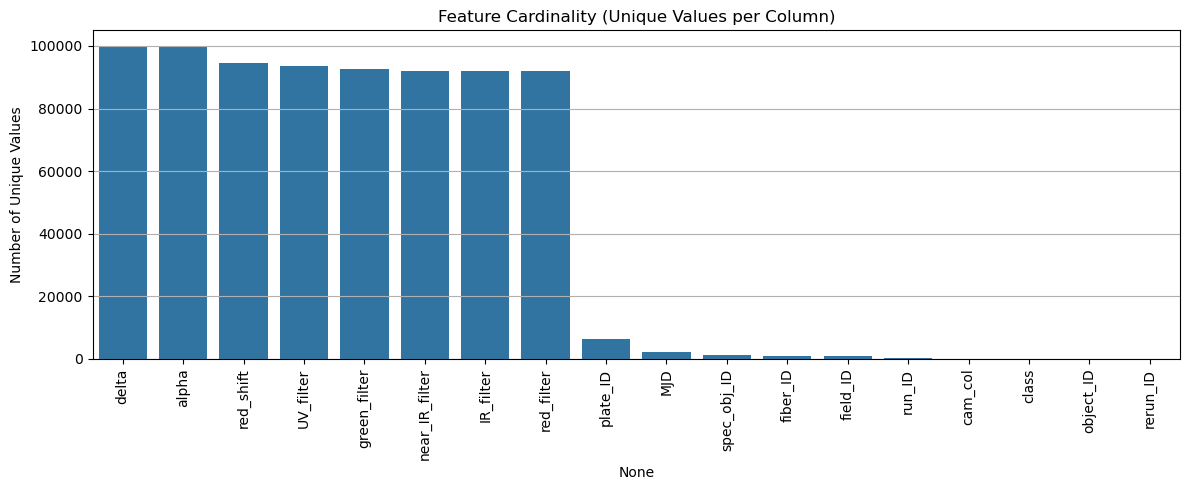

In [26]:
cardinality = df.nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=cardinality.index, y=cardinality.values)
plt.xticks(rotation=90)
plt.title("Feature Cardinality (Unique Values per Column)")
plt.ylabel("Number of Unique Values")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Features like object_ID and rerun_ID hold no variance, this makes it an unviable feature to train the model, as mentioned we should consider dropping "object_ID" and "rerun_ID" to reduce the dimensionality of our dataset.

<b> Exploring the data structure of each Unique Identifier </b>

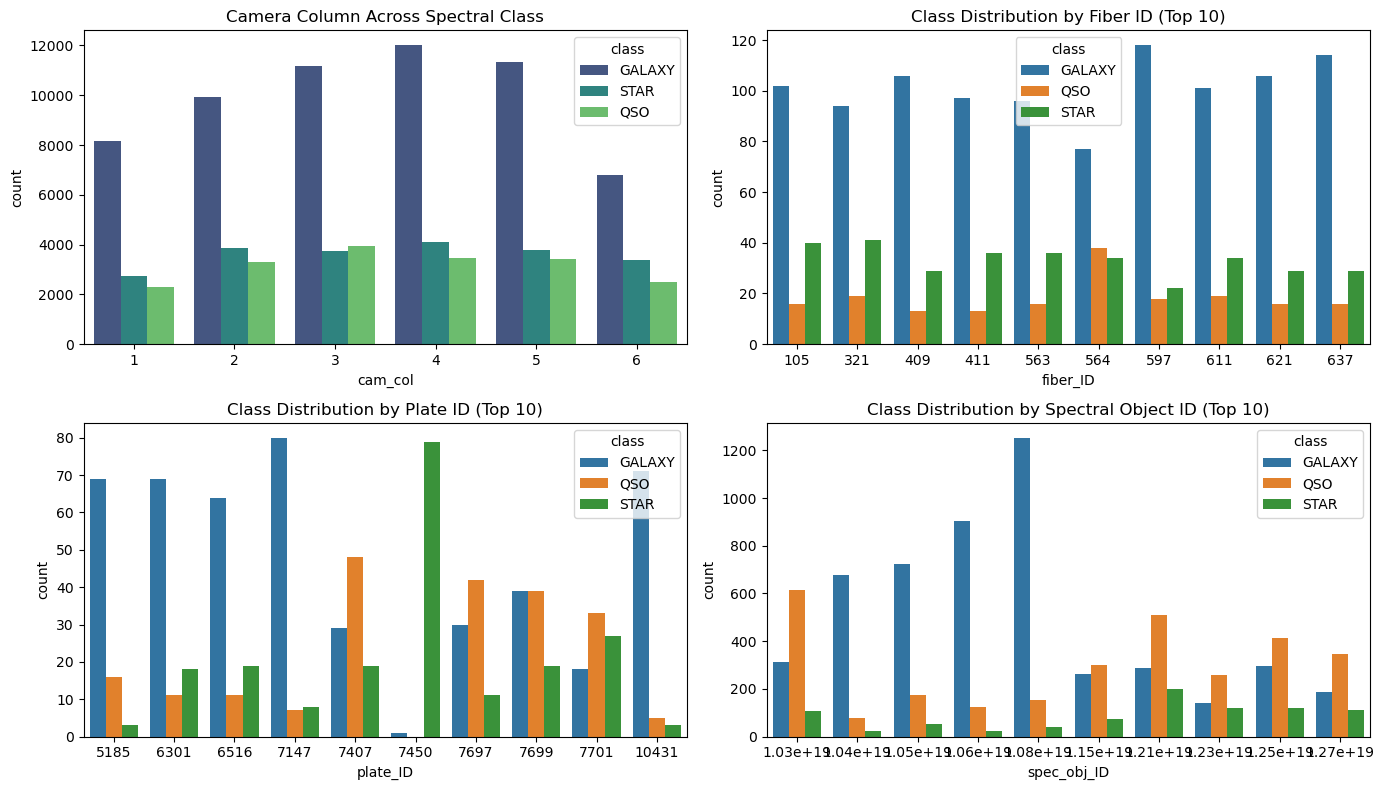

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))  # 2 row, 2 columns

sns.countplot(x='cam_col', data=df, ax=axs[0,0], palette="viridis", hue="class")
axs[0,0].set_title("Camera Column Across Spectral Class")

sns.countplot(x='fiber_ID', hue='class', data=df[df['fiber_ID'].isin(df['fiber_ID'].value_counts().head(10).index)], ax=axs[0,1])
axs[0,1].set_title("Class Distribution by Fiber ID (Top 10)")

sns.countplot(x='plate_ID', hue='class', data=df[df['plate_ID'].isin(df['plate_ID'].value_counts().head(10).index)], ax=axs[1,0])
axs[1,0].set_title("Class Distribution by Plate ID (Top 10)")

sns.countplot(x='spec_obj_ID', hue='class', data=df[df['spec_obj_ID'].isin(df['spec_obj_ID'].value_counts().head(10).index)], ax=axs[1,1])
axs[1,1].set_title("Class Distribution by Spectral Object ID (Top 10)")

plt.tight_layout()
plt.show()

- The distribution of <b>cam_col</b> across the classes is nearly identical, this boxplot shows that cam_col holds no variance across the classes and we should consider dropping it as the model may not be able to learn any meaningful patterns from the data.

- The distribution of classes across <b>fiber_ID</b> is evenly distributed across each fiber ID, this could suggest that fiber ID does not have high predictive power and we should consider dropping these columns to reduce dimensionality.

- The distribution of classes across <b>plate ID</b> shows very distinct class distributions, with each plate ID clearly matching and being highly predictive of each class. Some examples include: 
    - Plate 7450: Almost exclusively STARS (green bars)
    - Plate 7147: Almost exclusively GALAXIES (blue bars)
    - Plate 7407: High concentration of QSOs (orange bars)
    - Plates 7697, 7699, 7701: Mixed but still biased distributions
    This signals possible Data Leakage where the plate ID is essentially encoding the target variable.
    - The model can learn and predict classes with high accuracy just by utilising the plate number, the model is learning this pattern instead of genuiene astronomical features.

- The distribution of classes across <b>Spectral Object ID</b> shows quite distinct distributions with each Spectral Object ID somewhat matching to the classes and being highly predictive of the classes. This may result in data leakage where the model purely learns patterns of the IDs instead of learning from raw astronomical data.

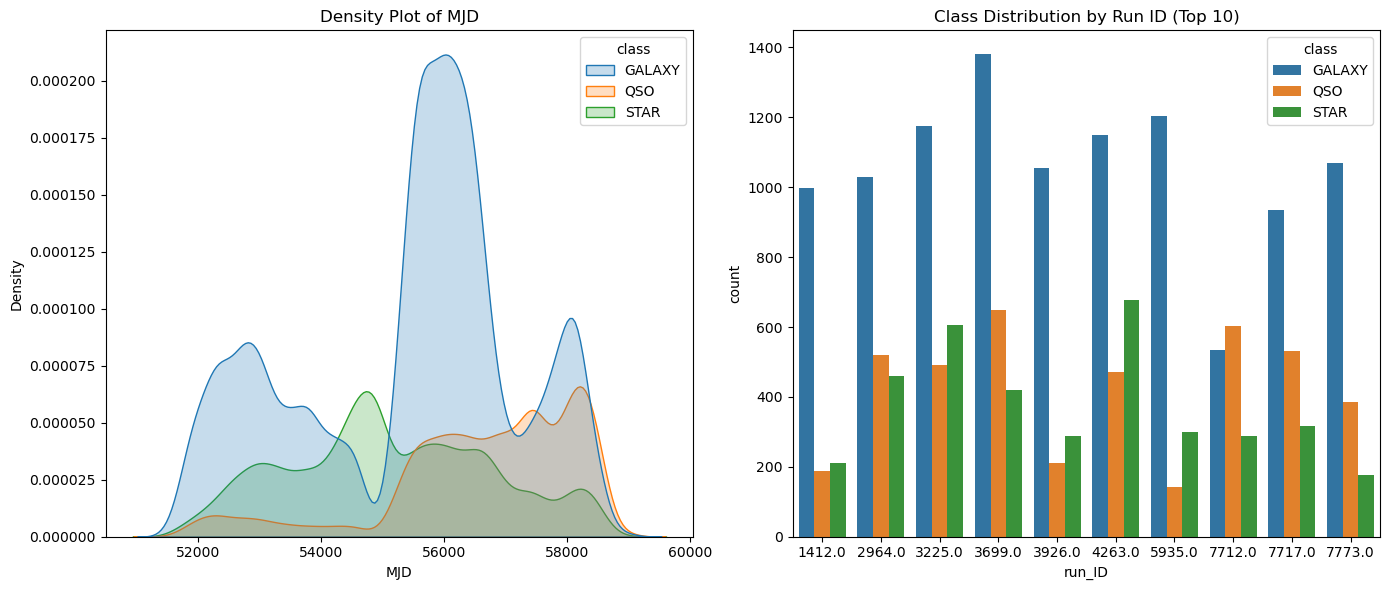

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 2 row, 2 columns

sns.kdeplot(data = df, x=df["MJD"], fill=True, hue="class", ax=axs[0])
axs[0].set_title('Density Plot of MJD')
axs[0].set_xlabel('MJD')

sns.countplot(x='run_ID', hue='class', data=df[df['run_ID'].isin(df['run_ID'].value_counts().head(10).index)], ax=axs[1])
axs[1].set_title("Class Distribution by Run ID (Top 10)")

plt.tight_layout()
plt.show()

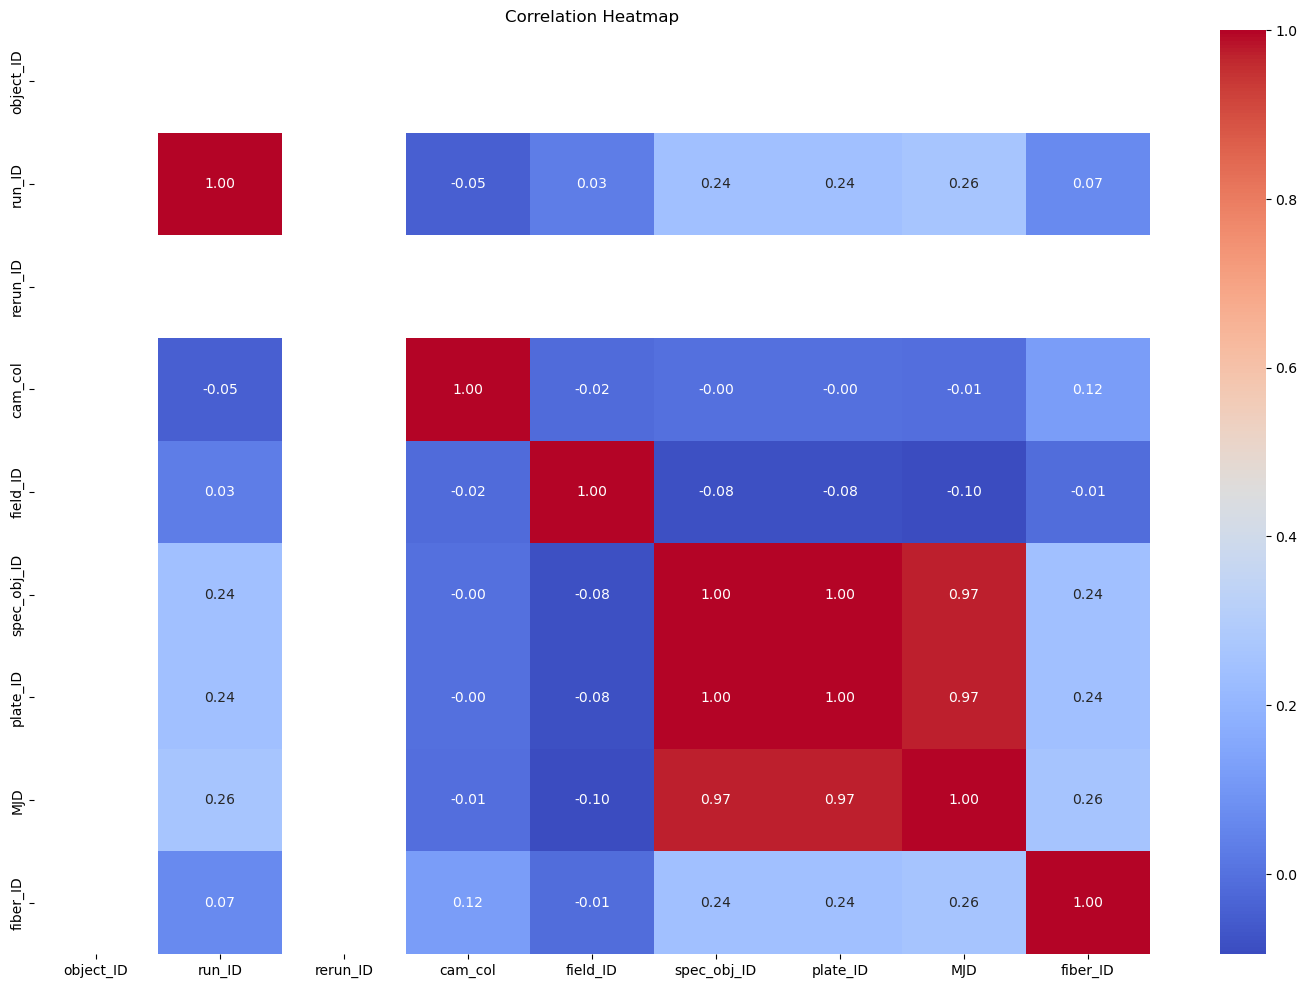

In [29]:
fig = plt.figure(figsize=(18,12))
corr_features = ['object_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate_ID', 'MJD','fiber_ID']
corr_matrix = df[corr_features].corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Extremely high correlation between columns "spec_obj_ID", "plate_ID" and "MJD"

In summary:
- We should consider dropping all the ID columns or combining some of the ID columns(spec_obj_ID, plate_ID, MJD) as they either have low variance or may result in data leakage. However, more proof needs to be found and visualized before dropping these columns. By dropping these columns we can also reduce dimensionality in our dataset.

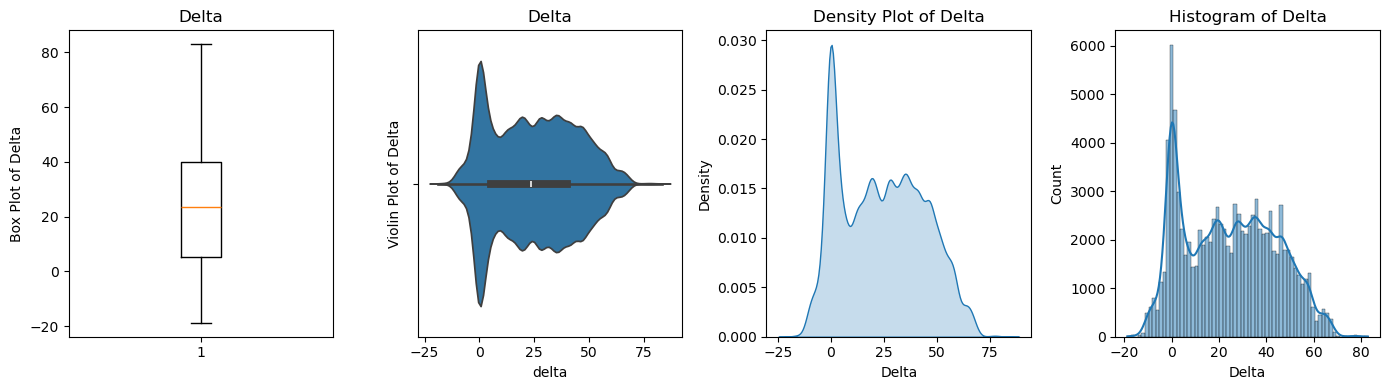

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['delta'])
axs[0].set_title('Box Plot of Delta')
axs[0].set_ylabel('Delta')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x="delta", data=df,fill=True, ax=axs[1])
axs[1].set_title('Violin Plot of Delta')
axs[1].set_ylabel('Density')

sns.kdeplot(data=df['delta'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Delta')
axs[2].set_xlabel('Delta')
axs[2].set_ylabel('Density')

sns.histplot(df["delta"], kde=True, ax=axs[3])
axs[3].set_title('Histogram of Delta')
axs[3].set_xlabel('Delta')

plt.tight_layout()
plt.show()

The delta feature follows a Multimodal Distribution where the data doesn't follow a normal distribution. Instead, it has two distinct peaks, A sharp, intense peak around 0-5 (highest concentration) and abroader peak spanning 20-45 (significant but less dense). Additionally, the delta feature does not contain many distinct outliers.

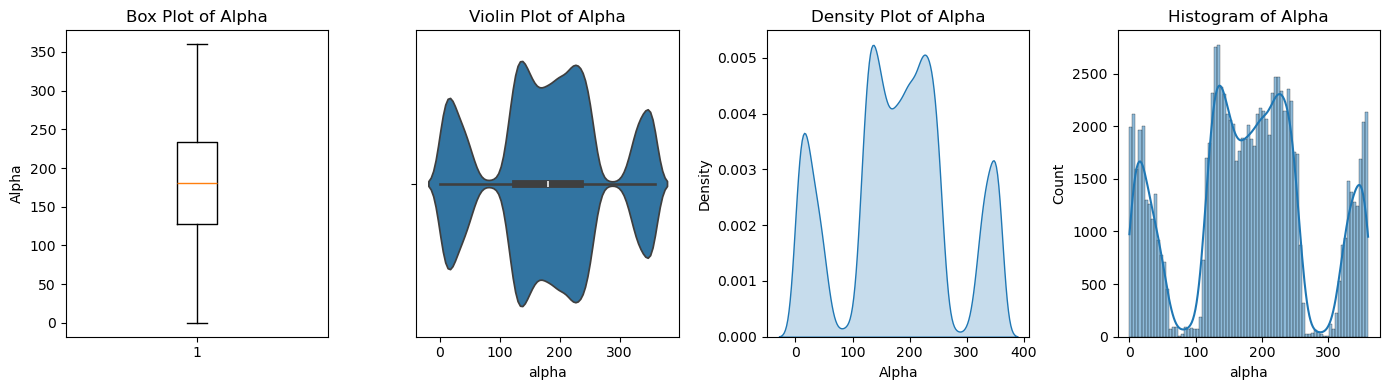

In [31]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['alpha'])
axs[0].set_title('Box Plot of Alpha')
axs[0].set_ylabel('Alpha')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x="alpha", data=df, ax=axs[1])
axs[1].set_title('Violin Plot of Alpha')
axs[1].set_xlabel('alpha')

sns.kdeplot(data=df['alpha'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Alpha')
axs[2].set_xlabel('Alpha')
axs[2].set_ylabel('Density')

sns.histplot(df["alpha"], kde=True, ax=axs[3])
axs[3].set_title('Histogram of Alpha')
axs[3].set_xlabel('alpha')

plt.tight_layout()
plt.show()

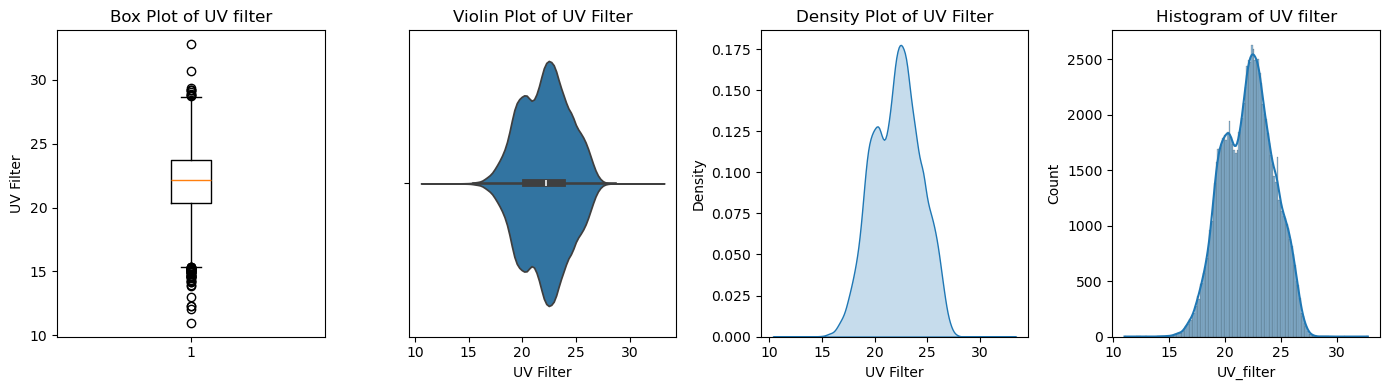

In [34]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['UV_filter'])
axs[0].set_title('Box Plot of UV filter')
axs[0].set_ylabel('UV Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='UV_filter', data=df, ax=axs[1])
axs[1].set_title('Violin Plot of UV Filter')
axs[1].set_xlabel('UV Filter')

# Density plot
sns.kdeplot(data=df['UV_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of UV Filter')
axs[2].set_xlabel('UV Filter')
axs[2].set_ylabel('Density')

sns.histplot(df["UV_filter"], kde=True, ax=axs[3])
axs[3].set_title('Histogram of UV filter')
axs[3].set_xlabel('UV_filter')

plt.tight_layout()
plt.show()

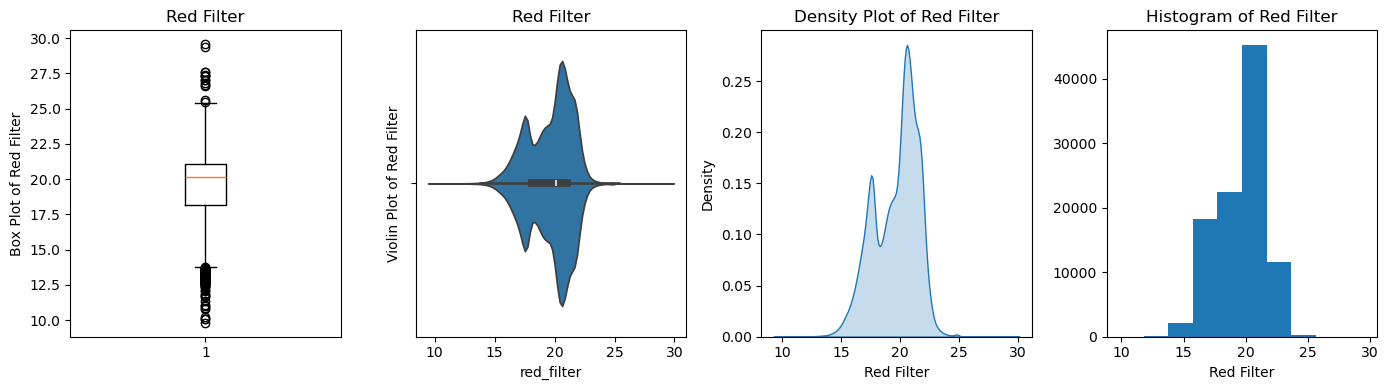

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['red_filter'])
axs[0].set_title('Red Filter')
axs[0].set_ylabel('Red Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='red_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Viloin Plot of Red Filter')
axs[1].set_ylabel('Violin Plot of Red Filter')

sns.kdeplot(data=df['red_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Red Filter')
axs[2].set_xlabel('Red Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['red_filter'])
axs[3].set_title('Histogram of Red Filter')
axs[3].set_xlabel('Red Filter')

plt.tight_layout()
plt.show()

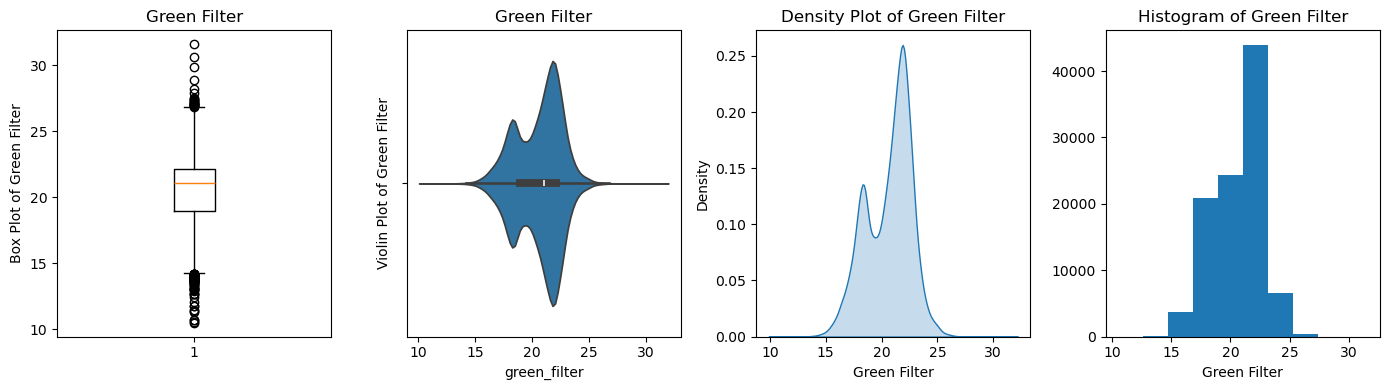

In [35]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['green_filter'])
axs[0].set_title('Green Filter')
axs[0].set_ylabel('Box Plot of Green Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='green_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Green Filter')
axs[1].set_ylabel('Violin Plot of Green Filter')

sns.kdeplot(data=df['green_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Green Filter')
axs[2].set_xlabel('Green Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['green_filter'])
axs[3].set_title('Histogram of Green Filter')
axs[3].set_xlabel('Green Filter')

plt.tight_layout()
plt.show()

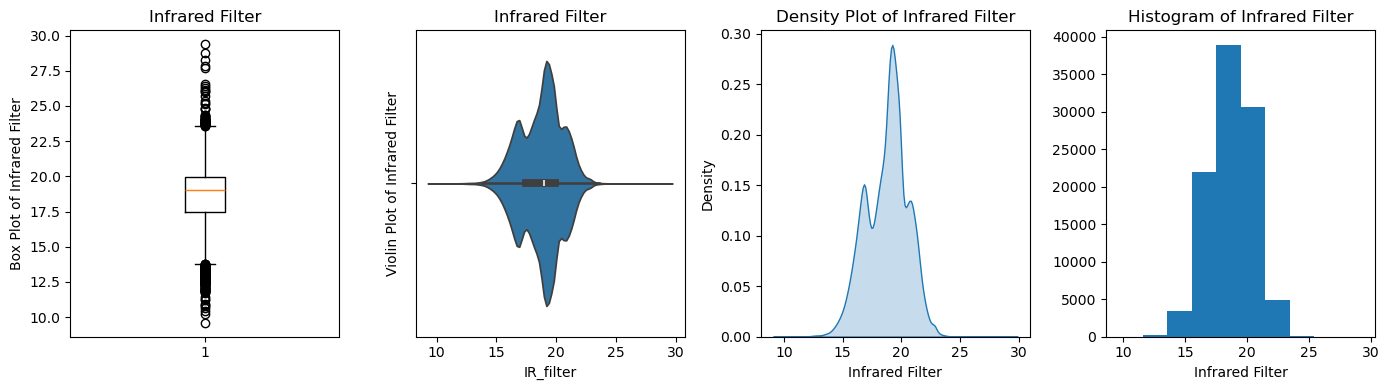

In [36]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['IR_filter'])
axs[0].set_title('Infrared Filter')
axs[0].set_ylabel('Box Plot of Infrared Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='IR_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Infrared Filter')
axs[1].set_ylabel('Violin Plot of Infrared Filter')

sns.kdeplot(data=df['IR_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Infrared Filter')
axs[2].set_xlabel('Infrared Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['IR_filter'])
axs[3].set_title('Histogram of Infrared Filter')
axs[3].set_xlabel('Infrared Filter')

plt.tight_layout()
plt.show()

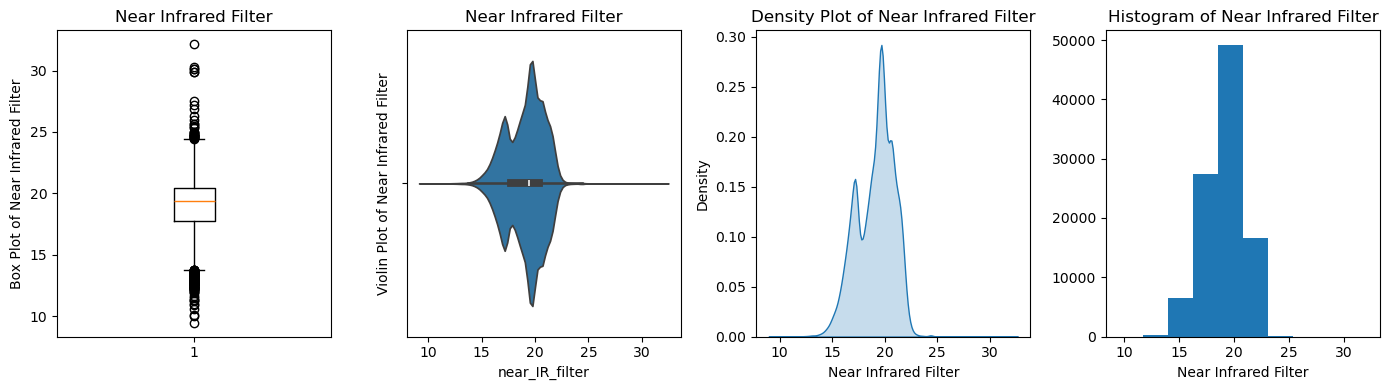

In [37]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['near_IR_filter'])
axs[0].set_title('Near Infrared Filter')
axs[0].set_ylabel('Box Plot of Near Infrared Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='near_IR_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Near Infrared Filter')
axs[1].set_ylabel('Violin Plot of Near Infrared Filter')

sns.kdeplot(data=df['near_IR_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Near Infrared Filter')
axs[2].set_xlabel('Near Infrared Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['near_IR_filter'])
axs[3].set_title('Histogram of Near Infrared Filter')
axs[3].set_xlabel('Near Infrared Filter')

plt.tight_layout()
plt.show()

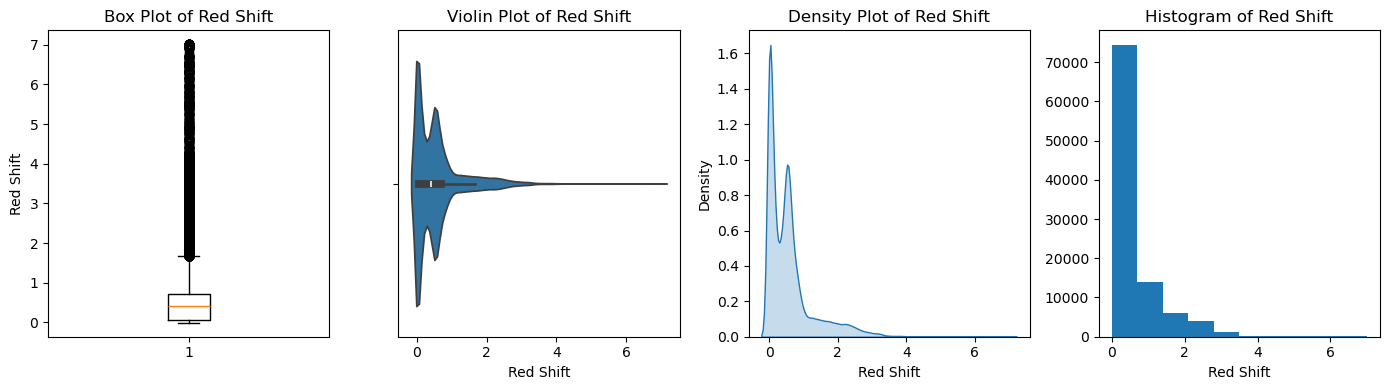

In [38]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['red_shift'])
axs[0].set_title('Box Plot of Red Shift')
axs[0].set_ylabel('Red Shift')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='red_shift', data=df, ax=axs[1])
axs[1].set_title('Violin Plot of Red Shift')
axs[1].set_xlabel('Red Shift')

sns.kdeplot(data=df['red_shift'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Red Shift')
axs[2].set_xlabel('Red Shift')
axs[2].set_ylabel('Density')

axs[3].hist(df['red_shift'])
axs[3].set_title('Histogram of Red Shift')
axs[3].set_xlabel('Red Shift')

plt.tight_layout()
plt.show()

In the univariate plot for Red Shift, we can conclude that most of the values are concentrated in the 0-3 range, the dataset has little values in the > 3 range. This could be due to outliers or as part of real data.

All features do not have a gaussian(bell-shaped) distribution, so we will be using either standard scaler or robust scaler to normalize the data.
To further determine which scaler we are using we have to perform further data exploration. 

##### <b>Discrete Data</b> #####

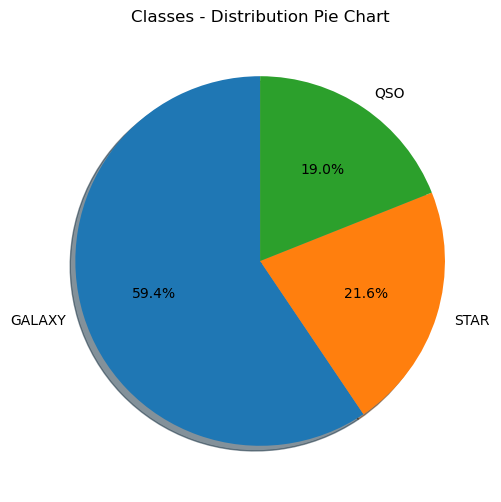

In [40]:
df['class'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    shadow=True,
    startangle=90,
    label='',  # Hides the y-axis label
    title='Classes - Distribution Pie Chart'
)
plt.show()

#### <b>Multivariate Analysis</b> ####

In [41]:
df.columns

Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD', 'fiber_ID', 'class'], dtype='object')

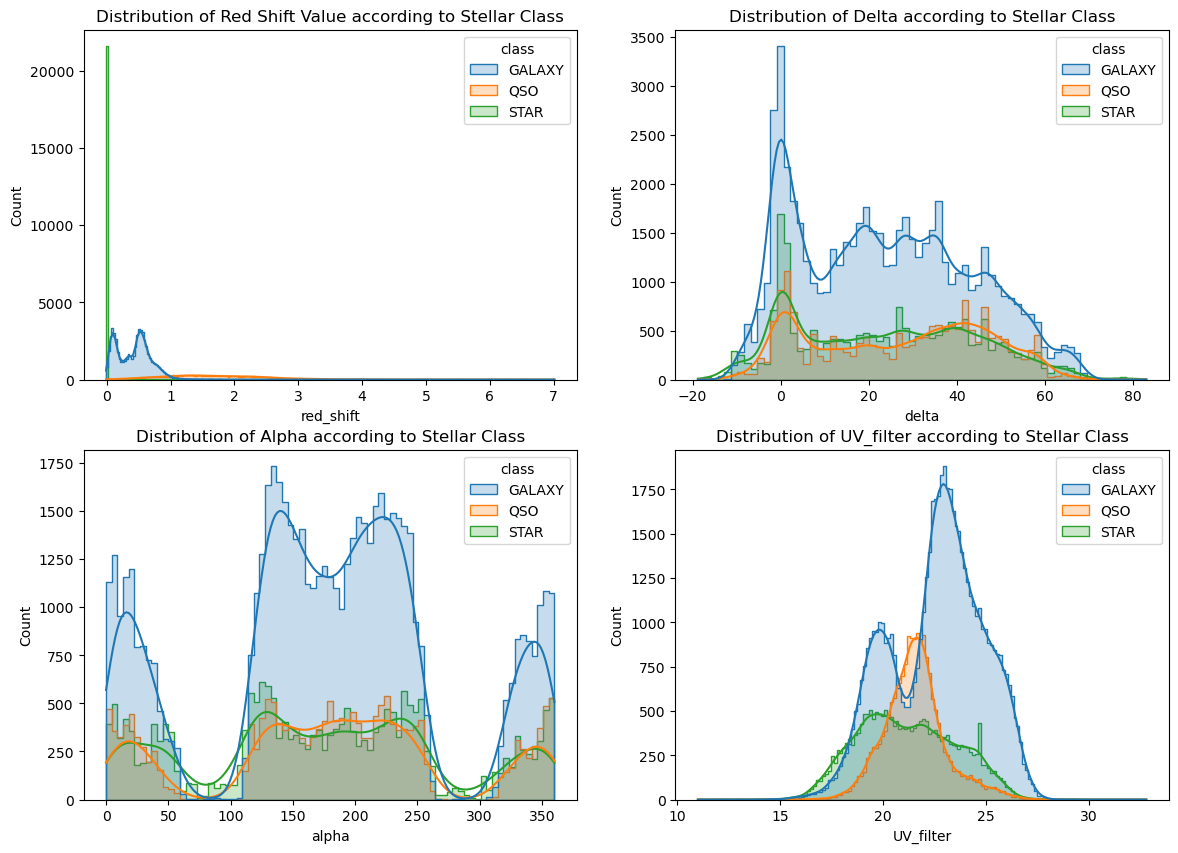

In [39]:
fig, axs = fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data=df, x="red_shift", hue="class", kde=True, element="step", common_norm=False, ax= axs[0,0])
axs[0,0].set_title("Distribution of Red Shift Value according to Stellar Class")

sns.histplot(data=df, x="delta", hue="class", kde=True, element="step", common_norm=False, ax= axs[0,1])
axs[0,1].set_title("Distribution of Delta according to Stellar Class")

sns.histplot(data=df, x="alpha", hue="class", kde=True, element="step", common_norm=False, ax= axs[1,0])
axs[1,0].set_title("Distribution of Alpha according to Stellar Class")

sns.histplot(data=cleaned_df, x="UV_filter", hue="class", kde=True, element="step", common_norm=False, ax= axs[1,1])
axs[1,1].set_title("Distribution of UV_filter according to Stellar Class")

plt.show()

- There is not much variance between the alpha values and stellar class, despite different stellar classes, the distribution of the alpha values are consistent.
- Similar to alpha, there is not much variance between delta values and stellar classes, despite different stellar classes, the distribution of the delta values are consistent.

Thus, we can consider dropping both alpha and delta columns as they do not hold varying patterns for classes and dropping them reduces dimensionality.

- UV_filter: Different classes have varying distributions of their UV Filter; This is ideal for our model as it can capture these distributions, learn and predict accurate results.
- Red_Shift: Different classes have varying distributions of their Red Shift. The red shift seems to have high predictive power as the distributions between each class is very vast and different

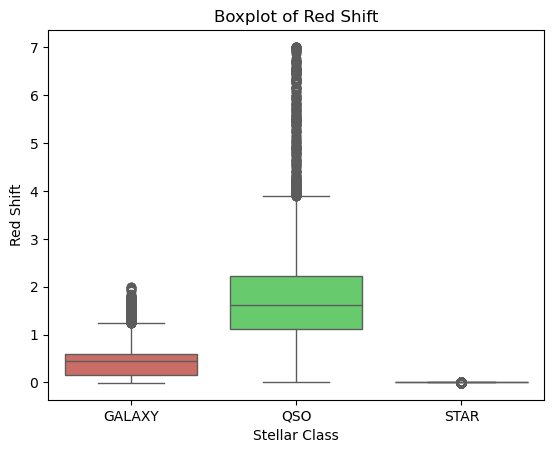

In [42]:
sns.boxplot(data=df, x="class", y="red_shift", palette="hls", legend=False)
plt.title('Boxplot of Red Shift')
plt.xlabel('Stellar Class')
plt.ylabel('Red Shift')
plt.show()

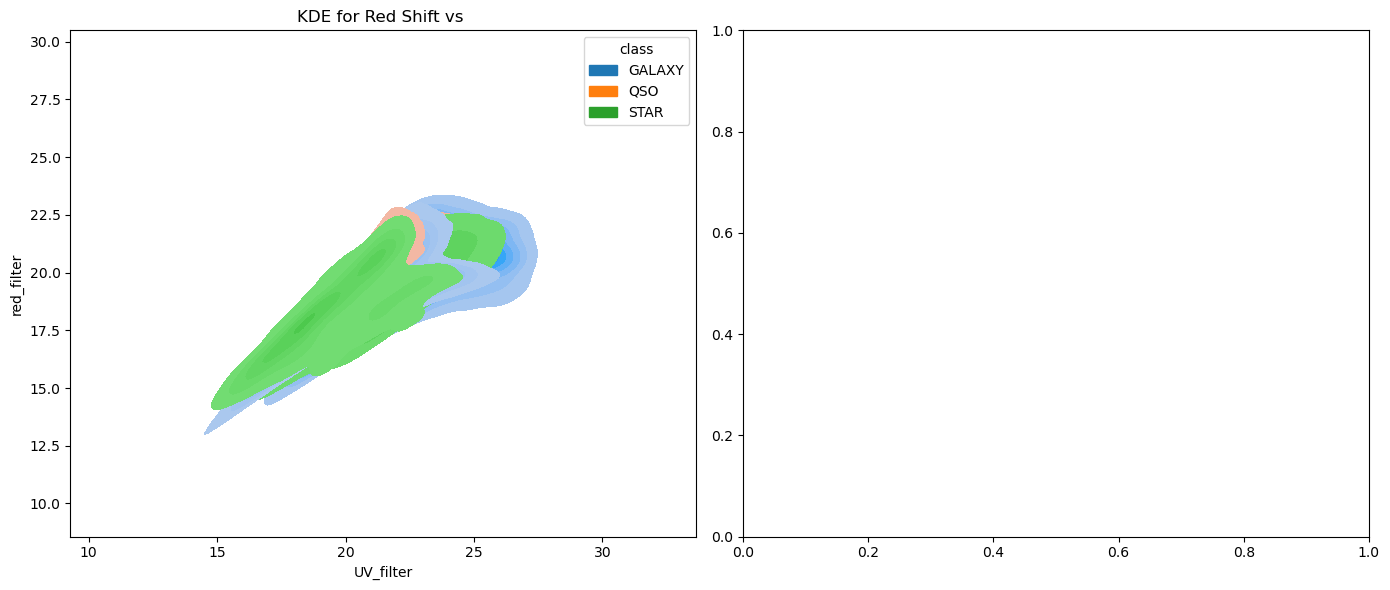

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

sns.kdeplot(data=cleaned_df, x="UV_filter", y="red_filter", hue="class", fill=True, ax=axs[0])
axs[0].set_title("KDE for Red Shift vs ")

sns.kdeplot(data=cleaned_df, x="green_filter", y="IR_filter", hue="class", fill=True, ax=axs[1])
axs[1].set_title("KDE for Green Filter vs Infrared Filter")

plt.tight_layout()
plt.show()

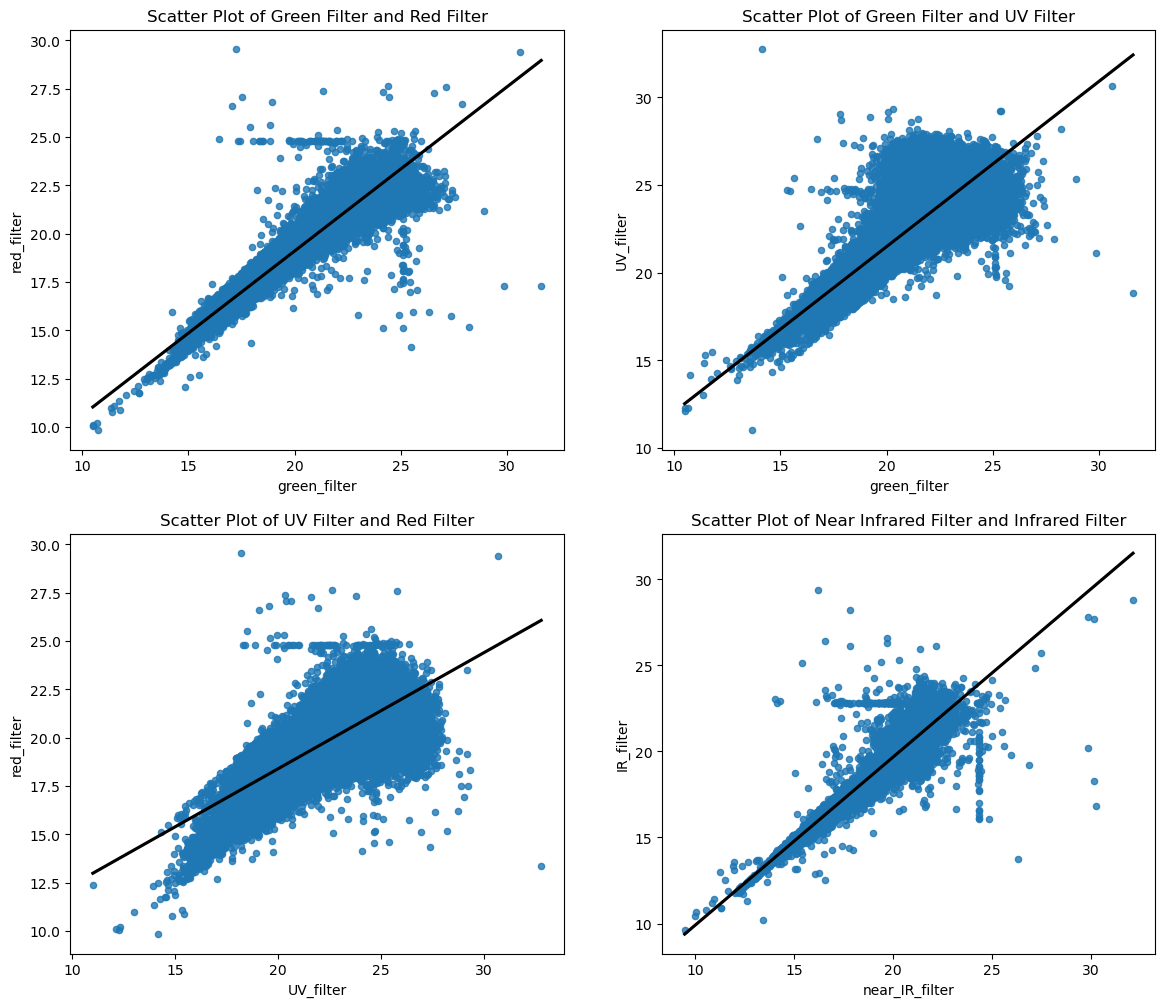

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # 2 row, 2 columns

sns.regplot(data=df, x="green_filter", y="red_filter", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[0,0])
axs[0,0].set_title("Scatter Plot of Green Filter and Red Filter")

sns.regplot(data=df, x="green_filter", y="UV_filter", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[0,1])
axs[0,1].set_title("Scatter Plot of Green Filter and UV Filter")

sns.regplot(data=df, x="UV_filter", y="red_filter", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[1,0])
axs[1,0].set_title("Scatter Plot of UV Filter and Red Filter")

sns.regplot(data=df, x="near_IR_filter", y="IR_filter", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[1,1])
axs[1,1].set_title("Scatter Plot of Near Infrared Filter and Infrared Filter")

plt.show()

As seen from the scatter plot, the filters are highly correlated. What does this mean for our model? Some machine learning models assume independent features, having highly correlated features <b>confuse</b> the model making it difficult for models to learn which features are actually influencing the target variable.
This results in greater noise and can lead to overfitting.

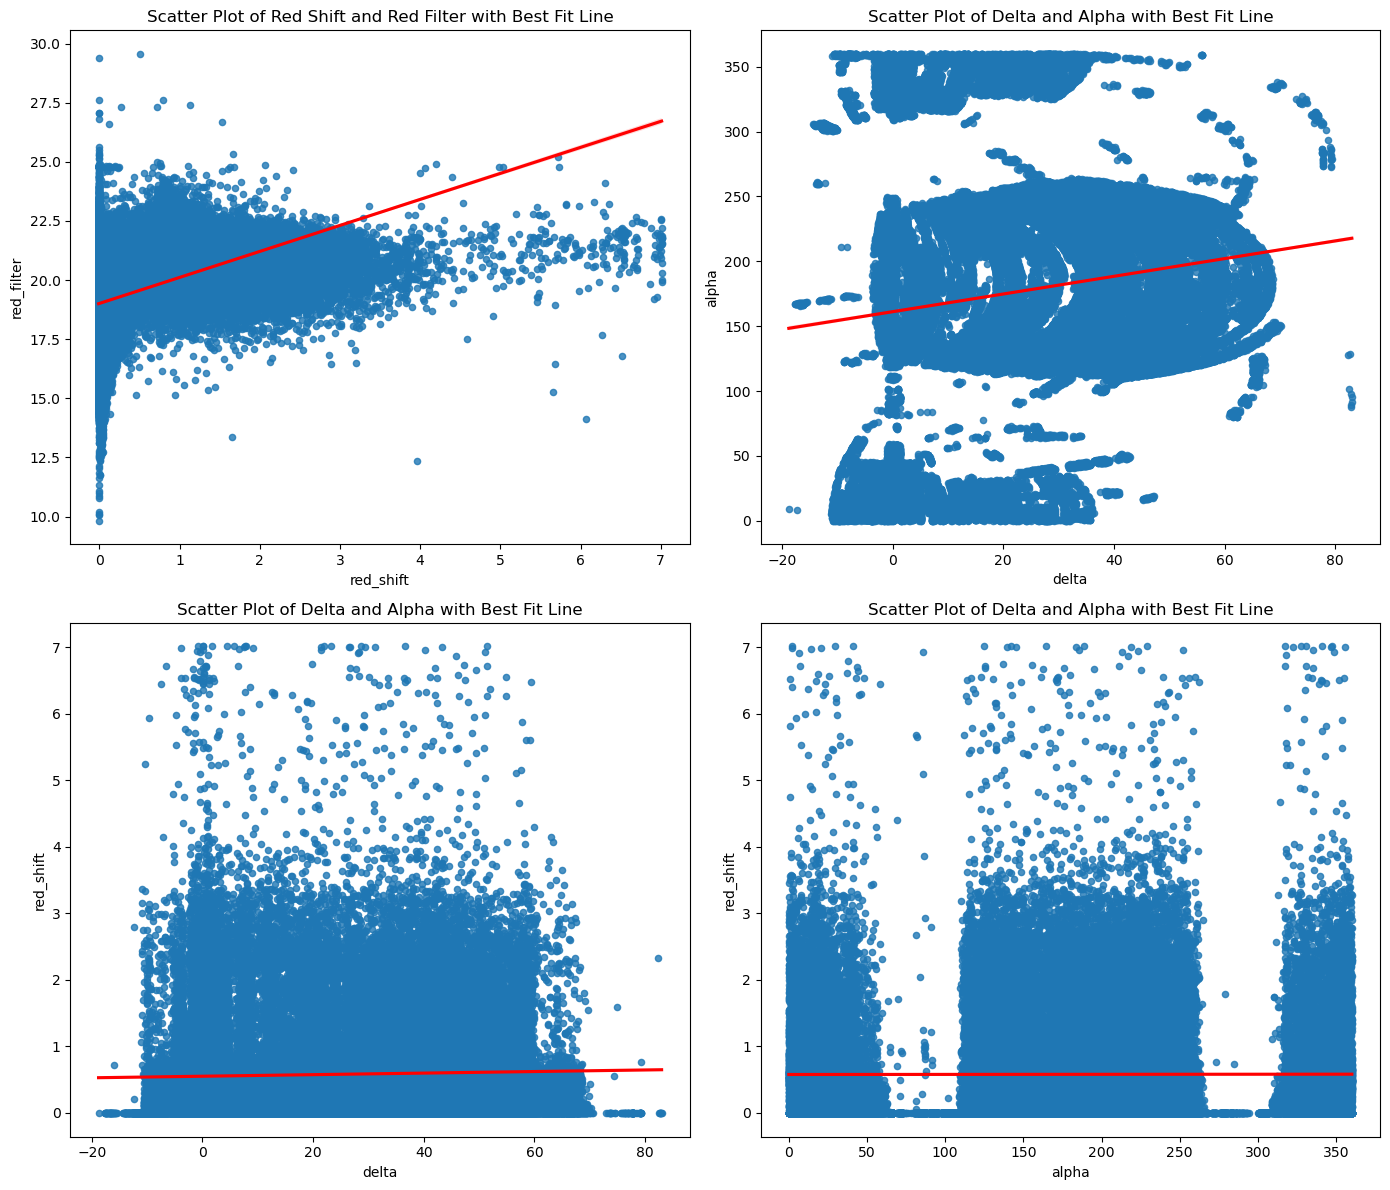

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # 2 row, 2 columns

sns.regplot(data=df, x="red_shift", y="red_filter", scatter_kws={"s": 20}, line_kws={"color": "red"}, ax=axs[0,0])
axs[0,0].set_title("Scatter Plot of Red Shift and Red Filter with Best Fit Line")

sns.regplot(data=df, x="delta", y="alpha", scatter_kws={"s": 20}, line_kws={"color": "red"}, ax=axs[0,1])
axs[0,1].set_title("Scatter Plot of Delta and Alpha with Best Fit Line")

sns.regplot(data=df, x="delta", y="red_shift", scatter_kws={"s": 20}, line_kws={"color": "red"}, ax=axs[1,0])
axs[1,0].set_title("Scatter Plot of Delta and Alpha with Best Fit Line")

sns.regplot(data=df, x="alpha", y="red_shift", scatter_kws={"s": 20}, line_kws={"color": "red"}, ax=axs[1,1])
axs[1,1].set_title("Scatter Plot of Delta and Alpha with Best Fit Line")

plt.tight_layout()
plt.show()

No correlation between filter variables, red shift, alpha and delta

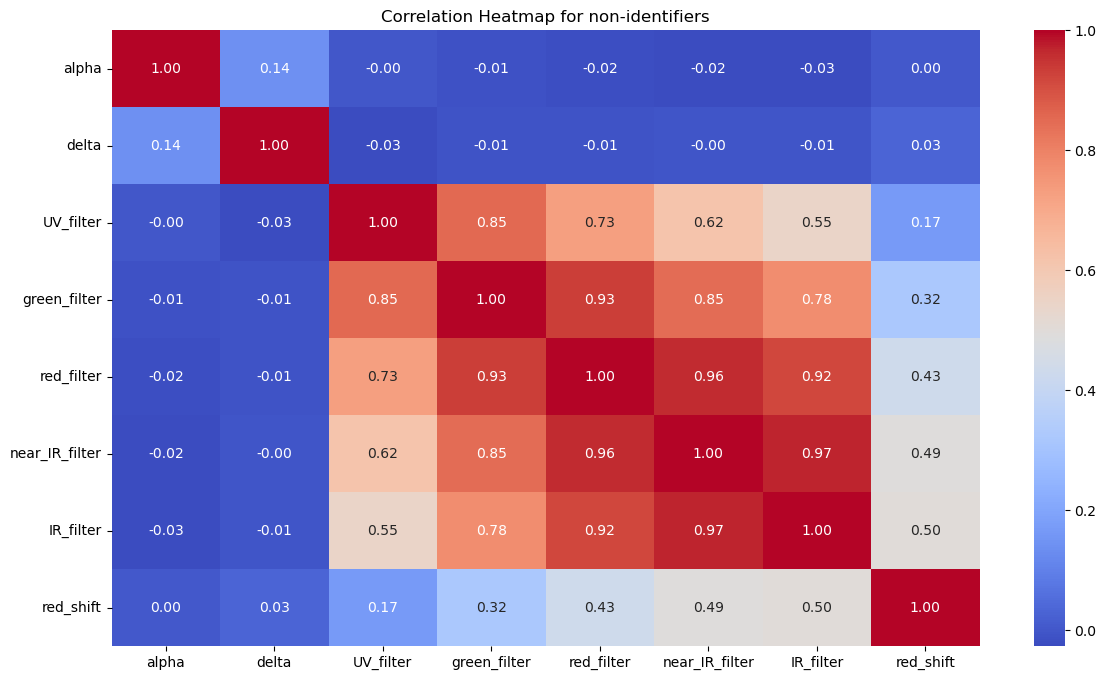

In [ ]:
fig = plt.figure(figsize=(14,8))
corr_features = ['alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'red_shift']
corr_matrix = cleaned_df[corr_features].corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for non-identifiers")
plt.show()

As seen from the heatmap, we can fully ascertain that filter features are very highly correlated with one another. During data preprocessing we can perform PCA/combine these highly correlated columns to reduce dimensionality and decrease data colinearity.

## <b> ✎ Data Cleaning</b> ##

- Basic Data Cleaning - Missing Values, Mistyped values (To be done on ALL datasets)

Only for tuned dataset:
- Remove irrelevant columns - All ID columns, some ID columns are related to the features used in predicting
- Feature engineering - Convert MJD to seasons
- Address Outliers
- Normalize Dataset
- Dimensionality and reducing Multicolinearity - Use PCA to create new features derived from old ones
- Data Binnning/Discretization
- imputation for missing values - "alpha" and "delta"

#### <b>Basic Data Cleaning</b> ####

In [303]:
df['alpha'] = pd.to_numeric(df['alpha'], errors='coerce')
# drop rows with failed conversions
df = df.dropna(subset=['alpha'])

In [304]:
# drop missing rows
df = df.dropna()

In [305]:
df.isna().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

No Null/Missing values in dataset.

In [306]:
df

object_ID       alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class
0      1.240000e+18  135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371  3606.0       301        2        79  6.540000e+18   0.634794      5812  56354       171  GALAXY
1      1.240000e+18  144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427  4518.0       301        5       119  1.180000e+19   0.779136     10445  58158       427  GALAXY
2      1.240000e+18  142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827  3606.0       301        2       120  5.150000e+18   0.644195      4576  55592       299  GALAXY
3      1.240000e+18  338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010  4192.0       301        3       214  1.030000e+19   0.932346      9149  58039       775  GALAXY
5      1.240000e+18  340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544  8102.0       301        3       110  5.660000e+18   1.424659      5026  55855       741     QSO
...             ...         ...        ...        ...           ...         ...             ...        ...     ...       ...      ...       ...           ...        ...       ...    ...       ...     ...
99995  1.240000e+18   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569  7778.0       301        2       581  1.060000e+19   0.000000      9374  57749       438  GALAXY
99996  1.240000e+18   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526  7917.0       301        1       289  8.590000e+18   0.404895      7626  56934       866  GALAXY
99997  1.240000e+18  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221  5314.0       301        4       308  3.110000e+18   0.143366      2764  54535        74  GALAXY
99998  1.240000e+18  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482  3650.0       301        4       131  7.600000e+18   0.455040      6751  56368       470  GALAXY
99999  1.240000e+18  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075  3650.0       301        4        60  8.340000e+18   0.542944      7410  57104       851  GALAXY

[99988 rows x 18 columns]

#### <b>Removing Irrelevant Columns</b> ####

- These columns are all IDs related to the <b>specific</b> row.
- If the model learns from these data, it may end up learning patterns from IDs instead of RAW data.
- Affects the accuracy of the model.
- Having these ID columns also causes overfitting of data, where training data is at perfect accuracy (100%), refer to appendix [4; Learning Curve]

In [307]:
df

object_ID       alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class
0      1.240000e+18  135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371  3606.0       301        2        79  6.540000e+18   0.634794      5812  56354       171  GALAXY
1      1.240000e+18  144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427  4518.0       301        5       119  1.180000e+19   0.779136     10445  58158       427  GALAXY
2      1.240000e+18  142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827  3606.0       301        2       120  5.150000e+18   0.644195      4576  55592       299  GALAXY
3      1.240000e+18  338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010  4192.0       301        3       214  1.030000e+19   0.932346      9149  58039       775  GALAXY
5      1.240000e+18  340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544  8102.0       301        3       110  5.660000e+18   1.424659      5026  55855       741     QSO
...             ...         ...        ...        ...           ...         ...             ...        ...     ...       ...      ...       ...           ...        ...       ...    ...       ...     ...
99995  1.240000e+18   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569  7778.0       301        2       581  1.060000e+19   0.000000      9374  57749       438  GALAXY
99996  1.240000e+18   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526  7917.0       301        1       289  8.590000e+18   0.404895      7626  56934       866  GALAXY
99997  1.240000e+18  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221  5314.0       301        4       308  3.110000e+18   0.143366      2764  54535        74  GALAXY
99998  1.240000e+18  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482  3650.0       301        4       131  7.600000e+18   0.455040      6751  56368       470  GALAXY
99999  1.240000e+18  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075  3650.0       301        4        60  8.340000e+18   0.542944      7410  57104       851  GALAXY

[99988 rows x 18 columns]

In [308]:
df = df.drop(["run_ID", "rerun_ID", "object_ID", "field_ID", "spec_obj_ID", "plate_ID", "fiber_ID","cam_col"], axis=1)

#### <b>Feature Engineering</b>

- Grouping Date Columns in Season to test if the season has an impact on the stellar classes 
- For Example: More stars in summer, lesser stars in winter
- By engineering date columns into meaningful seasonal categories (e.g., Spring, Summer, Fall, Winter) rather than using raw numerical date values, we can more effectively assess whether temporal patterns genuinely influence our model's performance, rather than the model learning spurious correlations from date-specific noise or arbitrary numerical encodings.

In [309]:
# Since Modified Julian Date is not in traditional datetime, we need to convert it to traditional datetime
# Converting MJD into universal date
df['datetime'] = pd.to_datetime(df['MJD'], origin='1858-11-17', unit='D')
df

alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift    MJD   class   datetime
0      135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371   0.634794  56354  GALAXY 2013-03-03
1      144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427   0.779136  58158  GALAXY 2018-02-09
2      142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827   0.644195  55592  GALAXY 2011-01-31
3      338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010   0.932346  58039  GALAXY 2017-10-13
5      340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544   1.424659  55855     QSO 2011-10-21
...           ...        ...        ...           ...         ...             ...        ...        ...    ...     ...        ...
99995   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569   0.000000  57749  GALAXY 2016-12-27
99996   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526   0.404895  56934  GALAXY 2014-10-04
99997  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221   0.143366  54535  GALAXY 2008-03-10
99998  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482   0.455040  56368  GALAXY 2013-03-17
99999  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075   0.542944  57104  GALAXY 2015-03-23

[99988 rows x 11 columns]

In [310]:
# Perfom feature engineering for the dates -> summer, autumn, spring, winter
def get_season(date):
    # Dummy date
    Y = 2000
    spring = (pd.Timestamp(f'{Y}-03-21'), pd.Timestamp(f'{Y}-06-20'))
    summer = (pd.Timestamp(f'{Y}-06-21'), pd.Timestamp(f'{Y}-09-22'))
    fall   = (pd.Timestamp(f'{Y}-09-23'), pd.Timestamp(f'{Y}-12-20'))

    try:
        date = date.replace(year=Y)
    except ValueError:
        broken_dates += date
        return None  # fallback for broken dates

    if spring[0] <= date <= spring[1]:
        return 'Spring'
    elif summer[0] <= date <= summer[1]:
        return 'Summer'
    elif fall[0] <= date <= fall[1]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to our df, this adds a new column ("season") into out dataframe
df['season'] = df['datetime'].apply(get_season)

In [311]:
df

alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift    MJD   class   datetime  season
0      135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371   0.634794  56354  GALAXY 2013-03-03  Winter
1      144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427   0.779136  58158  GALAXY 2018-02-09  Winter
2      142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827   0.644195  55592  GALAXY 2011-01-31  Winter
3      338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010   0.932346  58039  GALAXY 2017-10-13    Fall
5      340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544   1.424659  55855     QSO 2011-10-21    Fall
...           ...        ...        ...           ...         ...             ...        ...        ...    ...     ...        ...     ...
99995   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569   0.000000  57749  GALAXY 2016-12-27  Winter
99996   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526   0.404895  56934  GALAXY 2014-10-04    Fall
99997  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221   0.143366  54535  GALAXY 2008-03-10  Winter
99998  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482   0.455040  56368  GALAXY 2013-03-17  Winter
99999  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075   0.542944  57104  GALAXY 2015-03-23  Spring

[99988 rows x 12 columns]

In [312]:
#Removing Date Columns
df = df.drop(["MJD", "datetime"], axis=1)

#### <b>One Hot Encoding</b>

- As models cannot process discrete data, we need to use one hot encoding to encode our seasonal columns

In [313]:
encoded_df = pd.get_dummies(df, columns=["season"], dtype=int)
encoded_df

alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
0      135.689107  32.494632   23.87882      22.27530    20.39501        19.16573   18.79371   0.634794  GALAXY            0              0              0              1
1      144.826101  31.274185   24.77759      22.83188    22.58444        21.16812   21.61427   0.779136  GALAXY            0              0              0              1
2      142.188790  35.582444   25.26307      22.66389    20.60976        19.34857   18.94827   0.644195  GALAXY            0              0              0              1
3      338.741038  -0.402828   22.13682      23.77656    21.61162        20.50454   19.25010   0.932346  GALAXY            1              0              0              0
5      340.995120  20.589476   23.48827      23.33776    21.32195        20.25615   19.54544   1.424659     QSO            1              0              0              0
...           ...        ...        ...           ...         ...             ...        ...        ...     ...          ...            ...            ...            ...
99995   39.620709  -2.594074   22.16759      22.97586    21.90404        21.30548   20.73569   0.000000  GALAXY            0              0              0              1
99996   29.493819  19.798874   22.69118      22.38628    20.45003        19.75759   19.41526   0.404895  GALAXY            1              0              0              0
99997  224.587407  15.700707   21.16916      19.26997    18.20428        17.69034   17.35221   0.143366  GALAXY            0              0              0              1
99998  212.268621  46.660365   25.35039      21.63757    19.91386        19.07254   18.62482   0.455040  GALAXY            0              0              0              1
99999  196.896053  49.464643   22.62171      21.79745    20.60115        20.00959   19.28075   0.542944  GALAXY            0              1              0              0

[99988 rows x 13 columns]

In [314]:
df = encoded_df

#### <b>Outlier Analysis and Removal</b>

##### <b>Outlier Analysis Function</b> #####

In [61]:
def IQRThreshold(dataframe, col_name, q1, q3, multiplier=1.5):
    #Get Q1 and Q3 of the specified column
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + multiplier * interquantile_range
    low_limit = quartile1 -  multiplier * interquantile_range
    return low_limit, up_limit

In [62]:
def getOutliers(dataframe, col_name, index=False, q1=0.25, q3=0.75):
    lower, upper = IQRThreshold(dataframe, col_name, q1, q3)

    outliers = dataframe[(dataframe[col_name] < lower) | (dataframe[col_name] > upper)]
    return outliers

In [63]:
def getExtremeOutliers(dataframe, col_name, index=False, q1=0.25, q3=0.75):

    # For extreme outliers, the common multiplier for IQR is 3.0
    lower, upper = IQRThreshold(dataframe, col_name, q1, q3, multiplier=3.0)

    extreme_outliers = dataframe[(dataframe[col_name] < lower) | (dataframe[col_name] > upper)]

    if index:
        return extreme_outliers.index
    else:
        return extreme_outliers

##### <b>View Outliers</b>

alpha outliers:
No outliers were detected for alpha.

delta outliers:
No outliers were detected for delta.

UV_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
1046     0.115997  22.714164   29.19901      25.35543    23.48086        21.56495   17.17135   0.253981     QSO            1              0              0              0
4401   184.282050   7.624347   14.50678      12.67902    11.74664        11.29956   10.91847   0.007590  GALAXY            0              0              0              1
4472   239.423127  28.548438   12.26240      10.51139    10.06854        13.41786   10.22551   0.000025    STAR            0              0              0              1
6839   115.035475  49.271060   28.90174      19.24543    17.47902        16.80563   16.72323   0.787060  GALAXY            1              0              0              0
14227   84.217686   4.929016   14.64972      12.63574    12.14340        11.96598   13.13046   0.000290    STAR            1              0              0              0

(55, 13)


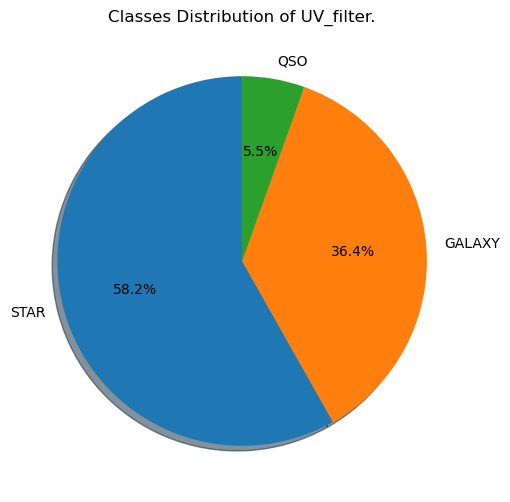

green_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
1124   22.433297  -1.241425   15.87450      14.02731    13.20467        12.80524   12.51869   0.017313  GALAXY            1              0              0              0
1708  143.138181  36.038534   27.80030      27.07299    22.63593        21.16288   19.30990   0.664254  GALAXY            0              1              0              0
1735  163.126884  45.786873   25.31965      28.90320    21.18100        20.03103   17.84232  -0.000188    STAR            0              1              0              0
3067  241.667426  30.099069   15.66604      13.83470    12.80579        12.22783   11.78913   0.021899  GALAXY            0              0              1              0
4160    3.127945  26.793295   21.99818      27.15748    21.39167        19.98409   18.74382   0.879488  GALAXY            1              0              0              0

(98, 13)


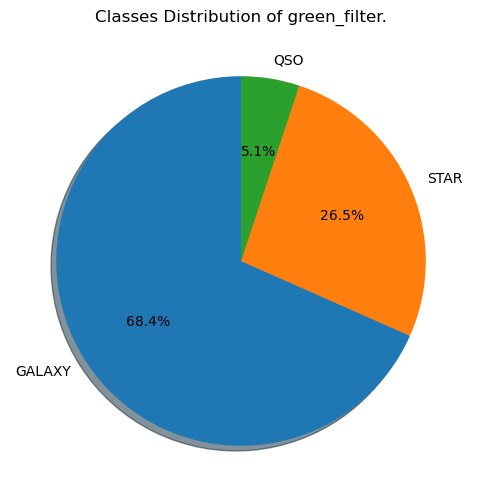

red_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
786   252.873026  19.416624   16.15454      14.30195    13.45793        13.03615   12.71279   0.022582  GALAXY            0              1              0              0
1124   22.433297  -1.241425   15.87450      14.02731    13.20467        12.80524   12.51869   0.017313  GALAXY            1              0              0              0
2823  135.998613  51.210149   15.72869      14.47018    13.65948        13.42487   13.39041  -0.000083    STAR            0              1              0              0
3067  241.667426  30.099069   15.66604      13.83470    12.80579        12.22783   11.78913   0.021899  GALAXY            0              0              1              0
3087   23.510250  -1.075744   16.10737      14.45376    13.65585        13.22250   12.83522   0.015473  GALAXY            1              0              0              0

(132, 13)


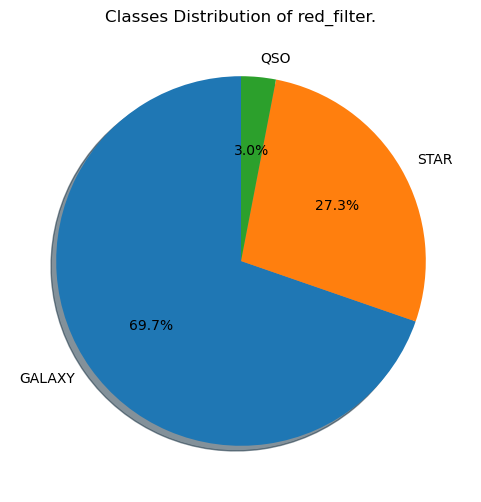

near_IR_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
238    66.518205  17.120654   19.05087      16.49607    14.96787        13.62782   12.39726   0.000086    STAR            1              0              0              0
786   252.873026  19.416624   16.15454      14.30195    13.45793        13.03615   12.71279   0.022582  GALAXY            0              1              0              0
1124   22.433297  -1.241425   15.87450      14.02731    13.20467        12.80524   12.51869   0.017313  GALAXY            1              0              0              0
1862  209.374661  32.557562   21.88364      24.96677    17.41405        24.78471   20.24118   0.482955  GALAXY            0              0              0              1
2823  135.998613  51.210149   15.72869      14.47018    13.65948        13.42487   13.39041  -0.000083    STAR            0              1              0              0

(198, 13)


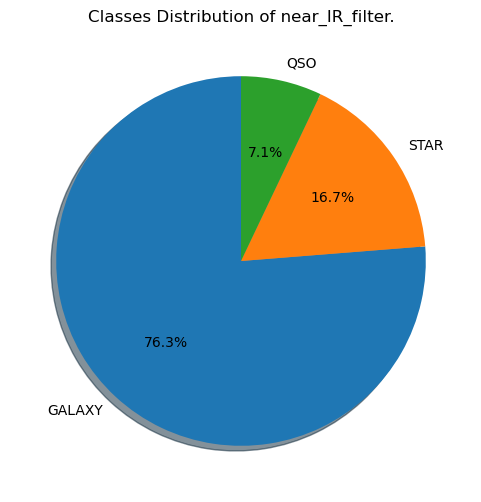

IR_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
238    66.518205  17.120654   19.05087      16.49607    14.96787        13.62782   12.39726   0.000086    STAR            1              0              0              0
367   249.936105  45.386083   22.73596      22.51808    22.18846        21.76720   23.99034   1.545372     QSO            0              1              0              0
786   252.873026  19.416624   16.15454      14.30195    13.45793        13.03615   12.71279   0.022582  GALAXY            0              1              0              0
1124   22.433297  -1.241425   15.87450      14.02731    13.20467        12.80524   12.51869   0.017313  GALAXY            1              0              0              0
2823  135.998613  51.210149   15.72869      14.47018    13.65948        13.42487   13.39041  -0.000083    STAR            0              1              0              0

(319, 13)


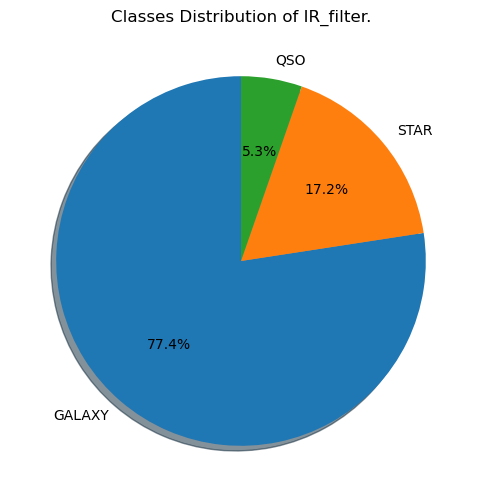

red_shift outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift class  season_Fall  season_Spring  season_Summer  season_Winter
17    1.494389   3.291746   20.38562      20.40514    20.29996        20.05918   19.89044   2.031528   QSO            1              0              0              0
23  145.883005  47.300484   21.73992      21.53095    21.26763        21.36257   21.15861   2.075680   QSO            0              0              0              1
47  228.447728  12.745032   22.36261      21.71060    21.59630        21.60179   21.12727   2.689002   QSO            0              1              0              0
71  178.504616  54.379157   21.77434      21.65529    21.77547        21.72382   21.66425   1.939080   QSO            0              0              0              1
83  187.973425  42.288816   23.33354      22.08951    21.85797        22.16238   22.55171   2.188856   QSO            0              1              0              0

(8989, 13)


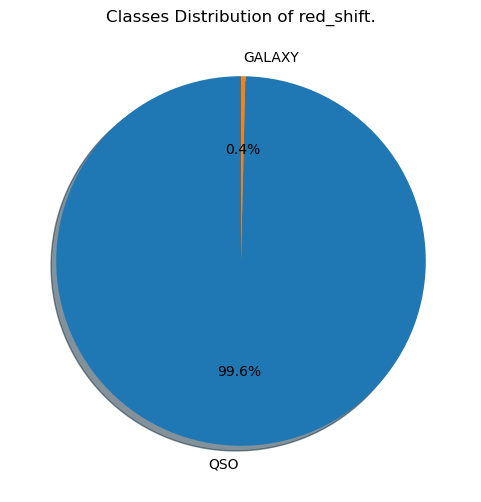

season_Fall outliers:
No outliers were detected for season_Fall.

season_Spring outliers:
No outliers were detected for season_Spring.

season_Summer outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
12  345.801874  32.672868   23.17274      20.14496    19.41948        19.22034   18.89359   0.000072    STAR            0              0              1              0
13  331.502030  10.035802   20.82940      18.75091    17.51118        17.01631   16.62772   0.152194  GALAXY            0              0              1              0
24  241.426267  27.224695   18.88323      17.54229    17.01789        16.75376   16.72259   0.032081  GALAXY            0              0              1              0
28  333.311511  -0.376123   20.53324      18.84066    18.05369        17.60397   17.29030   0.091085  GALAXY            0              0              1              0
29  337.093435  -0.311773   20.15491      18.37295    17.31276        16.82294   16.44342   0.148228  GALAXY            0              0              1              0

(9113, 13)


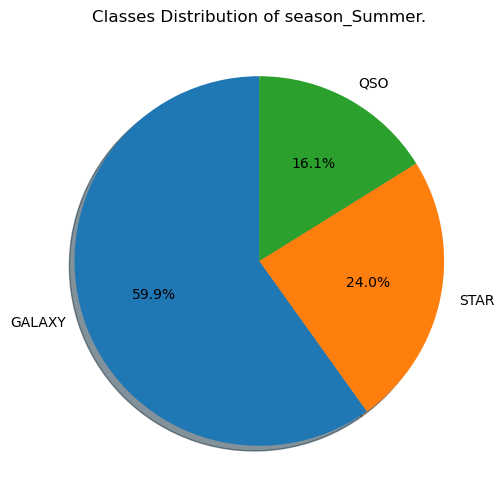

season_Winter outliers:
No outliers were detected for season_Winter.



In [64]:
numerical_cols = df.select_dtypes(exclude=["object"]).columns
for c in numerical_cols:
    print(f"{c} outliers:")
    outliers = getOutliers(df, c)
    if outliers.empty:
        print(f"No outliers were detected for {c}.\n")
    else:
        display(outliers.head())
        print(outliers.shape)
        outliers['class'].value_counts().plot.pie(
            autopct='%1.1f%%',
            figsize=(6, 6),
            shadow=True,
            startangle=90,
            label='',  
            title=f'Classes Distribution of {c}.'
    )
    plt.show()


alpha outliers:
No outliers were detected for alpha.

delta outliers:
No outliers were detected for delta.

UV_filter outliers:
No outliers were detected for UV_filter.

green_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
16115  145.757641  31.869546    18.8541      31.60224    17.28707         16.9323   16.35421   0.767975  GALAXY            0              0              0              1

(1, 13)


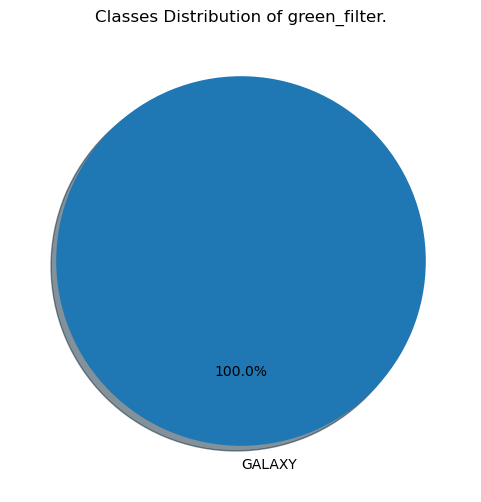

red_filter outliers:
No outliers were detected for red_filter.

near_IR_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
8934   169.053816  20.310490   20.27785      19.92843    16.17048       30.154600  18.290560   0.781847     QSO            0              0              0              1
14498   84.230172   7.138590   14.15199      10.73097     9.82207        9.469903   9.612333   0.000051    STAR            1              0              0              0
21245   22.566355   0.950467   30.66039      30.60700    29.37411       30.250090  16.822990  -0.000456    STAR            1              0              0              0
29689  146.345791  24.566331   18.50142      18.51986    20.75484       30.163590  27.673360   1.086811  GALAXY            0              0              0              1
85950  255.213997  28.549537   20.65719      19.14651    20.99419       29.889210  27.805190   0.144278  GALAXY            0              1              0              0

(7, 13)


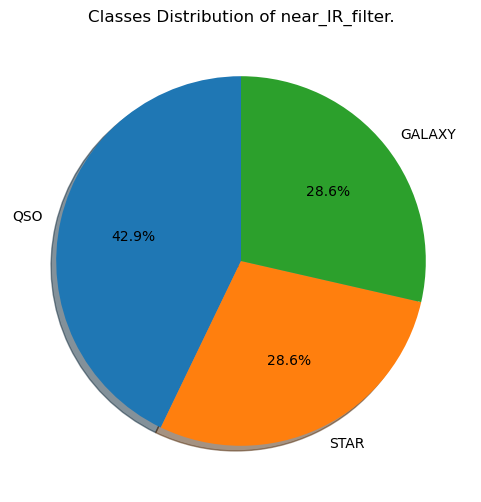

IR_filter outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
14498   84.230172   7.138590   14.15199      10.73097     9.82207        9.469903   9.612333   0.000051    STAR            1              0              0              0
29689  146.345791  24.566331   18.50142      18.51986    20.75484       30.163590  27.673360   1.086811  GALAXY            0              0              0              1
40201   36.908884  -1.982394   20.00673      20.29219    18.54149       17.813190  28.238290   0.593243  GALAXY            0              0              0              1
55524    2.063615  10.823692   19.09952      18.02618    16.74526       16.221250  29.383740   0.625697  GALAXY            0              0              0              1
85950  255.213997  28.549537   20.65719      19.14651    20.99419       29.889210  27.805190   0.144278  GALAXY            0              1              0              0

(6, 13)


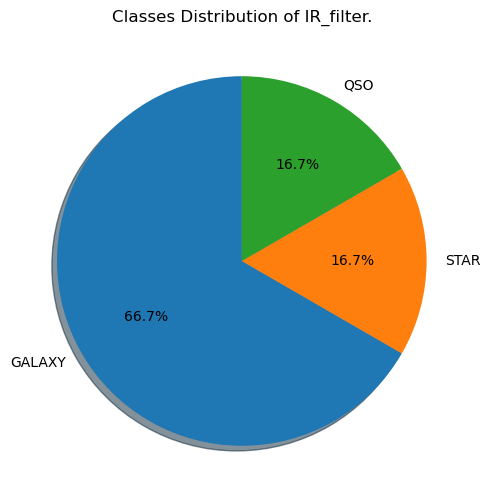

red_shift outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift class  season_Fall  season_Spring  season_Summer  season_Winter
47   228.447728  12.745032   22.36261      21.71060    21.59630        21.60179   21.12727   2.689002   QSO            0              1              0              0
115  185.353726  -2.581337   20.71064      20.22823    19.85220        19.59367   19.34152   2.875383   QSO            0              0              0              1
116  161.751689  -2.308346   24.64835      22.00048    21.63793        21.72727   22.06267   3.892739   QSO            0              0              0              1
161    2.172226  16.196656   21.58020      20.57191    20.39050        20.20049   20.35182   2.897480   QSO            1              0              0              0
209  346.501925  12.663103   22.28893      21.60472    21.37432        21.39408   20.87335   2.701146   QSO            1              0              0              0

(2231, 13)


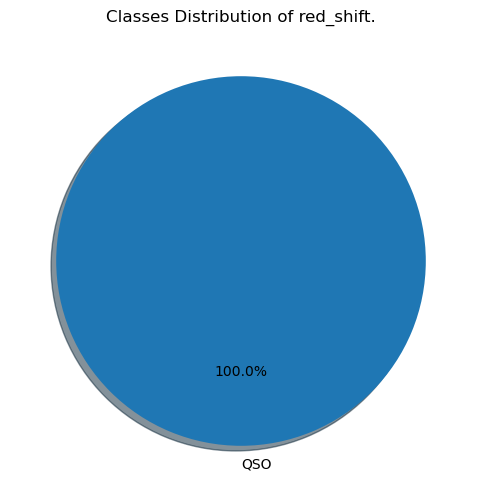

season_Fall outliers:
No outliers were detected for season_Fall.

season_Spring outliers:
No outliers were detected for season_Spring.

season_Summer outliers:


alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift   class  season_Fall  season_Spring  season_Summer  season_Winter
12  345.801874  32.672868   23.17274      20.14496    19.41948        19.22034   18.89359   0.000072    STAR            0              0              1              0
13  331.502030  10.035802   20.82940      18.75091    17.51118        17.01631   16.62772   0.152194  GALAXY            0              0              1              0
24  241.426267  27.224695   18.88323      17.54229    17.01789        16.75376   16.72259   0.032081  GALAXY            0              0              1              0
28  333.311511  -0.376123   20.53324      18.84066    18.05369        17.60397   17.29030   0.091085  GALAXY            0              0              1              0
29  337.093435  -0.311773   20.15491      18.37295    17.31276        16.82294   16.44342   0.148228  GALAXY            0              0              1              0

(9113, 13)


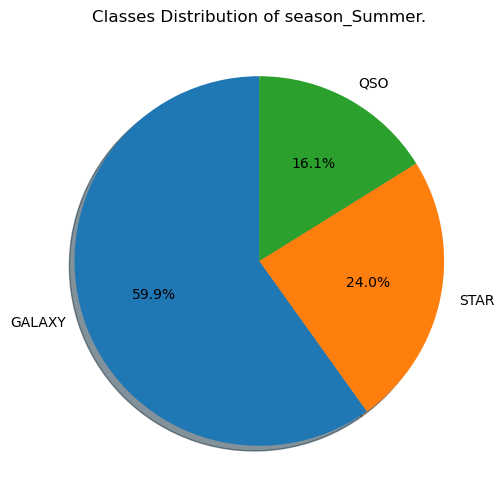

season_Winter outliers:
No outliers were detected for season_Winter.



In [65]:
numerical_cols = df.select_dtypes(exclude=["object"]).columns
for c in numerical_cols:
    print(f"{c} outliers:")
    outliers = getExtremeOutliers(df, c)
    if outliers.empty:
        print(f"No outliers were detected for {c}.\n")
    else:
        display(outliers.head())
        print(outliers.shape)
        outliers['class'].value_counts().plot.pie(
            autopct='%1.1f%%',
            figsize=(6, 6),
            shadow=True,
            startangle=90,
            label='',  
            title=f'Classes Distribution of {c}.'
    )
    plt.show()


Comparing the pie chart of the outlier values of class and the pie chart from the original values of the dataframe, all the pie charts seem to be quite similar except the redshift outlier chart.
Let's analyse.

In [66]:
rs_check=getOutliers(df, "red_shift")
rs_check["class"].value_counts().get("QSO", 0)

np.int64(8955)

In [67]:
rs_check.shape

(8989, 13)

In [68]:
count = 0
for x in df["class"]:
    if x == "QSO":
        count += 1
print(count)

18960


In our outlier analysis function, we noted that 9809 rows of data has QSO as it's final class as an outlier, this suggests that QSO objects have a much greater redshift than Stars or Galaxy

##### <b>Removing Outliers</b> #####

Most of the outliers for red shift in a star belong to the quasar object(QSO) class. So, outliers for red shift do not need to be removed.
Although the outlier values are extreme, they represent true data, capable of affecting the accuracy of the model, hence we will not be removing any outliers for this dataset.

#### <b>Feature Scaling</b> ####

Feature scaling refers to transforming features so they’re on a comparable scale.
The common types of feature scaling include:

- Standardization (mean = 0, std = 1)

- Min-max normalization (range = [0, 1])

- Robust scaling (Scales our data based on our dataset and outliers)

It improves model performance for algorithms sensitive to feature magnitude, such as SVM, logistic regression.
- These machine learning models to the magnitude of feature value.

- Large values can dominate smaller ones leading to <b>Model Distortion</b>

- We need to scale our features before performing PCA and investigating multicolinearity (these functions are heavily impacted on the magnitude of features), we will use <b>Robust Scaling</b> to accommodate our outliers defined in the previous steps.

- Scaling needs to be performed separately on training and testing datasets to prevent model pollution and data leakage.

In [117]:
from sklearn.preprocessing import RobustScaler

##### <b>Robust Scaler</b> #####

In [315]:
season_cols = ["season_Fall", "season_Summer", "season_Winter", "season_Spring"]
target_col = "class"

rb_scaled_cols = df.drop([target_col] + season_cols, axis=1).columns

df_rb_scaled = df.drop(target_col, axis=1)
df_rb_scaled_target = df[target_col]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_rb_scaled, df_rb_scaled_target, test_size=0.2, random_state=3)

scaler = RobustScaler()
X_train_scaled_only = pd.DataFrame(
    scaler.fit_transform(X_train_scaled[rb_scaled_cols]),
    columns=rb_scaled_cols,
    index=X_train_scaled.index
)

X_train_final = pd.concat([X_train_scaled_only, X_train_scaled[season_cols]], axis=1)

X_train_scaled = X_train_final

X_train_scaled

alpha     delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift  season_Fall  season_Summer  season_Winter  season_Spring
21029 -0.389035 -0.053883   1.062371      0.472657    0.292885        0.116903   0.061820   0.310501            0              0              0              1
88931 -0.037065 -0.499524   0.484576      0.581970    0.269593        0.169783   0.102651   0.415782            0              0              1              0
90698 -0.432132 -0.096132   0.408655     -0.275724   -0.543581       -0.549540  -0.589003  -0.123927            1              0              0              0
76281 -0.317341  0.343892  -0.184048      0.097635    0.362894        0.555637   0.737905   2.330472            0              0              1              0
21758 -0.172177 -0.082535  -0.728972     -1.061783   -1.155750       -1.166277  -1.241593  -0.537442            0              0              0              1
...         ...       ...        ...           ...         ...             ...        ...        ...          ...            ...            ...            ...
48067 -0.234988 -0.756483   0.280956      0.343084    0.124959        0.064226   0.027681   0.077541            0              0              1              0
59022 -0.502498 -0.125721   1.023949     -0.116965   -0.370911       -0.381597  -0.458020  -0.155071            1              0              0              0
77060 -0.412654  0.328902  -0.386458     -0.206815   -0.015013        0.024195   0.097126   0.229721            0              0              1              0
67235  1.651675 -0.676193   0.397663      0.144200    0.008255        0.085022   0.096003  -0.232717            1              0              0              0
71541 -1.620701 -0.477299  -0.446567     -0.406445   -0.239112       -0.041752   0.129880  -0.656654            1              0              0              0

[79990 rows x 12 columns]

In [ ]:
# Checking the distribution of the scaled features
X_train_scaled.describe()

alpha         delta     UV_filter  green_filter    red_filter  near_IR_filter     IR_filter     red_shift
count  7.999000e+04  7.999000e+04  79990.000000  7.999000e+04  79990.000000    7.999000e+04  79990.000000  79990.000000
mean  -3.125611e-02  1.352438e-02     -0.030326 -1.486440e-01     -0.165518   -1.208001e-01     -0.095881      0.234485
std    9.071638e-01  5.654062e-01      0.675641  6.459103e-01      0.638170    6.607414e-01      0.718394      1.131832
min   -1.702629e+00 -1.221872e+00     -3.359475 -3.364375e+00     -3.548553   -3.738304e+00     -3.824930     -0.671502
25%   -5.024213e-01 -5.328885e-01     -0.549102 -6.765666e-01     -0.684185   -6.288157e-01     -0.627795     -0.570567
50%    1.337111e-16 -5.115401e-17      0.000000 -5.635399e-16      0.000000    6.681419e-16      0.000000      0.000000
75%    4.975787e-01  4.671115e-01      0.450898  3.234334e-01      0.315815    3.711843e-01      0.372205      0.429433
max    1.684579e+00  1.703604e+00      3.181491  3.330772e+00      3.250490    4.789161e+00      4.224719     10.145659

#### <b>Feature Multicolinearity</b> ####

- Multicolinearity Between Features refers to features haveing <b>high</b> correlation with one another
- Features are supposed to be independent of one another
- Models can capture this relationship, instead of capturing real data

##### <b>Using Variance Inflation Factor(VIF) to calculate multicolinearity</b> #####

- Variance Inflation Factor (VIF) is a machine learning technique that uses linear models to measure the multicolinearity of variables
- 1: No multicollinearity
- 1 – 5: Low to moderate multicollinearity
- More than 5: Potentially concerning
- More than 10: Severe multicollinearity; Action is needed to regulate the multicolinearity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
# Assign ONLY the X_train(scaled) columns to identify VIF 
vif_df = X_train_scaled

In [287]:
vif_df['Constant'] = 1

vif_data = pd.DataFrame()

vif_data["Feature"] = vif_df.columns[:-1]

vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1] - 1)]

display(vif_data)

Feature        VIF
0            alpha   1.144036
1            delta   1.183881
2        UV_filter   4.292140
3     green_filter  18.118668
4       red_filter  41.163809
5   near_IR_filter  41.758973
6        IR_filter  20.836652
7        red_shift   1.382153
8      season_Fall        inf
9    season_Summer        inf
10   season_Winter        inf
11   season_Spring        inf

Multicolinearity Legend:
- VIF =< 5 -> Little colinearity
- VIF > 10 -> High colinearity

- Some of our filter features are highly colinear - to visualize this colinearity I have generated a heatmap 
- To address this multicolinearity, we will use Principle Component Analysis to reduce multicolinearity

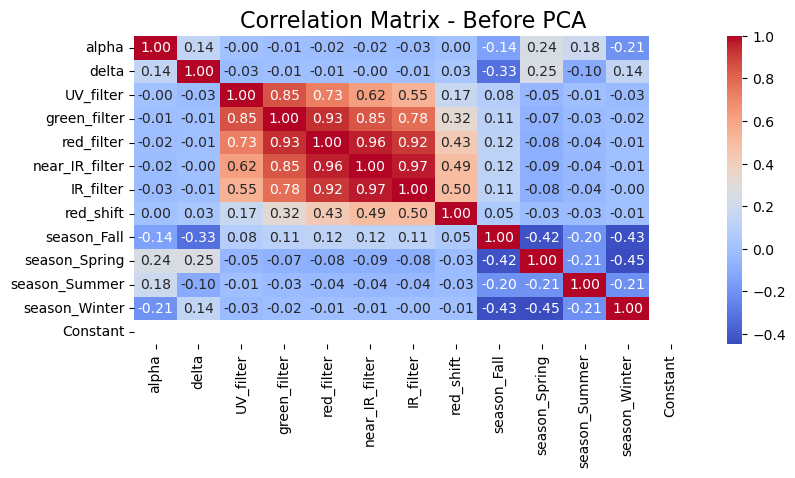

In [78]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

fig = plt.figure(figsize=(9,4))

numCorr = df.select_dtypes(exclude="object").corr()

sns.heatmap(numCorr, cbar=True, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix - Before PCA", fontsize=16)
plt.show()

Analysing The Confusion Matrix
- near_IR_filter and red filter is <b> too correlated </b>to one another (0.96)
- green_filter_uv

Features for PCA:
- green_filter, red_filter, near_IR_filter, IR_filter

##### <b>Performing Principle Component Analysis(PCA) to reduce dimensionality and multicolinearity</b> #####

- PCA refers to Principle Component Analysis
- PCA is a technique used to simpilfy my dataset by transforming related features into a new set of variables called "Principal Components" while preserving as much variance in the new dataset.
- We need to scale our features before performing PCA and investigating multicolinearity, we used standardization to scale features

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import numpy as np

- In my previous step I analysed the Variance Inflation Index of my features, the VIF tells me how related the features are to one another
- PCA works well on features that are highly correlated with one another therefore we are using the features that are highly correlated to one another

In [285]:
# Use features that have a VIF of > 5
pca_vif_selected_rows = vif_df[[
    "UV_filter",
    "green_filter",
    "red_filter",
    "near_IR_filter",
    "IR_filter",
]]

# Display the results
display(pca_vif_selected_rows)

UV_filter  green_filter  red_filter  near_IR_filter  IR_filter
21029   1.062371      0.472657    0.292885        0.116903   0.061820
88931   0.484576      0.581970    0.269593        0.169783   0.102651
90698   0.408655     -0.275724   -0.543581       -0.549540  -0.589003
76281  -0.184048      0.097635    0.362894        0.555637   0.737905
21758  -0.728972     -1.061783   -1.155750       -1.166277  -1.241593
...          ...           ...         ...             ...        ...
48067   0.280956      0.343084    0.124959        0.064226   0.027681
59022   1.023949     -0.116965   -0.370911       -0.381597  -0.458020
77060  -0.386458     -0.206815   -0.015013        0.024195   0.097126
67235   0.397663      0.144200    0.008255        0.085022   0.096003
71541  -0.446567     -0.406445   -0.239112       -0.041752   0.129880

[79990 rows x 5 columns]

In [181]:
pca = PCA()
x_pca = pca.fit(pca_vif_selected_rows)

explained_variance=pca.explained_variance_ratio_

df_variance = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance,
    "Cumulative Variance": np.cumsum(explained_variance)
})

# Formating the variance as percentage
df_variance["Explained Variance (%)"] = df_variance["Explained Variance Ratio"] * 100
df_variance["Cumulative Variance (%)"] = df_variance["Cumulative Variance"] * 100

# Round for display
df_variance = df_variance.round(4)

# Display
display(df_variance)

Principal Component  Explained Variance Ratio  Cumulative Variance  Explained Variance (%)  Cumulative Variance (%)
0                 PC1                    0.8517               0.8517                 85.1670                  85.1670
1                 PC2                    0.1222               0.9739                 12.2191                  97.3861
2                 PC3                    0.0188               0.9926                  1.8778                  99.2638
3                 PC4                    0.0046               0.9973                  0.4625                  99.7263
4                 PC5                    0.0027               1.0000                  0.2737                 100.0000

- Explained variance refers to how much that PCA column contributes to the variance of the dataset
    - PC1 holds 85% of the dataset's variance 
    - PC2 holds 12% of the datset's variance 
- Cummulative variance refers to how the total PCA columns contribute to the variance of the dataset
    - With both PC1 and PC2, the PCA columns holds 97% of the dataset's variance making 2 PCA components an ideal fit for the dataset

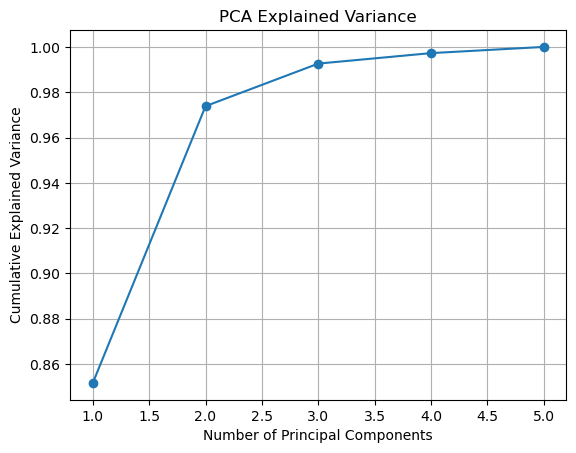

In [182]:
explained = pca.explained_variance_ratio_

cumulative = np.cumsum(explained)

plt.plot(range(1, len(explained)+1), cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

As seen from this graph, keeping 2 principal components would explain most of the variance, 97% while keeping the data structure.

Hence, we are using 2 n components when putting our dataframe through PCA

In [ ]:
# Select filter features only
filter_features = pca_vif_selected_rows
# Since the data has been scaled there is no need to scale it again

# Apply PCA
pca = PCA(n_components=2)  # Choosing 2 n components because it explains 97% of the variance and data structure 
filter_pca = pca.fit_transform(filter_features)

pca_df = pd.DataFrame(filter_pca, columns=['filter_pca1', 'filter_pca2'], index=X_train_scaled.index)
X_train_scaled = pd.concat([X_train_scaled, pca_df], axis=1)

# Drop original values
X_train_scaled = X_train_scaled.drop(columns=['UV_filter','green_filter', 'red_filter', 'near_IR_filter', 'IR_filter'])

In [317]:
X_train_scaled

alpha     delta  red_shift  season_Fall  season_Summer  season_Winter  season_Spring  filter_pca1  filter_pca2
21029 -0.389035 -0.053883   0.310501            0              0              0              1     1.095518     0.811690
88931 -0.037065 -0.499524   0.415782            0              0              1              0     0.952512     0.369102
90698 -0.432132 -0.096132  -0.123927            1              0              0              0    -0.492616     0.706386
76281 -0.317341  0.343892   2.330472            0              0              1              0     1.003048    -0.714017
21758 -0.172177 -0.082535  -0.537442            0              0              0              1    -2.161455     0.189175
...         ...       ...        ...          ...            ...            ...            ...          ...          ...
48067 -0.234988 -0.756483   0.077541            0              0              1              0     0.616575     0.230124
59022 -0.502498 -0.125721  -0.155071            1              0              0              0     0.036435     1.085700
77060 -0.412654  0.328902   0.229721            0              0              1              0     0.063824    -0.439495
67235  1.651675 -0.676193  -0.232717            1              0              0              0     0.562907     0.232995
71541 -1.620701 -0.477299  -0.656654            1              0              0              0    -0.165033    -0.516788

[79990 rows x 9 columns]

X_train_scaled will be the final X_train column used to train and test all subsequent models that require tuned data

Applying scaling and PCA to the test columns also.

In [318]:
# Copying the previously defined scaling methods
X_test_scaled_only = pd.DataFrame(
    scaler.transform(X_test_scaled[rb_scaled_cols]),
    columns=rb_scaled_cols,
    index=X_test_scaled.index
)
X_test_final = pd.concat([X_test_scaled_only, X_test_scaled[season_cols]], axis=1)

X_test_scaled = X_test_final

# Get the filter features from the scaled dataframe
pca_test_rows = X_test_scaled[[
    "UV_filter",
    "green_filter",
    "red_filter",
    "near_IR_filter",
    "IR_filter",
]]

# Apply PCA
pca = PCA(n_components=2)  # Choosing 2 n components because it explains 97% of the variance and data structure 
X_test_pca = pca.fit_transform(pca_test_rows)

X_test_pca_df = pd.DataFrame(X_test_pca, columns=['filter_pca1', 'filter_pca2'], index=X_test_scaled.index)
X_test_scaled = pd.concat([X_test_scaled, X_test_pca_df], axis=1)

# Drop original values
X_test_scaled = X_test_scaled.drop(columns=['UV_filter','green_filter', 'red_filter', 'near_IR_filter', 'IR_filter'])

X_test_scaled

alpha     delta  red_shift  season_Fall  season_Summer  season_Winter  season_Spring  filter_pca1  filter_pca2
92972  1.491503 -0.085462   0.155588            1              0              0              0     0.835226     0.585074
16339  0.417342  0.744310   1.487135            0              0              0              1     0.985394    -0.802419
51564  0.482054 -0.093804  -0.656603            0              0              0              1    -3.157865    -0.417743
45667  1.615201 -0.104295   0.547697            1              0              0              0     1.478585     0.015837
29292 -0.399271 -0.601605  -0.502178            1              0              0              0    -2.000631     0.163350
...         ...       ...        ...          ...            ...            ...            ...          ...          ...
75014 -1.553736 -0.968913   1.031506            1              0              0              0    -1.608917    -0.711365
26360  1.406665  0.652380  -0.656503            0              1              0              0    -1.795692    -0.237272
99452 -0.289155 -0.707743   3.077250            0              0              0              1     0.935725    -0.586358
53287  1.492703 -0.168669  -0.656327            1              0              0              0     0.197121     0.773971
38251  0.522734  0.051363   0.047836            0              0              0              1     0.890777     0.789688

[19998 rows x 9 columns]

## <b> .·:*¨༺  Data Analysis on New Features</b> ##

### <b>Univariate analysis</b> ###

##### <b>Discrete Data</b> #####

Analysing the distribution of seasons - Feature engineered/One-Hot Encoded Variable

#### <b>Numerical Data</b> ####

In [ ]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numerical_cols)

Index(['alpha', 'delta', 'red_shift', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'filter_pca1', 'filter_pca2'], dtype='object')


##### <b>filter PCA 1</b> #####

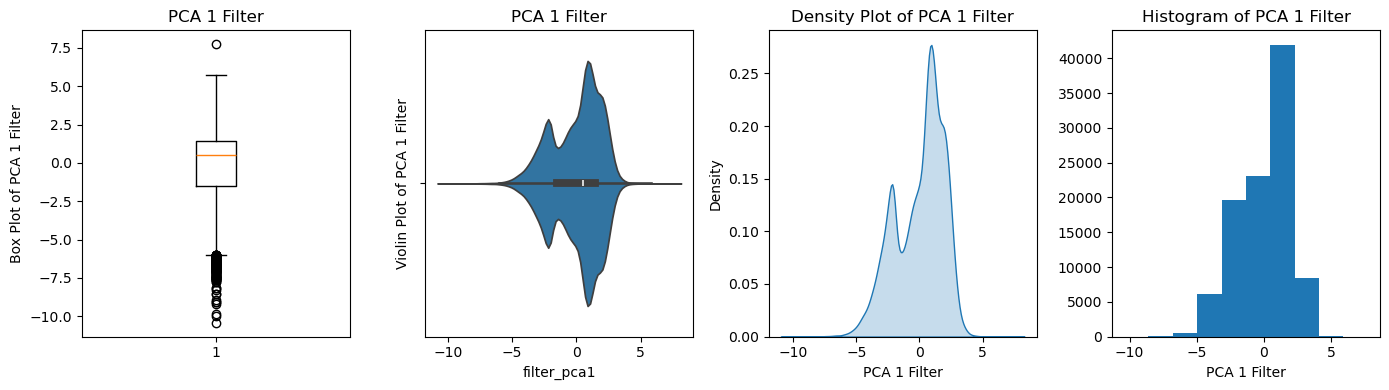

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['filter_pca1'])
axs[0].set_title('PCA 1 Filter')
axs[0].set_ylabel('Box Plot of PCA 1 Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='filter_pca1', data=df,fill=True, ax=axs[1])
axs[1].set_title('PCA 1 Filter')
axs[1].set_ylabel('Violin Plot of PCA 1 Filter')

sns.kdeplot(data=df['filter_pca1'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of PCA 1 Filter')
axs[2].set_xlabel('PCA 1 Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['filter_pca1'])
axs[3].set_title('Histogram of PCA 1 Filter')
axs[3].set_xlabel('PCA 1 Filter')

plt.tight_layout()
plt.show()

##### <b>filter PCA 2</b> #####

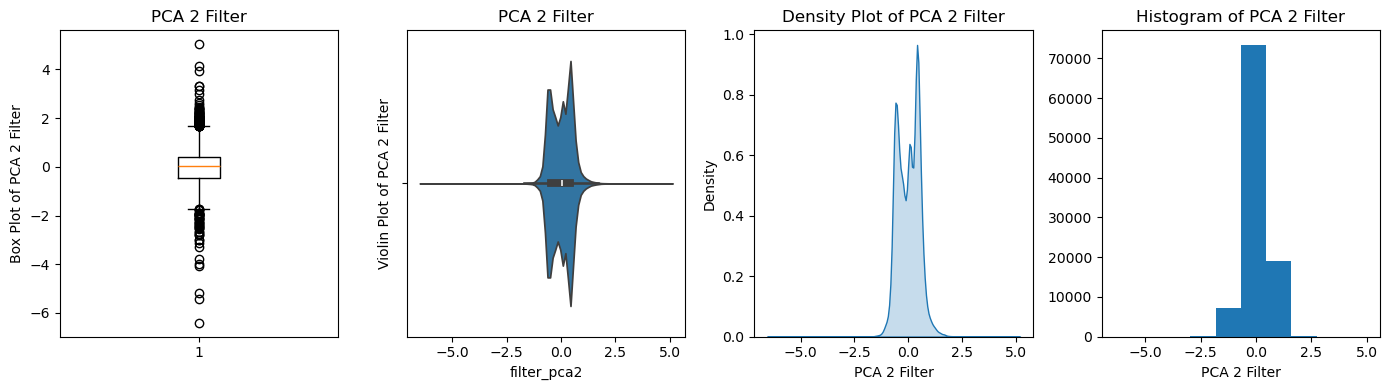

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['filter_pca2'])
axs[0].set_title('PCA 2 Filter')
axs[0].set_ylabel('Box Plot of PCA 2 Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='filter_pca2', data=df,fill=True, ax=axs[1])
axs[1].set_title('PCA 2 Filter')
axs[1].set_ylabel('Violin Plot of PCA 2 Filter')

sns.kdeplot(data=df['filter_pca2'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of PCA 2 Filter')
axs[2].set_xlabel('PCA 2 Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['filter_pca2'])
axs[3].set_title('Histogram of PCA 2 Filter')
axs[3].set_xlabel('PCA 2 Filter')

plt.tight_layout()
plt.show()

### <b>Multivariate analysis</b> ###

##### <b>Scatter Plot - Draw best fit line</b> #####

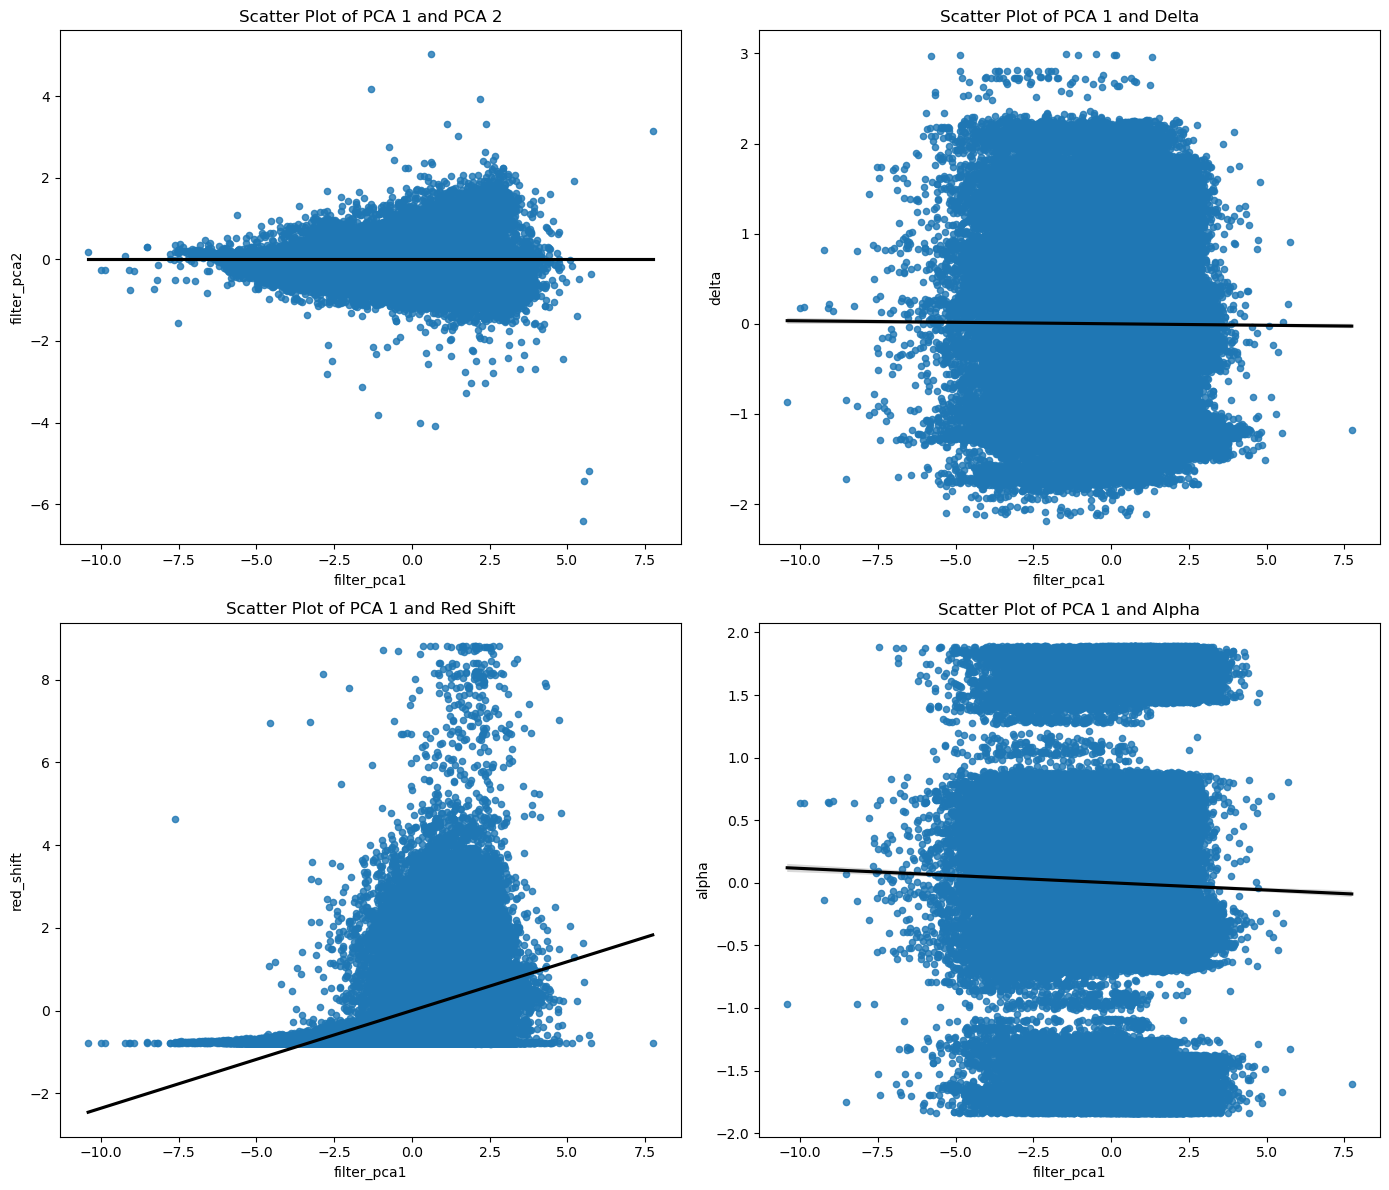

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # 2 row, 2 columns

sns.regplot(data=df, x="filter_pca1", y="filter_pca2", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[0,0])
axs[0,0].set_title("Scatter Plot of PCA 1 and PCA 2")

sns.regplot(data=df, x="filter_pca1", y="delta", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[0,1])
axs[0,1].set_title("Scatter Plot of PCA 1 and Delta")

sns.regplot(data=df, x="filter_pca1", y="red_shift", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[1,0])
axs[1,0].set_title("Scatter Plot of PCA 1 and Red Shift")

sns.regplot(data=df, x="filter_pca1", y="alpha", scatter_kws={"s": 20}, line_kws={"color": "black"}, ax=axs[1,1])
axs[1,1].set_title("Scatter Plot of PCA 1 and Alpha")

plt.tight_layout()
plt.show()

##### <b>Seaborn Pairplot</b> #####

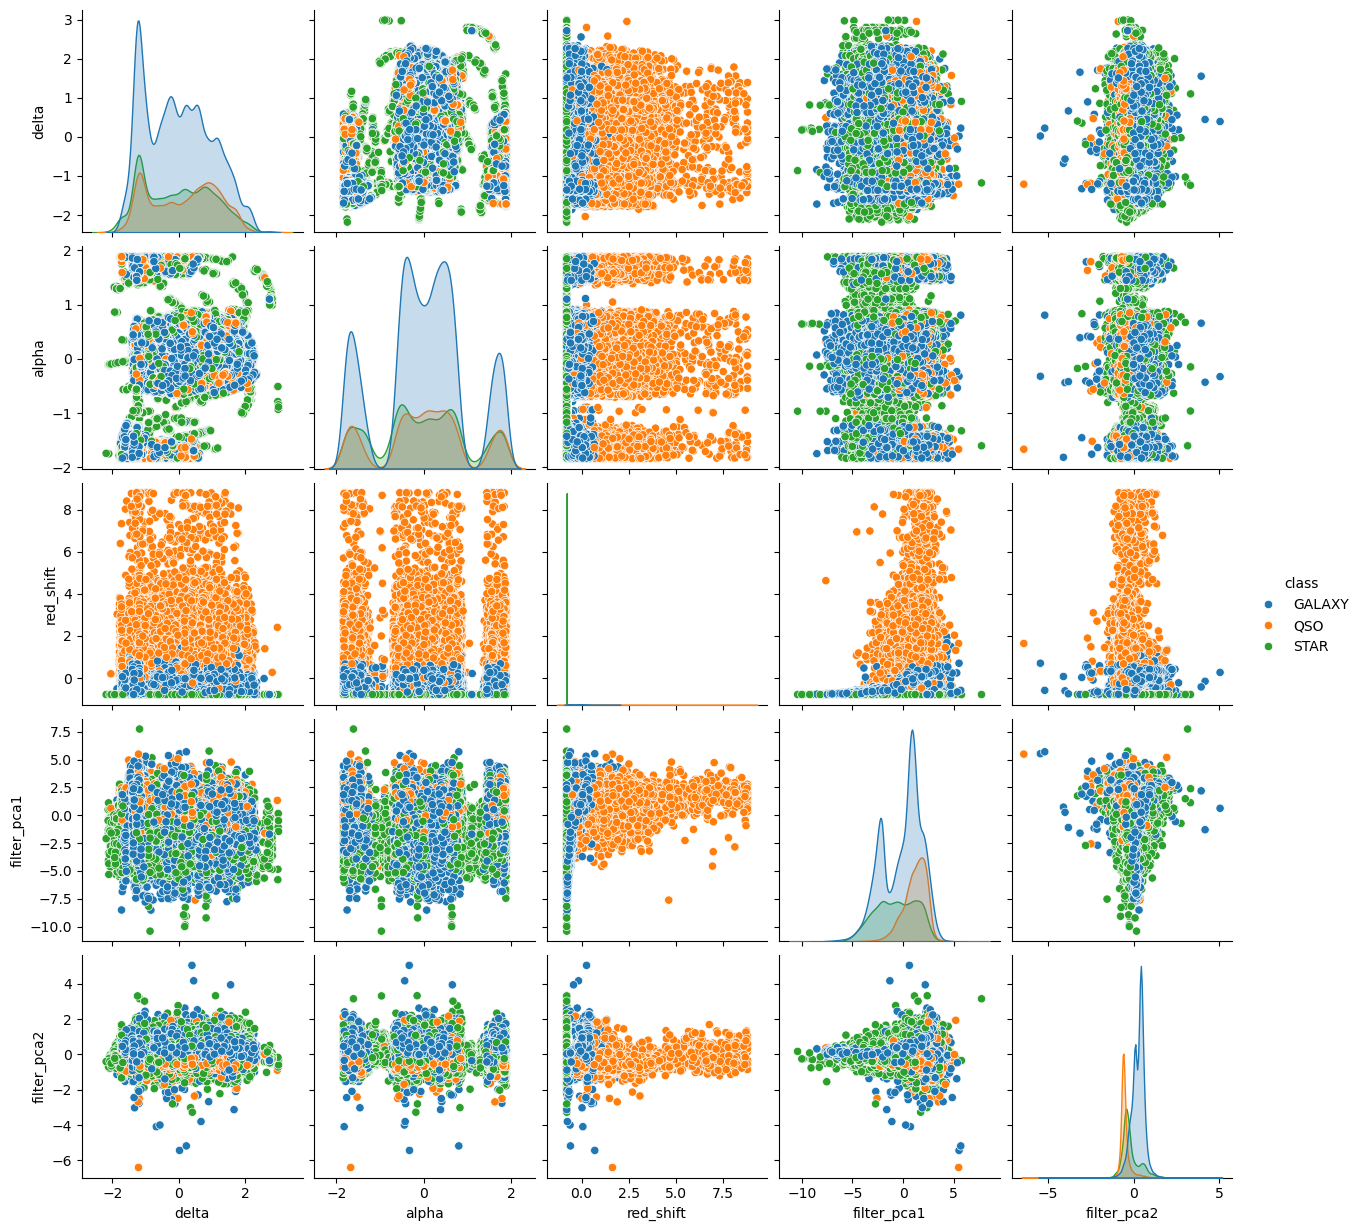

In [ ]:
sns.pairplot(df[['delta', 'alpha', 'red_shift', 'filter_pca1', 'filter_pca2', 'class']], hue='class')

No relationship can be studied from this pairplot, this shows that after PCA the features are not as correlated. These plots have been plotted in previous cells also.

##### <b>Boxplot with New Features</b> #####

C:\Users\alysa\AppData\Local\Temp\ipykernel_18816\1337962909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="red_shift", palette="hls", legend=False, ax=axs[0,0])
C:\Users\alysa\AppData\Local\Temp\ipykernel_18816\1337962909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="delta", palette="hls", legend=False, ax=axs[0,1])
C:\Users\alysa\AppData\Local\Temp\ipykernel_18816\1337962909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="alpha", palette="hls", legend=Fals

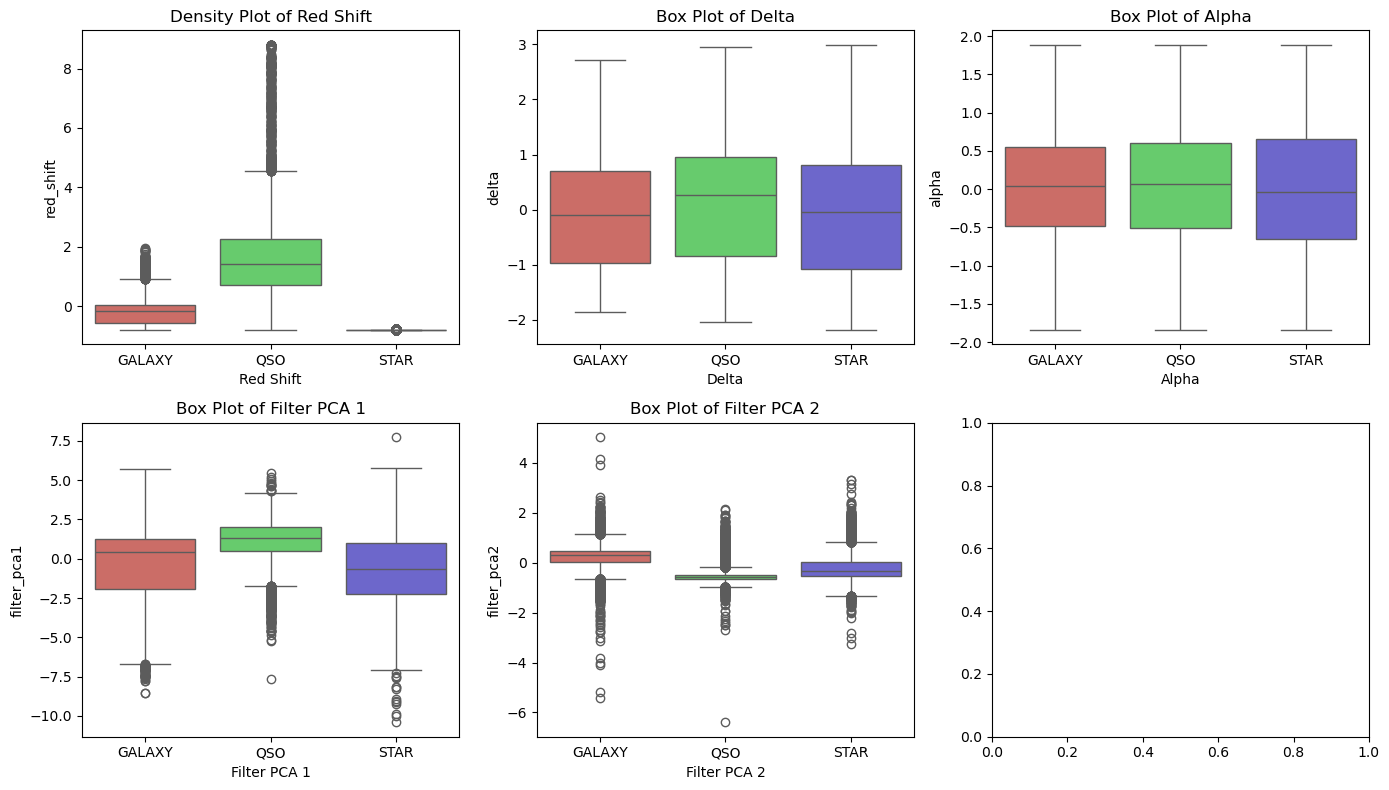

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))  # 1 row, 4 columns
sns.boxplot(data=df, x="class", y="red_shift", palette="hls", legend=False, ax=axs[0,0])
axs[0,0].set_title('Density Plot of Red Shift')
axs[0,0].set_xlabel('Red Shift')

sns.boxplot(data=df, x="class", y="delta", palette="hls", legend=False, ax=axs[0,1])
axs[0,1].set_title('Box Plot of Delta')
axs[0,1].set_xlabel('Delta')

sns.boxplot(data=df, x="class", y="alpha", palette="hls", legend=False, ax=axs[0,2])
axs[0,2].set_title('Box Plot of Alpha')
axs[0,2].set_xlabel('Alpha')

sns.boxplot(data=df, x="class", y="filter_pca1", palette="hls", legend=False, ax=axs[1,0])
axs[1,0].set_title('Box Plot of Filter PCA 1')
axs[1,0].set_xlabel('Filter PCA 1')

sns.boxplot(data=df, x="class", y="filter_pca2", palette="hls", legend=False, ax=axs[1,1])
axs[1,1].set_title('Box Plot of Filter PCA 2')
axs[1,1].set_xlabel('Filter PCA 2')

plt.tight_layout()
plt.show()

As seen from the boxplot:

Red Shift: Although all stellar objects have the same minimum value, Ouasar objects have the largest distribution with the quasar objects recording most of outliers. Star objects have the lowest red shift value, with most star objects having < 0 redshift. Galaxies have an even distributuon of red shift values with values ranging from < 0 to 2



In [ ]:
df.columns

Index(['alpha', 'delta', 'red_shift', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'filter_pca1', 'filter_pca2', 'class'], dtype='object')

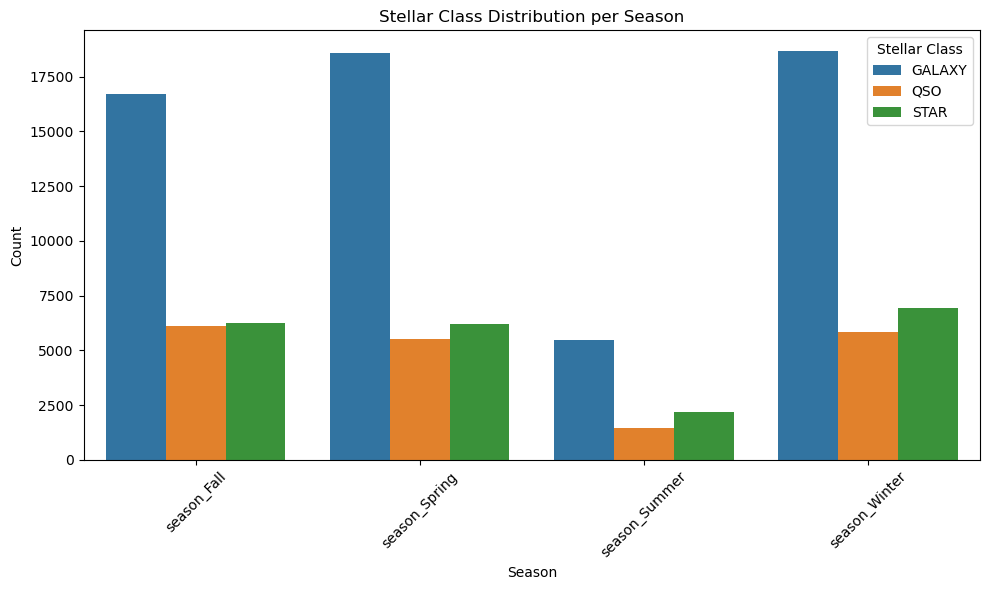

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape from wide to long format
df_melted = df.melt(id_vars='class',
                    value_vars=['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter'],
                    var_name='season', value_name='is_active')

# Keep only rows where the season is active (1)
df_active_season = df_melted[df_melted['is_active'] == 1]

# Plot: count of each stellar class per season
plt.figure(figsize=(10, 6))
sns.countplot(data=df_active_season, x='season', hue='class')
plt.title("Stellar Class Distribution per Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Stellar Class')
plt.tight_layout()
plt.show()

As seen from the Bar Graph: The distribution our target variable(class) for seasons is almost identical, holding no variance between the variables, so the season variables may not impact the prediction of the model much. However, more analysis needs to be done to determine the impact the season variable has on the model.

##### <b>Violin Plot with New Features</b> #####

##### <b>Heatmap</b> #####

Heatmap visualizes the correlation between variables 

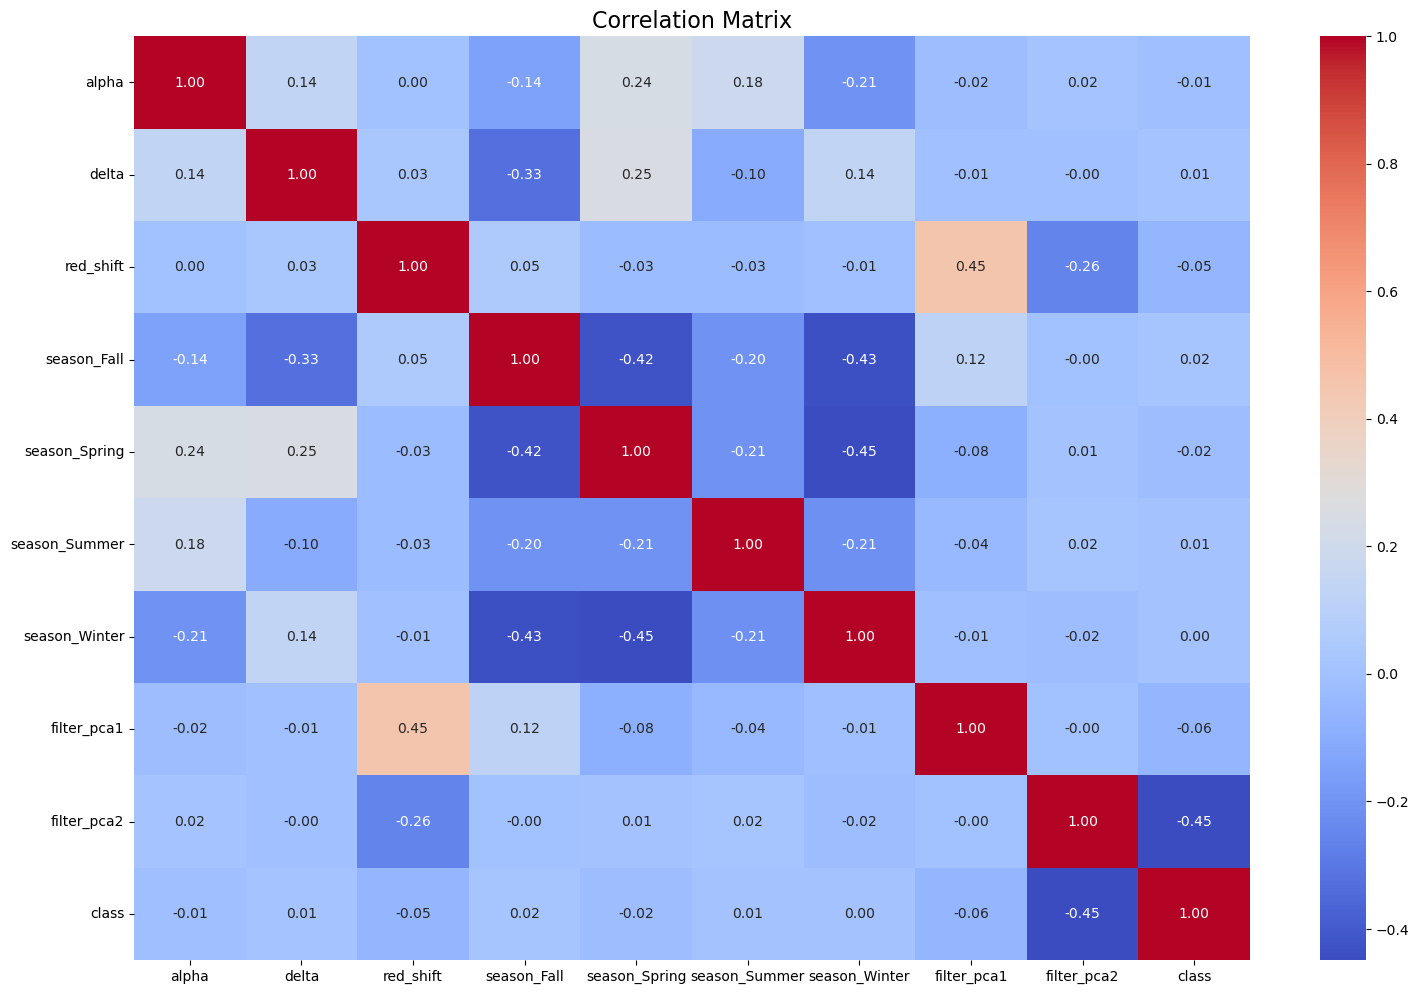

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

fig = plt.figure(figsize=(18,12))
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

numCorr = df.select_dtypes(exclude="object").corr()

sns.heatmap(numCorr, cbar=True, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

- After the dataset undergoes PCA there is no correlation with the variables.

## <b>Model Training ༊*·˚</b> ##

### <b>Defining Imports, Functions and Models</b> ###

In [18]:
from sklearn.model_selection import train_test_split

In [6]:
# Import models and metrics
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [7]:
# Model Dictionary
models = {
    "RandomForestClassifier": {"model": RandomForestClassifier()},
    "HistGradientBoostingClassifier": {"model": HistGradientBoostingClassifier()},
    "GradientBoostingClassifier": {"model": GradientBoostingClassifier()},
    "ExtraTreesClassifier": {"model": ExtraTreesClassifier()},
    "BaggingClassifier": {"model": BaggingClassifier()},
    "DecisionTreeClassifier": {"model": DecisionTreeClassifier()},
    "KNeighborsClassifier": {"model": KNeighborsClassifier()},
    "GaussianNB": {"model": GaussianNB()},
    "SGDClassifier": {"model": SGDClassifier()},
    "SVC": {"model": SVC()},
    "LinearSVC": {"model": LinearSVC()},
    "LogisticRegression": {"model": LogisticRegression()},
    "Perceptron": {"model": Perceptron()},
    "RidgeClassifier": {"model": RidgeClassifier()},
    "RidgeClassifierCV": {"model": RidgeClassifierCV()},
    "PassiveAggressiveClassifier": {"model": PassiveAggressiveClassifier()},
    "BernoulliNB": {"model": BernoulliNB()},
    "ExtraTreeClassifier": {"model": ExtraTreeClassifier()}
}

Why are we training with so many models?
- To determine and cross validate the accuracy of our results and ensure that overfitting/inccorect moelsa re not sued

In [191]:
# Function that trains and evaluates models from my model dictionary with cross validation, accuracy score and f1 score (macro) as metrics

def train_and_evaluate_models(models, X_train, y_train, f1_average="macro", cv=3):
    results = []
    
    for model_name, model_info in models.items():
        # Gets the model information from our model dictionary
        model = model_info["model"]
        
        # Cross-validation using our model
        scores = cross_val_score(model, X_train, y_train, cv=cv)
        mean_score = scores.mean()
        
        # Cross-validation predictions and training
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)
        model.fit(X_train, y_train)
        
        # Accuracy calculation - Compared predicted value(y_train_pred) with our groundtruth(y_train)
        accuracy = accuracy_score(y_train, y_train_pred)

        # F1 score calculation - average of f1 score is defined when function is called (default - macro)
        # Because we have multiclass target, f1 (macro) would be the most appropriate metric as it assigns equal importance to all classes
        f1 = f1_score(y_train, y_train_pred, average=f1_average)
        # Although we are only using F1 score as a metric, other metrics should be considered to validate the accuracy of F1 Score

        # Append results to the list
        results.append({
            "Classifiers": model_name,
            "Crossval Mean Scores": mean_score,
            "Accuracy": accuracy,
            "F1 Score": f1

        })
        
    result_df = pd.DataFrame(results)
    return result_df

### <b>Model Training</b> ###

#### <b>Splitting Data - Tuned Data</b> ####

In [208]:
X_test_scaled

alpha      delta  UV_filter  green_filter  red_filter  near_IR_filter  IR_filter  red_shift  season_Fall  season_Spring  season_Summer  season_Winter  Constant
92972  339.478847  20.682026   24.51686      22.43391    20.65092        19.62363   18.95566   0.526878            1              0              0              0         1
16339  225.316659  49.499879   21.28075      21.41378    20.95743        21.06997   20.85870   1.391160            0              1              0              0         1
51564  232.194311  20.392325   16.82514      15.93806    15.63844        15.51663   15.47553  -0.000300            0              1              0              0         1
45667  352.625502  20.027951   22.82763      24.07575    22.36320        20.78856   19.66230   0.781389            1              0              0              0         1
29292  138.526852   2.756456   19.92463      17.90755    16.93402        16.51937   16.19498   0.099935            1              0              0              0         1
...           ...        ...        ...           ...         ...             ...        ...        ...          ...            ...            ...            ...       ...
75014   15.829934 -10.000084   18.05560      17.95775    17.65703        17.65015   17.69194   1.095420            1              0              0              0         1
26360  330.462212  46.307174   19.18375      17.82713    17.32646        17.07091   16.93789  -0.000235            0              0              1              0         1
99452  150.229991  -0.929703   21.95358      21.12765    20.96447        21.03944   20.43203   2.423274            0              1              0              0         1
53287  339.606386  17.792277   24.73195      20.77018    19.89338        18.75201   18.14527  -0.000121            1              0              0              0         1
38251  236.517755  25.433949   25.69559      21.91633    20.44191        19.61382   19.08581   0.456938            0              1              0              0         1

[19998 rows x 13 columns]

In [319]:
# Assigning new train variables to the ones we are uing to ensure data separation and clarity
X_train_tuned, X_test_tuned, y_train_tuned, y_test_tuned = X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

#### <b>Feature Importance</b> ####

Feature importance refers to machine learning techniques that assign a score to input features based on how useful they are at predicting the target variable in a machine learning model. Calculating feature importance can give insights 

In [320]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X_train_tuned, y_train_tuned)

importances = model.feature_importances_
features = X_train_tuned.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

display(importance_df)

Feature  Importance
2      red_shift    0.689635
8    filter_pca2    0.207855
7    filter_pca1    0.052884
1          delta    0.022674
0          alpha    0.022649
3    season_Fall    0.001268
5  season_Winter    0.001235
6  season_Spring    0.000991
4  season_Summer    0.000809

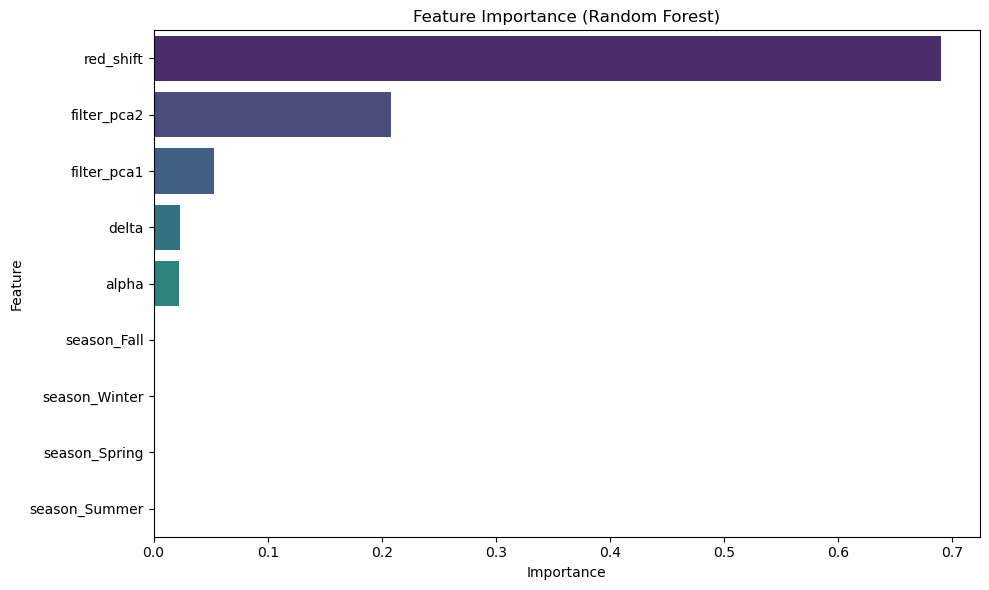

In [322]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=importance_df.sort_values(by='Importance', ascending=False),
    palette='viridis'
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The engineered season columns do not appear to contribute to the accuracy and training of the model, hence we are dropping it to reduce dimensionality.

In [323]:
X_train_scaled = X_train_scaled.drop(["season_Spring", "season_Summer", "season_Fall", "season_Winter"], axis=1)
X_test_scaled = X_test_scaled.drop(["season_Spring", "season_Summer", "season_Fall", "season_Winter"], axis=1)

#### <b>Splitting Data - Final</b> ####

In [324]:
# Train/test split
X_train, X_test, y_train, y_test = X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

#### <b>Training Tuned Model</b> ####

In [192]:
train_result_tuned_df = train_and_evaluate_models(models, X_train, y_train, "macro")
train_result_tuned_df = train_result_tuned_df.sort_values(by=['Crossval Mean Scores','Accuracy', 'F1 Score'], ascending=False)
train_result_tuned_df

Classifiers  Crossval Mean Scores  Accuracy  F1 Score
0           RandomForestClassifier              0.975134  0.975434  0.971212
2       GradientBoostingClassifier              0.974284  0.974284  0.969837
4                BaggingClassifier              0.973559  0.973134  0.968431
1   HistGradientBoostingClassifier              0.973047  0.973984  0.969754
3             ExtraTreesClassifier              0.971546  0.971471  0.967045
5           DecisionTreeClassifier              0.961495  0.961758  0.955818
7                       GaussianNB              0.942668  0.942668  0.934979
17             ExtraTreeClassifier              0.938655  0.936480  0.926962
10                       LinearSVC              0.927616  0.927616  0.919366
11              LogisticRegression              0.872084  0.872084  0.855022
8                    SGDClassifier              0.847581  0.796287  0.775011
13                 RidgeClassifier              0.811777  0.811776  0.760101
14               RidgeClassifierCV              0.811777  0.811776  0.760089
6             KNeighborsClassifier              0.811564  0.811564  0.768644
16                     BernoulliNB              0.783373  0.783373  0.751157
15     PassiveAggressiveClassifier              0.722679  0.683460  0.611283
12                      Perceptron              0.700611  0.700613  0.696290
9                              SVC              0.633929  0.633929  0.368956

In [ ]:
test_result_tuned_df = train_and_evaluate_models(models, X_test_tuned, y_test_tuned, "macro")
test_result_tuned_df = test_result_tuned_df.sort_values(by=['Crossval Mean Scores','Accuracy', 'F1 Score'], ascending=False)
test_result_tuned_df

Classifiers  Crossval Mean Scores  Accuracy  F1 Score
2    GradientBoostingClassifier              0.961427  0.961429  0.955175
0        RandomForestClassifier              0.958564  0.959286  0.952372
4             BaggingClassifier              0.954279  0.953571  0.945625
3          ExtraTreesClassifier              0.950708  0.953571  0.946301
1            AdaBoostClassifier              0.940708  0.940714  0.930272
7                    GaussianNB              0.939998  0.940000  0.931563
5        DecisionTreeClassifier              0.937862  0.938571  0.929754
11           LogisticRegression              0.919994  0.920000  0.909568
10                    LinearSVC              0.909289  0.909286  0.898028
9                           SVC              0.884979  0.885000  0.869583
8                 SGDClassifier              0.884272  0.889286  0.870891
12                   Perceptron              0.874994  0.875000  0.854588
17          ExtraTreeClassifier              0.860691  0.859286  0.840848
15  PassiveAggressiveClassifier              0.837161  0.795714  0.771415
13              RidgeClassifier              0.829999  0.830000  0.790129
14            RidgeClassifierCV              0.827139  0.827143  0.783930
6          KNeighborsClassifier              0.819278  0.819286  0.774798
16                  BernoulliNB              0.772849  0.772857  0.752598

In [329]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

### <b>Metrics</b> ###

Metric Chosen: F1 Score Macro
- F1 Score Macro calculates the accuracy of our model across all classes. We chose F1 Score Macro to evaluate our model because it offers a balanced view of performance across all classes by equally weighing each class’s precision and recall. This is particularly important in our datatset, where we want to measure fair performance on all categories, not just the most frequent ones.

#### <b>Function for Confusion Matrix</b> ####

Function to display a Confusion Matrix, a confusion matrix allows us to analyse the precision, recall and F1 Score across different classes, allowing us to have more concrete justification as to why we chose that model.

In [195]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

def plot_classification_results(y_test, y_pred, title="Classification Results"):

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Get classification report as dictionary
    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
    cr_output_dict = pd.DataFrame(classification_report_dict).transpose()
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot classification report as table
    ax1.axis('tight')
    ax1.axis('off')
    table = ax1.table(cellText=cr_output_dict.values,
                     rowLabels=cr_output_dict.index,
                     colLabels=cr_output_dict.columns,
                     cellLoc='center',
                     loc='center')
    
    # Style the table (no pastel colors)
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    ax1.set_title('Classification Report', fontsize=14, fontweight='bold', pad=20)
    
    # Plot confusion matrix with pastel colors
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax2, cmap='RdPu', values_format='d')  # ax parameter goes in plot() method
    ax2.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

#### <b>Function to Plot Learning Curve</b> ####

The learning curve function in sk learn works by using cross validation to determine the accuracy of each split set. Since we used PCA and scaling in our dataset, the cross validation may result in data leakage, therefore 

In [347]:
X_lc = cleaned_df.drop(["class", "object_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate_ID", "fiber_ID", "MJD"], axis=1)
y_lc = cleaned_df["class"]

Creating a function to plot the learning curve of my models, to understand if the model is overfitted or underfitted.

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve_with_preprocessor(model, X, y, title="Learning Curve", cv=5, 
                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                         figsize=(10, 6), scoring='f1_macro'):
    # Defining my preprocessor; This is key to prevent data leakage
    pca_cols = ["UV_filter", "red_filter", "green_filter", "IR_filter", "near_IR_filter"]
    std_cols = ["delta", "alpha", "red_shift"]
    
    preprocessor = ColumnTransformer(transformers=[
        ('pca', Pipeline([
            ('scaler', RobustScaler()),
            ('pca', PCA(n_components=2))
        ]), pca_cols),
        ('standard', RobustScaler(), std_cols)
    ])
    
    # Create complete pipeline with preprocessor and model
    complete_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Calculate learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        complete_pipeline, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring
    )
    
    # Calculate mean and standard deviation
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Plot training and validation scores with error bands
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                     alpha=0.1, color='red')
    
    # Customize the plot
    plt.xlabel('Training Set Size')
    plt.ylabel(f'Score ({scoring})')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add insights
    if len(train_sizes) > 1:
        final_train_score = train_mean[-1]
        final_val_score = val_mean[-1]
        gap = final_train_score - final_val_score
        
        plt.text(0.02, 0.98, f'Final Training Score: {final_train_score:.3f}\n'
                              f'Final Validation Score: {final_val_score:.3f}\n'
                              f'Gap: {gap:.3f}', 
                 transform=plt.gca().transAxes, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

In [ ]:

# Usage examples:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Example 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
plot_learning_curve_with_preprocessor(rf_model, X, y, title="Random Forest Learning Curve")

# Example 2: SVM
svm_model = SVC(probability=True, random_state=42)
plot_learning_curve_with_preprocessor(svm_model, X, y, title="SVM Learning Curve")

# Example 3: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
plot_learning_curve_with_preprocessor(gb_model, X, y, title="Gradient Boosting Learning Curve")

# Example 4: Logistic Regression
lr_model = LogisticRegression(random_state=42)
plot_learning_curve_with_preprocessor(lr_model, X, y, title="Logistic Regression Learning Curve")

# Example 5: With custom parameters
custom_rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_leaf=10, 
    random_state=42
)
plot_learning_curve_with_preprocessor(
    custom_rf, X, y, 
    title="Custom Random Forest Learning Curve",
    cv=10,
    scoring='f1_macro')

#### <b>Training Top 5 models for in-depth Evaluation </b> ####

##### <b>Random Forest</b> #####

- Accuracy: 0.975
- F1 Score: 0.971

In [325]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

rfc_test_predictions = random_forest_model.predict(X_test)
rfc_train_predictions = random_forest_model.predict(X_train)

rfc_test_accuracy = accuracy_score(y_test, rfc_test_predictions)
rfc_train_accuracy = accuracy_score(y_train, rfc_train_predictions)

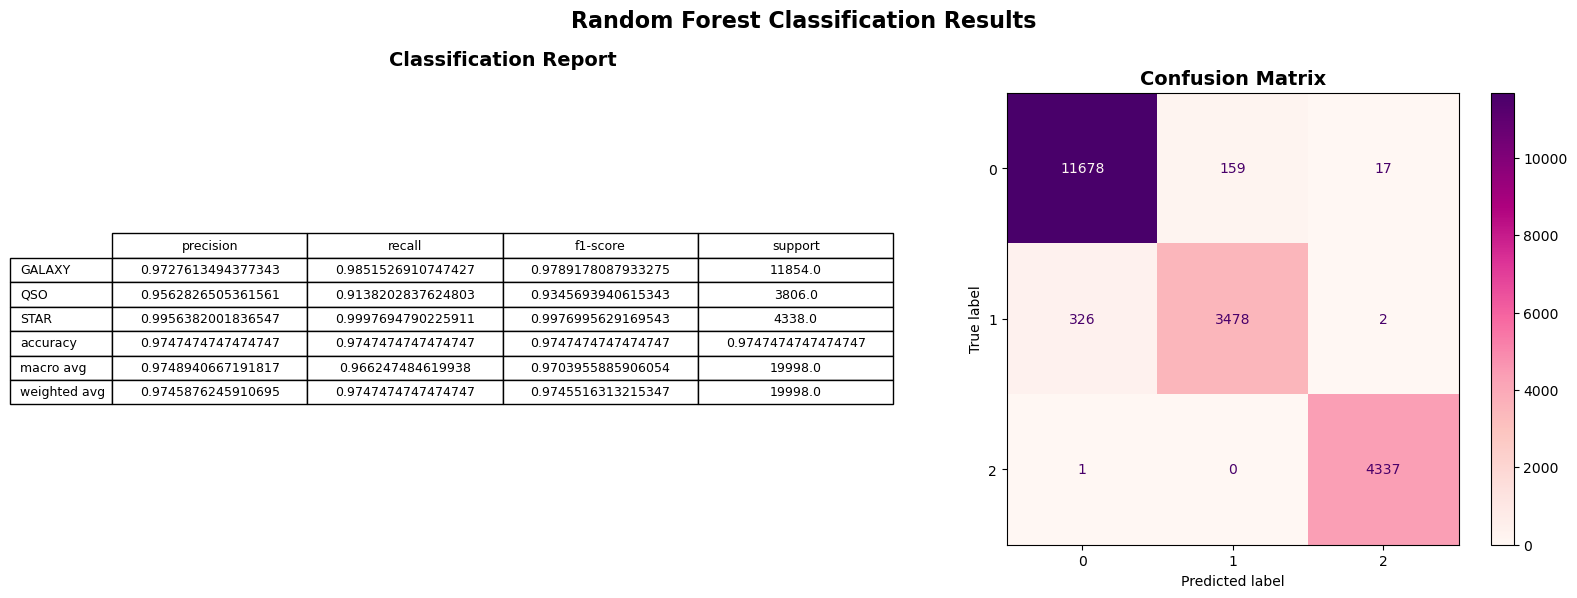

In [326]:
plot_classification_results(y_test, rfc_test_predictions, "Random Forest Classification Results")

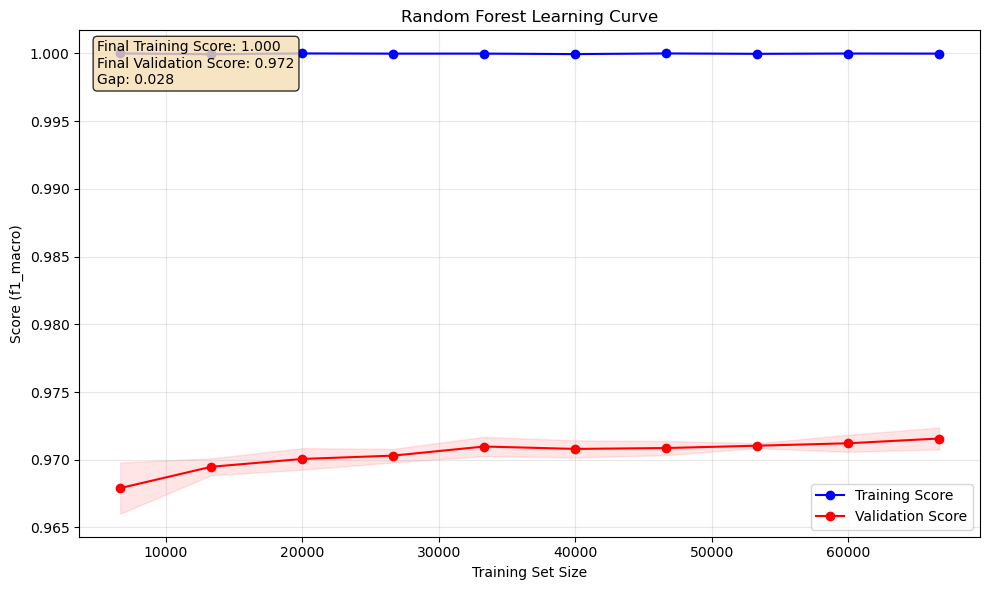

In [ ]:
plot_learning_curve_with_preprocessor(
    random_forest_model, X_lc, y_lc, 
    title="Random Forest Learning Curve",
    cv=3,
    scoring='f1_macro')

##### <b>Gradient Boosting</b> #####

In [333]:
gradient_boosted_model = GradientBoostingClassifier()
gradient_boosted_model.fit(X_train, y_train)

gbt_test_predictions = gradient_boosted_model.predict(X_test)
gbt_train_predictions = gradient_boosted_model.predict(X_train)

gbt_test_accuracy = accuracy_score(y_test, gbt_test_predictions)
gbt_train_accuracy = accuracy_score(y_train, gbt_train_predictions)

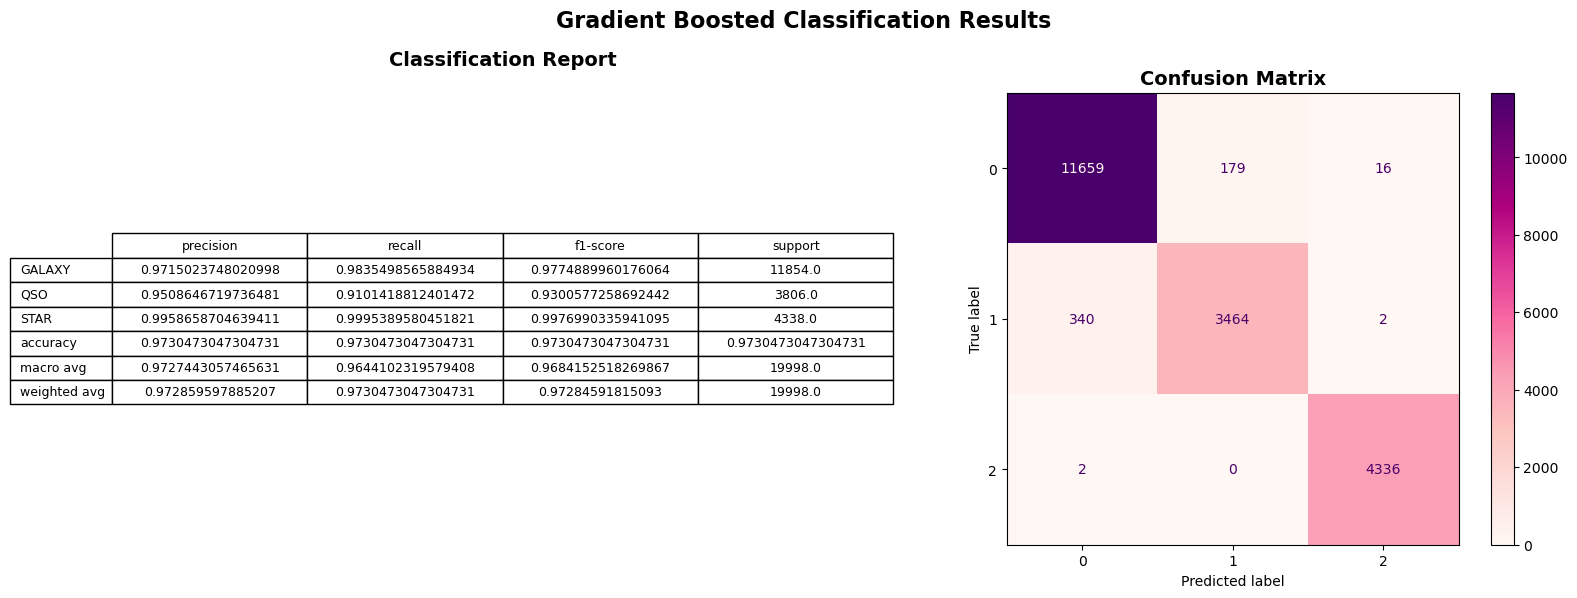

In [334]:
plot_classification_results(y_test, gbt_test_predictions, "Gradient Boosted Classification Results")

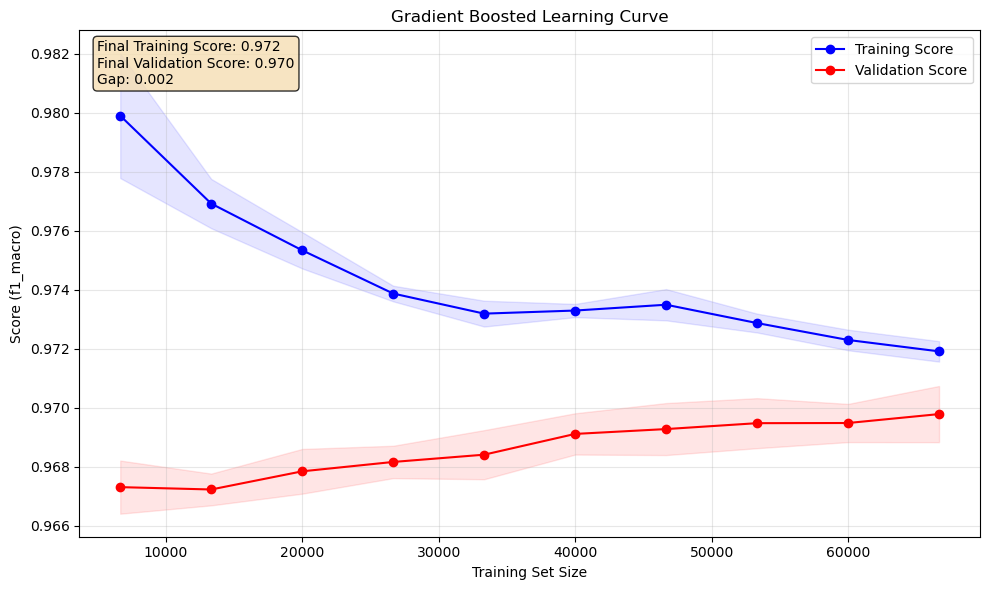

In [351]:
plot_learning_curve_with_preprocessor(
    gradient_boosted_model, X_lc, y_lc, 
    title="Gradient Boosted Learning Curve",
    cv=3,
    scoring='f1_macro')

##### <b>Bagging classifier</b> #####

In [354]:
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)

bagging_test_predictions = bagging_model.predict(X_test)
bagging_train_predictions = bagging_model.predict(X_train)

bagging_test_accuracy = accuracy_score(y_test, bagging_test_predictions)
bagging_train_accuracy = accuracy_score(y_train, bagging_train_predictions)

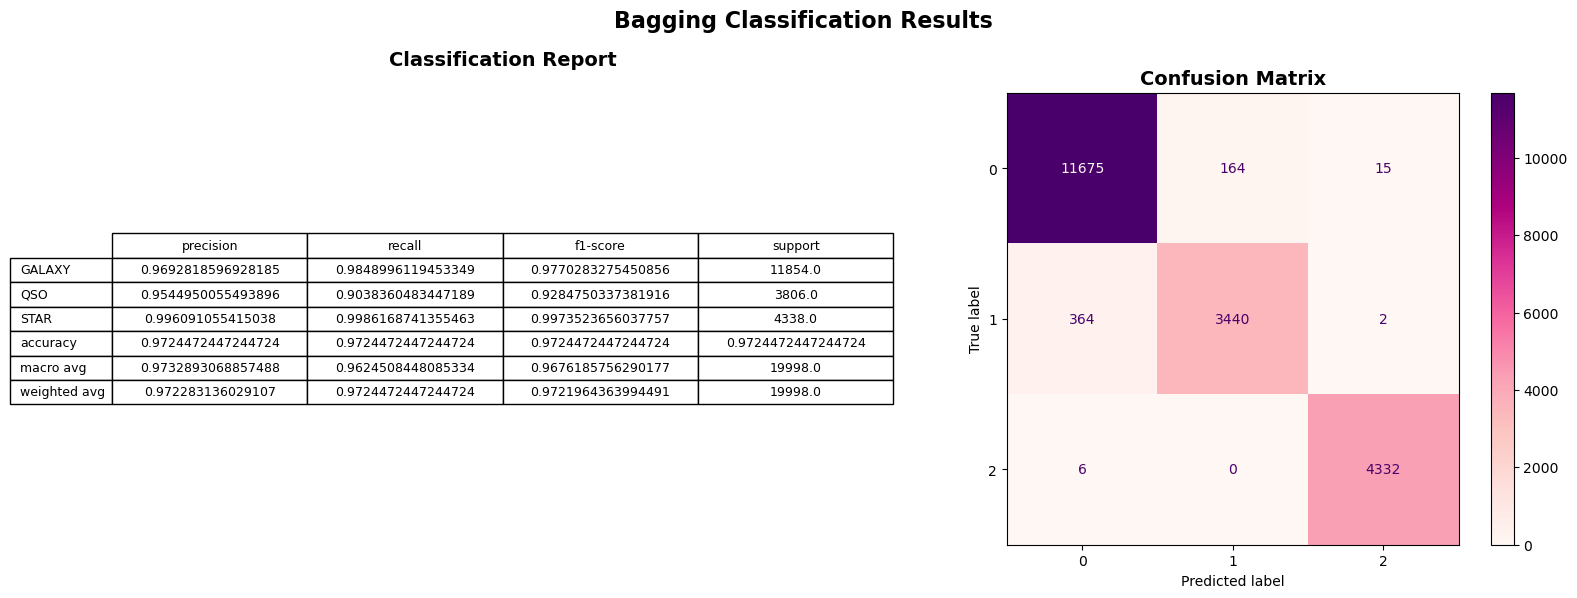

In [355]:
plot_classification_results(y_test, bagging_test_predictions, "Bagging Classification Results")

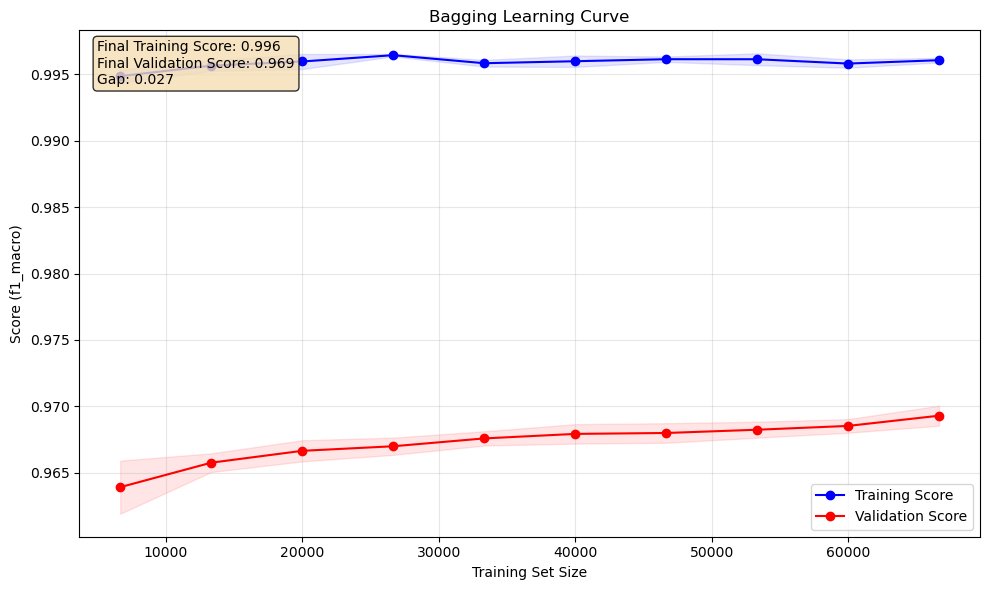

In [356]:
plot_learning_curve_with_preprocessor(
    bagging_model, X_lc, y_lc, 
    title="Bagging Learning Curve",
    cv=3,
    scoring='f1_macro')

##### <b>HistGradientBoosting Classifier</b> #####

In [352]:
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)

hgb_test_predictions = hgb_model.predict(X_test)
hgb_train_predictions = hgb_model.predict(X_train)

hgb_test_accuracy = accuracy_score(y_test, hgb_test_predictions)
hgb_train_accuracy = accuracy_score(y_train, hgb_train_predictions)

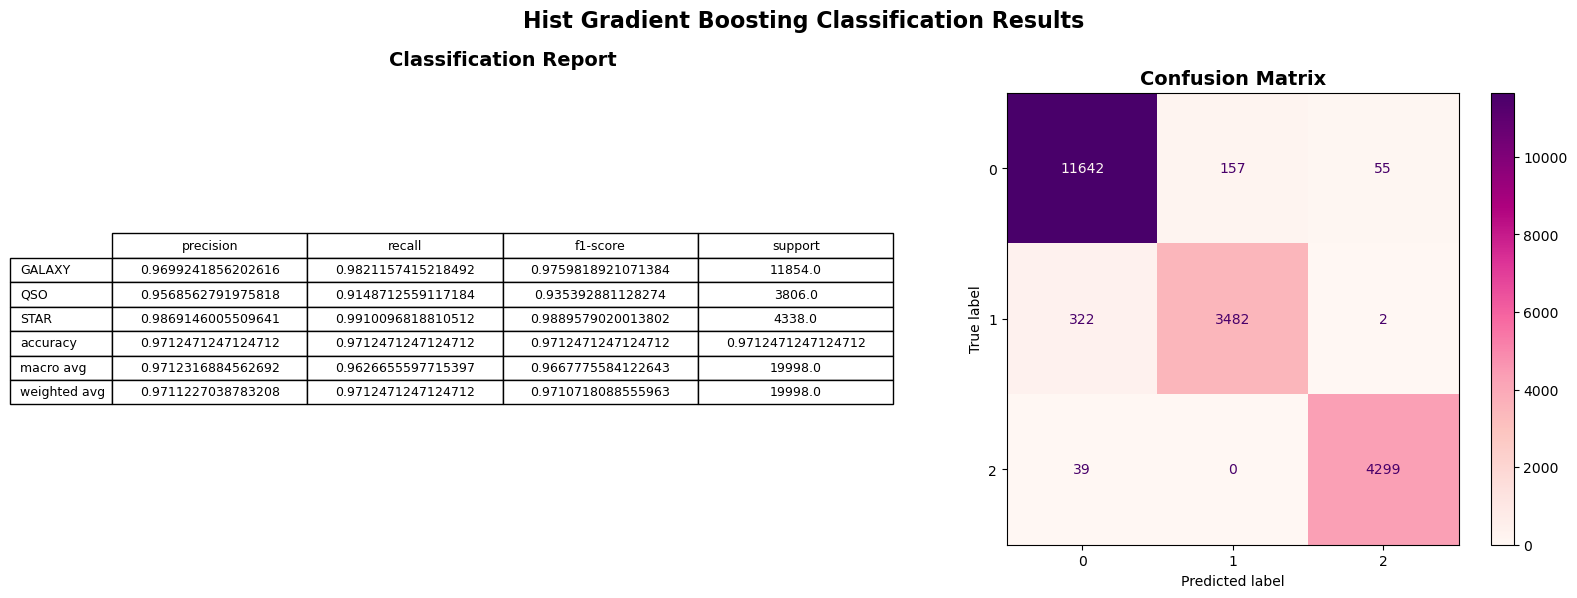

In [353]:
plot_classification_results(y_test, hgb_test_predictions, "Hist Gradient Boosting Classification Results")

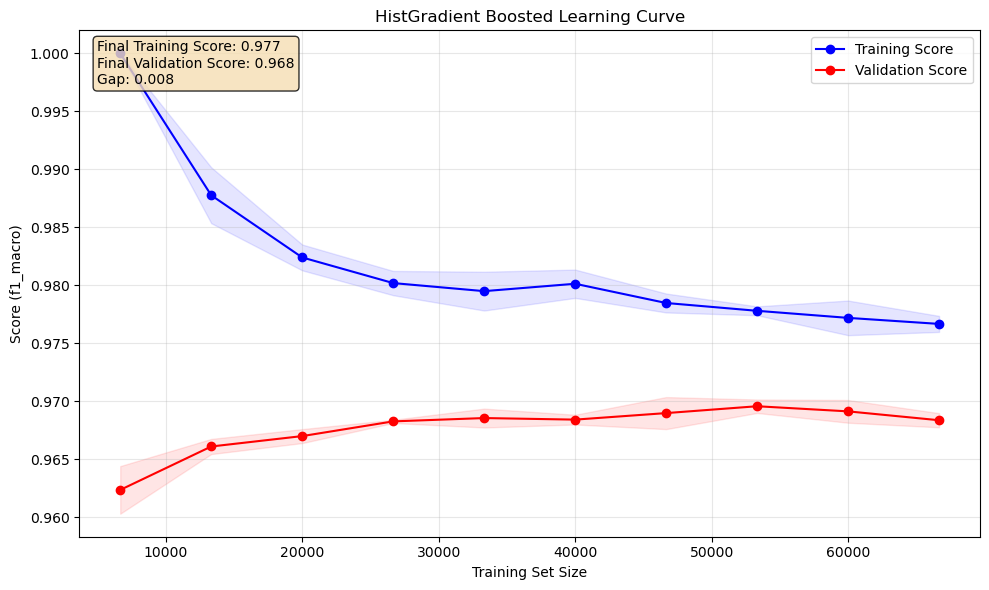

In [357]:
plot_learning_curve_with_preprocessor(
    hgb_model, X_lc, y_lc, 
    title="HistGradient Boosted Learning Curve",
    cv=3,
    scoring='f1_macro')

##### <b>ExtraTrees Classifier</b> #####

In [358]:
et_model = HistGradientBoostingClassifier()
et_model.fit(X_train, y_train)

et_test_predictions = et_model.predict(X_test)
et_train_predictions = et_model.predict(X_train)

et_test_accuracy = accuracy_score(y_test, et_test_predictions)
et_train_accuracy = accuracy_score(y_train, et_train_predictions)

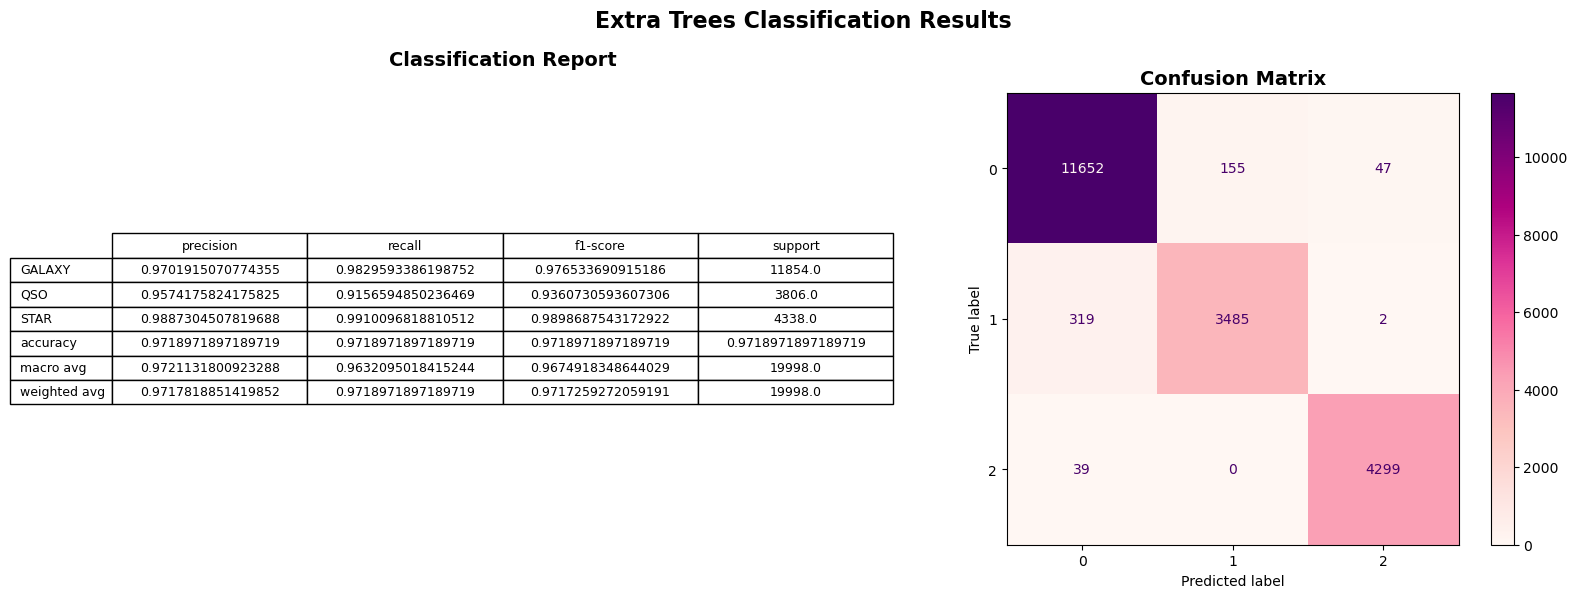

In [359]:
plot_classification_results(y_test, et_test_predictions, "Extra Trees Classification Results")

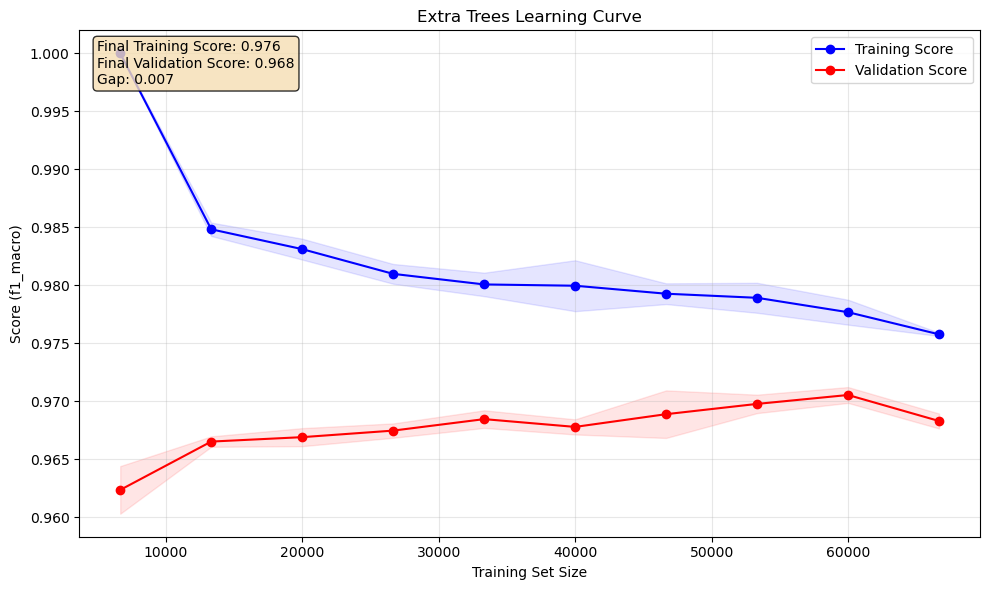

In [360]:
plot_learning_curve_with_preprocessor(
    hgb_model, X_lc, y_lc, 
    title="Extra Trees Learning Curve",
    cv=3,
    scoring='f1_macro')

### <b>Training my final champion model</b> ###

- Although the random forest classifier has the highest F1 Score, the random forest model shows signs of being severely overfitted, as the random forest model may not perform optimally on real world data, I decided to use the Gradient Boosted Tree (F1 Macro - 0.970) which has lesser F1 Macro Accuracy but less overfitting.

In [361]:
champion_model_tuned = RandomForestClassifier()

champion_model_tuned.fit(X_train, y_train)

RandomForestClassifier()

## <b>Model Deployment ╭┈──── ◌ೄ◌ྀ ˊˎ</b> ##

- Our model is trained on cleaned data (data that has been optimised through PCA and feature scaling)
- Feature Scaling and PCA needs to be applied to the user's raw input before loading those input's into the model
- Therefore, I am utilizing a Pipeline to acheive this.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

In [12]:
# Define columns
pca_cols = ["UV_filter", "red_filter", "green_filter", "IR_filter", "near_IR_filter"]
std_cols = ["delta", "alpha","red_shift"]

# Preprocessing: different steps per column group
preprocessor = ColumnTransformer(transformers=[
    ('pca', Pipeline([
        ('scaler', RobustScaler()),
        ('pca', PCA(n_components=2))
    ]), pca_cols),
    ('standard', RobustScaler(), std_cols)
])

# Full Pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    # Default hyperparameters as the model performance did not increase with hyperparameter tuning
    ('model', GradientBoostingClassifier())
])

In [15]:
# Use the original raw values to train our model as the pipeline processes all the data for us

original_df = pd.read_csv(DIR)

In [16]:
original_df.columns

Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter',
       'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD',
       'fiber_ID', 'class'],
      dtype='object')

In [17]:
# Performing base data cleaning
original_df['alpha'] = pd.to_numeric(original_df['alpha'], errors='coerce')
# drop rows with failed conversions
original_df = original_df.dropna(subset=['alpha'])
# drop missing rows
original_df = original_df.dropna()
original_df = original_df[~(original_df == -9999.000000).any(axis=1)]

# Dropping all irrelevant columns
original_df = original_df.drop(['object_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate_ID', 'MJD', 'fiber_ID'], axis =1)

Checking the metrics of our final model.

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Features and target
X_original = original_df.drop(['class'], axis =1)
y_original = original_df["class"]

# Train/test split
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=3)
final_pipeline.fit(X_train_original, y_train_original)

y_pred_original = final_pipeline.predict(X_test_original)

print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("F1 Score Macro:", f1_score(y_test_original, y_pred_original, average="macro"))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.9741974197419742
F1 Score Macro: 0.9693918517576519
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11991
         QSO       0.95      0.91      0.93      3728
        STAR       1.00      1.00      1.00      4279

    accuracy                           0.97     19998
   macro avg       0.97      0.96      0.97     19998
weighted avg       0.97      0.97      0.97     19998



The F1 Score and Accuracy score is on par with our original model, lets export the model.

Exporting the final pipeline

In [20]:
import joblib
joblib.dump(final_pipeline, 'model.pkl')

['model.pkl']

Completed Model Deployment!

## <b>Insights</b> ##

Features
- During data preprocessing, 

Model Training
- The baseline model with all identifier columns have a high

## <b>Appendix ◌ೄ</b> ##

Table of Contents:
1. Basic data cleaning
2. Data sampling - 1 on cleaned data, 1 on tuned data
3. Training Baseline Models
4. Understanding Baseline Models
5. Training Stacking Classifier
6. Training Voting Classifier
7. Tuning Hyperparameters
8. Model testing - Creating data to test my models

### <b>[1] Basic data cleaning</b> ###

#### <b>Sampling Data</b> ####
- Makes models faster to train
- Used to derive base conculsions from dataset without spending too much time on training
- Optimal models and hyperparameters will be used on the final dataset

In [23]:
df.head(100)

object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
0   1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
1   1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
2   1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
3   1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
4   1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   
..           ...          ...        ...        ...           ...         ...   
95  1.240000e+18  348.3358147  25.685581   23.93912      22.92743    21.78178   
96  1.240000e+18  42.04851482  32.466019   21.80150      18.61152    17.18664   
97  1.240000e+18  169.4172365   7.719850   25.08139      22.03635    21.83119   
98  1.240000e+18  243.4989084   4.309792   21.23949      20.39086    20.35097   
99  1.240000e+18  44.37408879   3.017933   25.76758      22.40062    20.49454   

    near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
0         19.16573   18.79371   3606       301        2        79   
1         21.16812   21.61427   4518       301        5       119   
2         19.34857   18.94827   3606       301        2       120   
3         20.50454   19.25010   4192       301        3       214   
4         15.97711   15.54461    NaN       301        3       137   
..             ...        ...    ...       ...      ...       ...   
95        20.69582   19.83773    NaN       301        3       437   
96        16.54847   16.14959   5934       301        4       155   
97        21.71758   21.24758   3841       301        5        31   
98        20.25421   19.90627   3910       301        4       222   
99        19.55738   19.04092   7675       301        6       164   

     spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class  
0   6.540000e+18   0.634794      5812  56354       171  GALAXY  
1   1.180000e+19   0.779136     10445  58158       427  GALAXY  
2   5.150000e+18   0.644195      4576  55592       299  GALAXY  
3   1.030000e+19   0.932346      9149  58039       775  GALAXY  
4   6.890000e+18   0.116123      6121  56187       842  GALAXY  
..           ...        ...       ...    ...       ...     ...  
95  8.680000e+18   0.686254      7705  57332        35  GALAXY  
96  3.610000e+18   0.000037      3210  54876       173    STAR  
97  6.050000e+18   0.000266      5369  56272       422    STAR  
98  5.410000e+18   2.290692      4807  55687       940     QSO  
99  4.790000e+18   0.524215      4257  55480       889  GALAXY  

[100 rows x 18 columns]

##### <b>Sampled Data for Cleaned Data</b> #####

In [92]:
df_sample_cleaned = cleaned_df.sample(15000, random_state=2)
df_sample_cleaned

# Features and target
X_sample = df_sample_cleaned.drop(["class"], axis=1).to_numpy()
y_sample = df_sample_cleaned["class"].to_numpy()

# Train/test split
X_train_sample_cleaned, X_test_sample_cleaned, y_train_sample_cleaned, y_test_sample_cleaned = train_test_split(X_sample, y_sample, test_size=0.2, random_state=3)

##### <b>Sampled Data for Tuned Data</b> #####

In [93]:
df_sample_tuned = df.sample(15000, random_state=2)
df_sample_tuned

# Features and target
X_sample = df_sample_tuned.drop(["class"], axis=1).to_numpy()
y_sample = df_sample_tuned["class"].to_numpy()

# Train/test split
X_train_sample_tuned, X_test_sample_tuned, y_train_sample_tuned, y_test_sample_tuned = train_test_split(X_sample, y_sample, test_size=0.2, random_state=3)

### <b>[2] Training Baseline Models</b> ###

#### <b>Data Splitting</b> ####

In [199]:
# Features and target, used the cleaned dataset instead of the tuned one
X_cleaned = cleaned_df.drop(["class"], axis=1).to_numpy()
y_cleaned = cleaned_df["class"].to_numpy()

# Train/test split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=3)

#### <b>No Removal of Columns</b> ####

- Training the model on untuned, non PCAed columns and dataset with identifier columns. This is done to cross check and cross validate between the tuned data and the uncleaned data.

In [200]:
train_cleaned_result_df = train_and_evaluate_models(models, X_train_cleaned, y_train_cleaned, "macro")
train_cleaned_result_df = train_cleaned_result_df.sort_values(by=['Crossval Mean Scores','Accuracy', 'F1 Score'], ascending=False)
train_cleaned_result_df

Classifiers  Crossval Mean Scores  Accuracy  F1 Score
0           RandomForestClassifier              0.977410  0.977822  0.974241
4                BaggingClassifier              0.977210  0.977397  0.973527
1   HistGradientBoostingClassifier              0.976572  0.976060  0.972315
2       GradientBoostingClassifier              0.976485  0.976460  0.972371
3             ExtraTreesClassifier              0.970996  0.971096  0.966834
5           DecisionTreeClassifier              0.964633  0.964721  0.959395
17             ExtraTreeClassifier              0.929691  0.904301  0.888313
13                 RidgeClassifier              0.842443  0.842443  0.808822
16                     BernoulliNB              0.726853  0.726853  0.525849
6             KNeighborsClassifier              0.669284  0.669284  0.558138
7                       GaussianNB              0.602463  0.602463  0.314353
11              LogisticRegression              0.602463  0.602463  0.314353
10                       LinearSVC              0.594774  0.594774  0.250524
9                              SVC              0.594737  0.594737  0.252753
12                      Perceptron              0.518776  0.518777  0.333876
8                    SGDClassifier              0.440353  0.346606  0.322975
15     PassiveAggressiveClassifier              0.413075  0.439030  0.363488
14               RidgeClassifierCV              0.370621  0.370621  0.275212

The F1 Score of the model is much higher compared to the model trained on the tuned data, this could be due to data leakage.

In [201]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X_train_cleaned, y_train_cleaned)

importances = model.feature_importances_
features = cleaned_df.drop(["class"], axis=1).columns

importance_df_cleaned = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df_cleaned.sort_values(by='Importance', ascending=False, inplace=True)

display(importance_df_cleaned)

Feature  Importance
13       red_shift    0.569147
7        IR_filter    0.079889
4     green_filter    0.068310
3        UV_filter    0.059952
6   near_IR_filter    0.055428
5       red_filter    0.038067
14        plate_ID    0.033361
12     spec_obj_ID    0.028123
15             MJD    0.026787
1            alpha    0.009448
2            delta    0.009318
8           run_ID    0.007512
16        fiber_ID    0.006192
11        field_ID    0.005928
10         cam_col    0.002537
0        object_ID    0.000000
9         rerun_ID    0.000000

Analysing the importance of the model trained on our cleaned dataset, we can determine that identifier columns spec_obj_ID, plate_ID and MJD play a big role in training the model.

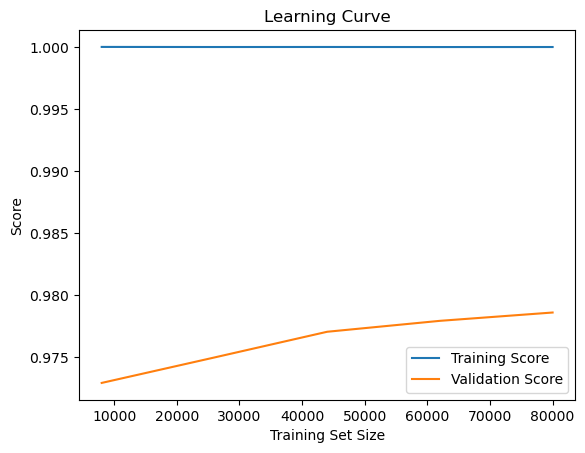

In [202]:
random_forest_model_cleaned = RandomForestClassifier()
random_forest_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

train_sizes, train_scores, val_scores = learning_curve(random_forest_model_cleaned, X_cleaned, y_cleaned, cv=5)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, val_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

As seen from the learning curve of the model with our cleaned data, with the identifier columns included in model training, the model is <b>very overfitted</b>, to reduce overfitting, we should consider removing these identifier columns.

#### <b>Removal of Identifier Columns</b> ####

In [106]:
# Columns to test removal
sensitive_cols = ['plate_ID', 'MJD', 'spec_obj_ID', 'class']

# Target column
target = 'class'
feature_cols = cleaned_df.columns.drop(sensitive_cols).tolist()
# Define models
baseline_importance_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Track results
results_baseline_importance = []

X = cleaned_df[feature_cols]
y = cleaned_df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in baseline_importance_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1_bs_impt = f1_score(y_test, y_pred, average="macro")

    # Store result
    results_baseline_importance.append({
        'Model': model_name,
        'Accuracy': acc,
        "F1 Score(Macro)" : f1_bs_impt
    })

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results_baseline_importance)
display(results_df.sort_values(by=['Accuracy'], ascending=False))

Model  Accuracy  F1 Score(Macro)
0      RandomForest  0.975298         0.971123
1           Bagging  0.975148         0.970763
2  GradientBoosting  0.973797         0.969139

### <b>[3] Partial Removal of Identifier Columns that have the greatest feature importance</b>

Let's see how removing the columns plate_ID, MJD and spec_obj_ID would affect my model, we will be using the top 3 models (randomForest, bagging and gradient boosting) to quantify the impact.

In [107]:
# Target column
target = 'class'
feature_cols = cleaned_df.columns.drop(target).tolist()

# Columns to test removal
sensitive_cols = ['plate_ID', 'MJD', 'spec_obj_ID']

# Define models
baseline_importance_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Track results
results_baseline_importance = []

# Loop through each combination where one sensitive column is removed
from itertools import combinations

# Get all 2-column combinations to KEEP
keep_combinations = list(combinations(sensitive_cols, 2))

for keep_cols in keep_combinations:
    # Determine which column to remove
    remove_col = list(set(sensitive_cols) - set(keep_cols))[0]
    
    # Create feature set
    current_features = [col for col in feature_cols if col != remove_col]
    X = cleaned_df[current_features]
    y = cleaned_df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in baseline_importance_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1_bs_impt = f1_score(y_test, y_pred, average="macro")

        # Store result
        results_baseline_importance.append({
            'Removed Column': remove_col,
            'Model': model_name,
            'Accuracy': acc,
            "F1 Score(Macro)" : f1_bs_impt
        })

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results_baseline_importance)
display(results_df.sort_values(by=['Removed Column', 'Model']))

Removed Column             Model  Accuracy  F1 Score(Macro)
4            MJD           Bagging  0.975748         0.971479
5            MJD  GradientBoosting  0.974997         0.970527
3            MJD      RandomForest  0.976698         0.972710
7       plate_ID           Bagging  0.976048         0.971883
8       plate_ID  GradientBoosting  0.974747         0.970250
6       plate_ID      RandomForest  0.976198         0.972182
1    spec_obj_ID           Bagging  0.975998         0.971801
2    spec_obj_ID  GradientBoosting  0.974897         0.970429
0    spec_obj_ID      RandomForest  0.976998         0.973082

<b>Summary of Appendix [3]:</b>

In the baseline model, the model performance is on par with our tuned model increased with identifier columns, this could be because of <b>Data Leakage</b>.

Top 3 notable identifier features contributing to model training are spec_obj_ID, MJD and plate_ID.

When studying the data dictionary, all data from Identifier columns are only applicable to data collected by the Solan Digital Sky Survery (SDSS). Furthermore, graphs in our data exploration support the fact that identifier columns such as "plate_ID", "spec_obj_ID" have a strong relationship with our target class.

Comparing our learning curves for the dataset with identifier columns and the dataset with no identifier columns, we can see that the dataset that holds identifier columns is overfitted which further proves our point that including identifier columns results in severe data leakage, heavily impacting the accuracy and legitimacy of our model. Therefore, we should remove/drop these columns for an accurate and robust model.

### <b>[4] Hyperparameter Tuning </b> ###

- Training hyperparameters on final split data instead of sample data because training hyperparameters with all 100k rows allows for the highest accuracy and alignment with tuned training

- We are only training hyperparameters on the top 3 models, because the F1 score for models not in the top 3 is not high enough, even if the hyperparameters for these models are tuned, the accuracy may not be as great as the top 3 models with their default parameters. 

#### <b>Training Hyperparameters</b> ####

<b>RandomForest</b>:
- n_estimators: 100-200 is usually sufficient; diminishing returns beyond 200
- max_depth: 10, 20, and None cover underfitting, balanced, and full depth scenarios
- min_samples_split: 2 (default) vs 10 (more conservative) - most impactful for regularization

<b>GradientBoosting</b>:
- n_estimators: 100-200 is standard range for boosting
- max_depth: 3-10 range is optimal (boosted trees should be shallow)
- learning_rate: 0.1-0.3 is the sweet spot (lower = more stable, higher = faster convergence)

<b>Bagging</b>:
- n_estimators: 100-200 provides good ensemble diversity
- max_samples: 0.5-0.8 balances diversity with sample size (avoiding 1.0 prevents overfitting)

In [ ]:
#Defining Classifiers and Parameters
hyperparamters = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 200],  
        'max_depth': [10, 20, None],  # Key for preventing overfitting vs underfitting
        'min_samples_split': [2, 10] 
    }),

    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': [100, 200], 
        'max_depth': [3, 6, 10],     # Shallow trees work better for boosting
        'learning_rate': [0.1, 0.3] 
    }),

    'Bagging': (BaggingClassifier(), {
        'n_estimators': [100, 200],  # Ensemble size
        'max_samples': [0.5, 0.8]    # Fraction of samples for each estimator
    }),
}

Using GridSearch to find hyperparameters:
- Although GridSearch is more conputationally expensive, GridSearch can more accurately find the hyperparameters that have the highest accuracy therefore, I have chosen to use GridSearch to find the best hyperparameters. 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best_results = {}

for name, (model, param_grid) in hyperparamters.items():
    print(f"Running search for: {name}")
    
    search = GridSearchCV(model, param_grid, scoring=['accuracy', 'f1_macro'], cv=3, n_jobs=-1, refit="f1_macro")
    
    search.fit(X_train, y_train) # Run with final data split
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred)
    f1_macro_tuned = f1_score(y_test, y_pred, average="macro")
    
    best_results[name] = {
        'best_params': search.best_params_,
        'best_cv_score': search.best_score_,
        'test_accuracy': accuracy_tuned,
        'f1_macro' : f1_macro_tuned,
    }
    print(f"Best Hyperparameters for {name} model: {best_results[name].get("best_params")}")
    print(f"Accuracy for {name} model: {best_results[name].get("test_accuracy")}")
    print(f"F1 Score (Macro) for {name} model: {best_results[name].get("f1_macro")}\n")

data = []
for name, result in best_results.items():
    data.append({
        "Model": name,
        "Best Hyperparameters": result.get("best_params"),
        "Best Cross Validation Score": result.get("best_cv_score"),
        "Test Accuracy": result.get("test_accuracy"),
        "F1 Score(macro)" : result.get("f1_macro")
    })

# Convert to DataFrame
hyperparameters_df = pd.DataFrame(data)

display(hyperparameters_df)

Running search for: RandomForest
Best Hyperparameters for RandomForest model: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for RandomForest model: 0.9752975297529753
F1 Score (Macro) for RandomForest model: 0.971074202435172

Running search for: GradientBoosting
Best Hyperparameters for GradientBoosting model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy for GradientBoosting model: 0.9735473547354736
F1 Score (Macro) for GradientBoosting model: 0.96903765975064

Running search for: Bagging
Best Hyperparameters for Bagging model: {'max_samples': 0.5, 'n_estimators': 100}
Accuracy for Bagging model: 0.9745974597459746
F1 Score (Macro) for Bagging model: 0.9702642883489836



We are using <b>F1 Score Macro</b> as the main comparison metric with accuracy score as a backup justifier. If F1 Score is high, the accuracy score needs to be as high or higher than the F1 Score.

### <b>Exploring Ensemble Learning Methods</b> ###

To increase my accuracy for my models, we are experimenting with ensemble learning methods such as stacking and voting. These ensemble learning methods improve model performance by combining the strengths of multiple models, reducing individual model weaknesses such as overfitting, underfitting, or bias.

### <b>[5] Training Voting Models</b> ###

Voting Classifier Models:
- Combines the predictions of multiple models (e.g., SVM, Random Forest, Logistic Regression). If one model misclassifies a sample, others may correct it, the voting classifier works best when models are diverse so not all of them makes the same mistakes.

In [96]:
from sklearn.ensemble import VotingClassifier
 
voting_classifier = VotingClassifier(
    estimators=[
    ('Random Forest', RandomForestClassifier()),
    ('SVC', SVC(probability=True)),
    ('GaussianNB', GaussianNB())
    ],
    voting='soft'
)
voting_classifier.fit(X_train_sample_tuned, y_train_sample_tuned)

# Train and predict
y_pred_voting = voting_classifier.predict(X_test_sample_tuned)

accuracy_score_voting = accuracy_score(y_test_sample_tuned, y_pred_voting)
f1_macro_voting = f1_score(y_test_sample_tuned, y_pred_voting, average="macro")

print("Accuracy for Stacking Classifier:", accuracy_score_voting)
print("F1 Score Macro for Stacking Classifier: ", f1_macro_voting)

Accuracy for Stacking Classifier: 0.9676666666666667
F1 Score Macro for Stacking Classifier:  0.9617183904098444


Currently the highest F1 Score is by my RandomForestClassifier with <b>0.971</b>, since the F1 score of my voting classifier is only <b>0.967</b> it is significantly lower than my Random Forest Classifier. So I will not be using the voting classifier in my final workflow.

### <b>[6] Training Stacking Models</b> ###

Training Hyperparameters for Top Models in Tree, Linear Model and Naive Bayes respectively, this is to ensure that the models with highest accuracy gets passed into the stacking model.

In [113]:
# Using only SVC and GaussianNB in tuning hyperparameters because we tuned hyperparameter

stacking_hyperparameters = {
    'SVC': (LinearSVC(), {
        'C': [0.1, 1, 10, 100],
    }),
    'GaussianNb': (GaussianNB(), {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
    }),
}

In [ ]:
# Training Models Based on Hyperparamters

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best_hp_results_stacking = {}

for name, (model, param_grid) in stacking_hyperparameters.items():
    print(f"Running search for: {name}")
    
    search = GridSearchCV(model, param_grid, scoring=['accuracy', 'f1_macro'], cv=3, n_jobs=-1, refit="f1_macro")
    
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred)
    f1_macro_tuned = f1_score(y_test, y_pred, average="macro")
    
    best_hp_results_stacking[name] = {
        'best_params': search.best_params_,
        'best_cv_score': search.best_score_,
        'test_accuracy': accuracy_tuned,
        'f1_macro' : f1_macro_tuned,
    }
    print(f"Best Hyperparameters for {name} model: {best_hp_results_stacking[name].get("best_params")}")
    print(f"Accuracy for {name} model: {best_hp_results_stacking[name].get("test_accuracy")}")
    print(f"F1 Score (Macro) for {name} model: {best_hp_results_stacking[name].get("f1_macro")}\n")

Running search for: SVC


NameError: name 'y_test_tuned' is not defined

Stacking Model Classifier: Multiple base models are trained on the same training data. Then, a meta-model (or final model) is trained on the predictions made by the base models, the meta-model learns how to best combine the base models' predictions.In stacking classifiers, the meta-model learns which base model to trust more in different scenarios, thus it can capture patterns that individual models miss. Though stacking classifier, it blends the strengths of models specialised in different aspects of the data.

In [97]:
from sklearn.ensemble import StackingClassifier
df_stacking_metrics = {}

# Taking the models with highest accuracy and 
base_models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVC', SVC(probability=True)),
    ('GaussianNB', GaussianNB())
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train and predict
stacking_clf.fit(X_train_sample_tuned, y_train_sample_tuned)
y_pred_stacking = stacking_clf.predict(X_test_sample_tuned)

accuracy_score_stacking = accuracy_score(y_test_sample_tuned, y_pred_stacking)
f1_macro_stacking = f1_score(y_test_sample_tuned, y_pred_stacking, average="macro")

print("Accuracy for Stacking Classifier:", accuracy_score_stacking)
print("F1 Score Macro for Stacking Classifier: ", f1_macro_stacking)

Accuracy for Stacking Classifier: 0.975
F1 Score Macro for Stacking Classifier:  0.9704140273194195


Currently the highest F1 Score is by my RandomForestClassifier with <b>0.971</b>, since the F1 score of my stacking classifier is only <b>0.970</b> it is significantly lower than my Random Forest Classifier. So I will not be using the stacking classifier in my final workflow. Furthermore, stacking models are also more computationally intensive as they require longer and more resources to train.

### <b>[7] Model Testing </b> ###

Testing the predictive power of my model with new data.

In [ ]:
import pandas as pd

n_samples = 20

np.random.seed(42)

test_data = pd.DataFrame({
    "UV_filter": np.random.uniform(0, 30, n_samples),
    "red_filter": np.random.uniform(0, 30, n_samples),
    "green_filter": np.random.uniform(0, 30, n_samples),
    "IR_filter": np.random.uniform(0, 30, n_samples),
    "near_IR_filter": np.random.uniform(0, 30, n_samples),
    "delta": np.random.normal(-10, 80, n_samples),
    "alpha": np.random.normal(0, 7, n_samples),
    "red_shift": np.random.normal(0, 7, n_samples)
})
# Input as a DataFrame with proper column names
X_input = pd.DataFrame([{
    "UV_filter": 22,
    "red_filter": 21,
    "green_filter": 23,
    "IR_filter": 20,
    "near_IR_filter": 20,
    "delta": 32,
    "alpha": 120,
    "red_shift": 0.63
}])

# Predict
pred = final_pipeline.predict(X_input)
print(pred)

In [ ]:
new_sample = pd.DataFrame({
    'UV_filter': [20],
    'red_filter': [1.4],
    'green_filter': [20],
    'IR_filter': [20],
    'near_IR_filter': [20],
    'delta': [100],
    'alpha': [300],
    'red_shift': [0.9]
})

single_prediction = final_pipeline.predict(new_sample)